In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats


c:\Users\test\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


STEP 1: Load reference

In [2]:
# case entrez_ID
file_path = "C:/Users/test/Downloads/CPDB_pathways_genes (2).tab" # entrez_ID
id_type = "entrez_gene_ids"

In [3]:
# case Ensembl_ID
file_path = "C:/Users/test/Downloads/CPDB_pathways_genes (4).tab" # ensembl_ID
id_type = 'ensembl_ids'


In [3]:
# Read the .tab file
path_df = pd.read_csv(file_path, delimiter='\t').set_index('pathway')

# Display example
display(path_df.iloc[2371])

external_id                                                     None
source                                                          INOH
entrez_gene_ids    1306,7148,9732,3676,3682,1795,3918,3695,3265,1...
Name: Integrin, dtype: object

In [9]:
path_df.iloc[0]

'7915,80150,64902,2571,2572,339983,137362,57494,27165,158,159,2346,284716,790,435,440,2746,443,445,2752,2747,8528,2744,8659,9945,1373,5471,84706,2875,259307,18,189,2673,2805,2806,56954,122622'

In [4]:
A = pd.read_excel('C:/Users/test/Documents/카카오톡 받은 파일/241008_stage_all_functional_enrichment2.xlsx', sheet_name='Sheet1')
color_list = A.columns[-4:]
for i in range(len(A)):
    txt_out = ''
    for c in color_list:
        if A.loc[i,c] != 0:
            txt_out += f'\t{c}\n'.join(str(A.loc[i,c]).split(', '))
            txt_out += f'\t{c}\n'
    A.loc[i,'color_mapper'] = txt_out
A.to_excel('C:/Users/test/Documents/카카오톡 받은 파일/241008_stage_all_functional_enrichment2_colormapper.xlsx', index=False)

In [51]:
path_df.set_index('external_id').loc['path:hsa00190','entrez_gene_ids']

'1537,514,515,516,517,518,513,521,522,523,125965,526,527,528,529,374291,533,534,535,537,539,56901,10312,64077,525,9296,4708,4707,4694,4695,4696,4697,4698,4700,4701,4702,4704,4705,4706,4539,29796,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4719,4720,4722,4723,4724,4725,4726,4728,4729,4731,127124,55967,9377,51382,155066,245972,7381,7384,7385,7386,7388,84701,10975,10476,6389,6390,440567,6392,245973,54539,170712,8992,1327,1329,90423,1337,1339,1340,1345,1346,1347,1349,1350,1351,1352,1353,1355,9550,10063,5464,27068,126328,51079,10632,51606,9114,4508,4509,4512,4513,4514,4519,4535,4536,4537,4538,341947,4540,4541,6391,9167,27089,9551,479,50617,495,496,498,100532726,23545,506,509'

In [5]:
# reference file error check
display(path_df[[True if i.find(',000')>-1 else False for i in path_df[id_type].values]])
display(path_df[[True if i.find('#')>-1 else False for i in path_df[id_type].values]])

,external_id,source,entrez_gene_ids
pathway,,,


,external_id,source,entrez_gene_ids
pathway,,,


STEP 2: Load signatures

In [7]:
path_df.to_csv('Path_db_entrez.csv')

In [6]:
# case upload text file
file_path = 'C:/Users/test/Documents/카카오톡 받은 파일/M8_Ensembl.txt'
with open(file_path, 'r') as f:
    lines = f.readlines()
sig_genes = [i.strip() for i in lines]
sig_genes[:10], len(sig_genes)

(['ENSG00000173214',
  'ENSG00000255833',
  'ENSG00000155324',
  'ENSG00000184305',
  'ENSG00000178385',
  'ENSG00000182853',
  'ENSG00000197992',
  'ENSG00000157303',
  'ENSG00000213047',
  'ENSG00000174945'],
 90)

In [18]:
sig_genes_all = ['19, 23460, 22, 84448, 26027, 2180, 2181, 8745, 100507098, 118, 137872, 23382, 8165, 10000, 115701, 284, 286, 150709, 55608, 23253, 23294, 153684, 310, 26060, 367, 79822, 394, 8874, 10425, 10776, 51130, 140461, 23245, 54454, 22863, 10533, 535, 25814, 6311, 56987, 594, 23786, 9774, 57448, 10904, 84162, 682, 9044, 686, 786, 23705, 815, 816, 818, 23066, 57571, 8573, 54897, 347273, 84869, 55297, 892, 902, 81669, 952, 966, 79577, 84529, 8621, 201134, 9859, 55125, 1106, 1124, 56994, 23122, 79745, 171425, 7555, 23019, 4848, 4850, 10466, 93058, 65250, 51380, 1452, 1471, 1488, 8452, 8065, 51076, 84418, 153090, 50717, 57706, 163486, 8527, 51635, 10824, 388650, 105373877, 1739, 9231, 1657, 55816, 1859, 8291, 55268, 1956, 79813, 1997, 101927521, 124904535, 728558, 9413, 7957, 2103, 7813, 2130, 90362, 387644, 10667, 8789, 84961, 26267, 80204, 121512, 114793, 8880, 9908, 339896, 2590, 9710, 57459, 54332, 2766, 84803, 60313, 2932, 2969, 389524, 728411, 2997, 3021, 9200, 55869, 26091, 57467, 11112, 26275, 3097, 9987, 3191, 84376, 50809, 84263, 3064, 3475, 3488, 64771, 27130, 100506686, 3694, 3700, 50618, 3716, 57158, 554203, 102723508, 23522, 166348, 3782, 22992, 51780, 23081, 9778, 285352, 122773, 54800, 401265, 4297, 3840, 23633, 23185, 253558, 84458, 51474, 92249, 80856, 10162, 4040, 284358, 10905, 4124, 5607, 5608, 728730, 5599, 4137, 10299, 4149, 4155, 4170, 79648, 4194, 10873, 4204, 101929423, 109729137, 196074, 79157, 4253, 4289, 8028, 4311, 4330, 9643, 8777, 4358, 64432, 10240, 57591, 118490, 4501, 205251, 4548, 57509, 10651, 4606, 79784, 4620, 91977, 4673, 23054, 9612, 4705, 4790, 4802, 116496, 8996, 64067, 9520, 9284, 9975, 8829, 286053, 51251, 728190, 101060691, 64359, 23363, 4967, 8473, 29789, 4976, 10133, 114881, 114882, 255967, 8505, 400960, 5095, 84333, 115294, 22990, 5151, 5166, 9260, 23047, 8863, 5207, 5230, 80012, 5260, 57157, 9063, 5569, 5334, 440503, 5382, 51426, 5465, 5507, 28227, 5527, 9701, 5550, 5554, 5563, 5583, 79706, 51334, 23215, 11098, 158471, 5660, 5706, 9050, 375743, 11156, 5784, 26108, 10890, 8766, 5861, 22930, 7879, 23637, 5894, 9693, 25780, 9821, 55131, 9584, 55758, 5962, 221035, 54463, 51455, 64864, 55288, 255488, 8731, 10921, 6093, 6123, 23248, 6196, 6197, 6253, 51128, 81846, 388228, 22828, 152579, 22955, 6329, 10806, 220729, 205564, 57337, 5176, 55209, 7536, 6421, 119559, 153769, 257218, 23387, 64374, 57419, 8604, 10165, 3177, 6517, 10463, 23169, 80255, 153201, 81796, 23049, 23293, 8773, 105376843, 6625, 6640, 6641, 57231, 55084, 347689, 23013, 8405, 121665, 10251, 6710, 10772, 10735, 101735302, 6774, 57464, 29966, 79783, 23353, 8464, 102724316, 94120, 6872, 8148, 10010, 55773, 6902, 93627, 10915, 9524, 55714, 167153, 7024, 7942, 7037, 9984, 57187, 26230, 100652748, 7082, 7009, 222068, 66000, 84216, 144404, 64418, 91304, 3842, 64759, 10140, 7150, 7168, 22906, 83696, 493829, 7204, 7102, 100130890, 146057, 7267, 158135, 23318, 9352, 55253, 10054, 337867, 55833, 7322, 10477, 3093, 7337, 9690, 10277, 23304, 8408, 440279, 146862, 26019, 205717, 23358, 84669, 55230, 8239, 7404, 7405, 7419, 7422, 51699, 51542, 143187, 51322, 23063, 51057, 65125, 388403, 84186, 6935, 463, 51663, 9765, 9202, 23613, 7705, 57209, 23060, 27332, 55279, 152485, 79699, 23140',
 '10057, 10060, 171586, 3983, 34, 37, 84320, 22985, 50, 55902, 56999, 54507, 104, 166647, 113622, 27125, 192669, 56894, 54806, 51390, 11214, 57538, 54882, 81573, 22852, 51239, 122416, 389161, 196527, 323, 364, 10565, 57584, 55160, 23365, 84159, 79591, 401036, 11101, 11016, 55729, 56204, 23439, 488, 27032, 93974, 523, 10396, 549, 26053, 9334, 9577, 29994, 604, 83875, 144453, 80114, 673, 6046, 118461, 10944, 761, 55799, 143384, 105373786, 79823, 55832, 23473, 845, 339829, 285331, 1232, 948, 961, 11140, 55755, 338657, 145508, 9857, 10428, 3075, 8837, 1146, 1153, 1160, 23332, 1182, 1195, 57396, 9575, 55744, 1290, 8292, 1314, 100507291, 56997, 84940, 22849, 79869, 51232, 1457, 79848, 8048, 1509, 8451, 51706, 1573, 9267, 1605, 23604, 1613, 23576, 10260, 8525, 80017, 25979, 170506, 1729, 10301, 55466, 55619, 9732, 23033, 8110, 285605, 54808, 84288, 23167, 9343, 54583, 1974, 9470, 1998, 26610, 2028, 102724954, 101928882, 100188947, 653513, 285203, 57669, 80314, 58513, 55914, 23085, 375748, 79956, 2104, 54536, 2138, 11124, 84498, 220965, 8603, 9873, 9637, 729830, 23768, 23360, 22862, 57600, 2353, 1112, 2309, 27086, 10129, 285527, 123722, 8087, 5348, 79443, 2549, 64409, 57798, 8729, 169792, 100508120, 2803, 440270, 2804, 55105, 55668, 23171, 84706, 80000, 80852, 9563, 9931, 8925, 10114, 59269, 3141, 220988, 3190, 9455, 29911, 222537, 126393, 10075, 285172, 3455, 100885789, 53342, 3572, 10989, 83737, 3688, 9445, 3709, 6744, 3717, 3720, 221895, 8997, 151050, 2648, 7994, 79768, 3752, 3778, 84678, 8284, 7403, 79932, 11278, 23588, 83999, 91133, 55353, 51520, 753, 8549, 79940, 643837, 100131138, 101927922, 100996590, 101928767, 55788, 29995, 100288428, 442721, 4012, 83752, 9860, 10128, 79442, 127495, 57554, 347731, 26065, 4052, 55692, 51631, 121009649, 9223, 9863, 100506753, 6416, 11183, 55700, 79109, 9782, 55777, 10150, 90550, 4190, 4200, 9969, 4233, 10988, 84190, 91749, 23269, 4259, 10367, 145282, 388815, 4286, 2872, 100873951, 54737, 9801, 9553, 64969, 9650, 8897, 23517, 4624, 4625, 57644, 4633, 4634, 91807, 127294, 51778, 114803, 80218, 254827, 57447, 137682, 4723, 4750, 152110, 4775, 4781, 374354, 2631, 154215, 4820, 349565, 23530, 55666, 644192, 4306, 4899, 64324, 22978, 54940, 4999, 5000, 56957, 5033, 5048, 5066, 10207, 55193, 5087, 5094, 5108, 50940, 8654, 5150, 56034, 9124, 23244, 79834, 5217, 595135, 65979, 51317, 23469, 29990, 5310, 101928005, 8605, 23207, 5350, 135293, 5411, 87178, 5451, 10891, 55607, 5520, 5532, 101929145, 5533, 7799, 5567, 5576, 5588, 23683, 5591, 10594, 5396, 5684, 5707, 23198, 5728, 5775, 374462, 51735, 5921, 58517, 64062, 10181, 10180, 3516, 149041, 10231, 10171, 65055, 7905, 85004, 54884, 5980, 5983, 5991, 57589, 7955, 9475, 6230, 26750, 6236, 51773, 26278, 112483, 49855, 23256, 6322, 22872, 7095, 10512, 26054, 26135, 29072, 84193, 10946, 23451, 6442, 6443, 152503, 9644, 22933, 6495, 6558, 644873, 6566, 100506392, 6507, 6575, 55186, 51312, 54407, 100288798, 6547, 7871, 79811, 6595, 23137, 79677, 23381, 219537, 150572, 6272, 6654, 65244, 6695, 84888, 6733, 23635, 56910, 6788, 100507537, 8803, 285362, 171024, 11276, 23118, 57551, 202018, 23216, 11138, 6938, 6925, 253017, 7029, 7042, 7049, 7068, 79875, 440944, 7088, 55002, 23505, 23240, 100507421, 130827, 23731, 55151, 55362, 25963, 55217, 10188, 7134, 7135, 7138, 57690, 53373, 7164, 7170, 101927990, 10206, 51592, 10475, 81786, 9322, 60487, 8848, 55761, 54902, 83869, 167838, 23350, 7320, 7321, 7323, 7328, 55284, 29979, 197131, 23352, 55245, 7386, 8975, 9097, 57646, 105377623, 159195, 9098, 81671, 23230, 54832, 55187, 51028, 23355, 23078, 101929147, 80232, 55339, 23335, 55100, 644150, 9589, 25937, 2829, 64328, 9213, 10730, 29068, 23390, 79776, 7756, 23036, 151126, 26036, 80032, 340252, 619279, 84937, 9406, 84083, 100101467, 79364',
 '10349, 10257, 31, 89, 79602, 4299, 10768, 288, 56172, 56899, 164, 324, 84364, 10564, 79658, 395, 142685, 51676, 55870, 64225, 491, 374868, 26033, 546, 60468, 10286, 596, 274, 657, 54796, 114781, 51719, 782, 805, 831, 729438, 352954, 9139, 1024, 54901, 387119, 100131067, 1180, 53405, 23242, 340267, 1286, 80315, 404093, 8454, 1523, 143884, 51164, 84301, 160518, 64798, 1788, 23392, 80820, 1950, 23301, 8672, 55068, 10495, 26122, 2060, 2066, 2100, 54540, 55030, 51725, 23291, 55277, 105378756, 2272, 2289, 2308, 93986, 2636, 6936, 2734, 2776, 2820, 2821, 64388, 9569, 9759, 9456, 3299, 26353, 79663, 91156, 55677, 56704, 23189, 284058, 8850, 5927, 57498, 3831, 51621, 58508, 55904, 102724820, 23367, 113251, 143458, 25802, 23175, 116135, 55219, 28992, 55534, 4129, 4216, 10982, 115123, 4199, 9282, 100129781, 84981, 100128537, 4291, 22877, 23041, 57496, 253827, 2475, 9788, 4619, 29116, 85366, 340156, 80018, 89795, 65065, 83988, 10499, 8202, 91942, 4734, 23327, 4756, 51602, 4842, 10724, 114880, 114883, 54726, 11240, 84105, 5116, 5142, 27115, 57107, 23037, 23024, 5209, 5213, 5236, 5255, 8301, 5315, 5586, 23236, 84812, 51196, 84814, 84898, 133522, 492307, 151742, 5506, 5530, 5534, 55291, 53632, 10213, 5774, 9727, 9135, 253959, 155435, 92241, 22836, 57484, 55328, 6091, 57521, 6263, 950, 79048, 27230, 94097, 259230, 6581, 84925, 6542, 4087, 60682, 6604, 342527, 25992, 387066, 6642, 92017, 6655, 6429, 6482, 10274, 6786, 23336, 9882, 7035, 387890, 80351, 7155, 7163, 56995, 55075, 7326, 54926, 130507, 10497, 9099, 29761, 9736, 54532, 8287, 9218, 11311, 65268, 51741, 10413, 84272, 29799, 101929754, 22882, 54816, 55628, 170960, 7644, 26009',
 '28971, 10974, 122622, 203, 226, 26287, 163, 10930, 10973, 84896, 498, 506, 509, 513, 514, 516, 517, 518, 521, 10632, 9556, 10476, 522, 539, 567, 689, 28969, 801, 832, 5218, 1073, 400916, 51142, 1327, 1329, 1339, 1340, 1345, 1346, 1349, 1350, 1351, 1410, 7812, 1674, 8655, 1891, 1915, 1917, 1938, 10209, 27335, 1975, 2108, 121232370, 2197, 55527, 2318, 2495, 2512, 90480, 2593, 2597, 27069, 2778, 283120, 3020, 3094, 3105, 3106, 10363, 3320, 3312, 3315, 27129, 25998, 3418, 9235, 126306, 3727, 10324, 3836, 3839, 3939, 3956, 91750, 56203, 4191, 10933, 23164, 64975, 4508, 4512, 4513, 4514, 4519, 4535, 4536, 4537, 4538, 4540, 4502, 389125, 4621, 4627, 10627, 103910, 140465, 4666, 4694, 126328, 51079, 4695, 4696, 4697, 4700, 4707, 4716, 54539, 4708, 4709, 4710, 4713, 4726, 4729, 9147, 4779, 64710, 4946, 11315, 5093, 5037, 5224, 5441, 5500, 7001, 9581, 5694, 5886, 5936, 6134, 6135, 6136, 6137, 23521, 6138, 6141, 6142, 6143, 6144, 6146, 6147, 6152, 6154, 6155, 6157, 6159, 6122, 6156, 6161, 6164, 11224, 6165, 25873, 6173, 6167, 6168, 6169, 6170, 6124, 6171, 6125, 6128, 6130, 6132, 6133, 6175, 6176, 6181, 6204, 6205, 6206, 6208, 6209, 6210, 6217, 6218, 6222, 6223, 6227, 6228, 6229, 6232, 6233, 6234, 6235, 6188, 6191, 6194, 6201, 6202, 6203, 57142, 6271, 6275, 6277, 6389, 6415, 51100, 9652, 6500, 5250, 291, 6588, 23676, 6648, 26010, 6727, 6427, 26099, 8557, 7004, 9168, 7114, 7167, 7178, 203068, 10383, 7311, 7314, 7316, 59286, 29796, 10975, 7381, 27089, 7431, 4904, 8531, 7531, 64397',
 '11057, 25890, 25, 25841, 23527, 70, 71, 90, 9510, 134265, 116987, 55626, 54467, 27063, 26057, 91526, 84168, 302, 83478, 8289, 51742, 51326, 50807, 490, 493, 148789, 8708, 571, 54828, 636, 659, 54014, 8945, 800, 868, 55749, 960, 967, 4267, 8476, 10602, 1013, 1021, 10659, 10087, 84181, 1134, 1144, 23274, 64084, 22837, 1310, 64326, 23603, 1363, 11052, 1600, 1612, 8816, 9201, 1655, 23181, 57609, 22982, 10059, 1795, 23348, 8411, 1946, 254102, 8661, 1983, 400322, 2059, 54206, 2140, 23196, 10979, 29109, 80206, 2314, 64778, 54914, 80144, 122786, 2521, 100129387, 2595, 64762, 401320, 2817, 10082, 29899, 79712, 51454, 283450, 8924, 79618, 3187, 90161, 3339, 79664, 8821, 8826, 134728, 3679, 3708, 55683, 3745, 85379, 55605, 3908, 3915, 9215, 254251, 3987, 100506860, 100302640, 101926925, 100996255, 100996249, 64327, 4000, 4008, 84171, 23507, 100505994, 127018, 23499, 84441, 1432, 55016, 375449, 4163, 9442, 55384, 84466, 4240, 57534, 57553, 100131234, 541471, 92140, 4608, 4626, 4650, 26509, 80155, 26960, 4684, 10787, 9611, 10763, 10725, 4780, 4799, 4836, 27020, 7181, 4897, 55051, 8204, 4905, 221294, 4927, 114876, 26986, 8106, 117583, 8050, 5201, 51230, 10464, 5291, 8394, 8544, 5336, 5339, 27068, 8500, 5495, 57223, 144165, 5581, 5587, 5717, 55269, 55037, 5789, 5793, 5796, 8226, 5829, 23518, 5862, 9910, 5887, 5890, 5903, 2889, 5915, 9462, 11228, 5925, 282996, 101929302, 253260, 27246, 55599, 101928784, 222194, 22902, 861, 9853, 6303, 255812, 221935, 4735, 23064, 149840, 57568, 25769, 8470, 9043, 6678, 10290, 6687, 6711, 23380, 10250, 6426, 9295, 8128, 201595, 92235, 81493, 23345, 23224, 54906, 8887, 79718, 54790, 55852, 117145, 9967, 7078, 7091, 374882, 29765, 7139, 7145, 146691, 29896, 84675, 9320, 26133, 54822, 7227, 8295, 23331, 79739, 84617, 56061, 23190, 7360, 7385, 8725, 7402, 7415, 55591, 196740, 100130476, 23001, 22884, 7486, 26118, 11059, 7518, 7520, 64848, 9839, 23051, 7750, 10771, 7707, 7581, 84146']


In [25]:
# initial cluster
sig_genes_all = ['4619, 91156, 7136, 26033, 2066, 56479, 7168, 440279, 340156, 7169, 7140, 158471, 100885789, 8626, 89, 487, 4606, 5507, 1950, 54332, 116729, 55068, 116135, 163259, 51334, 57419, 83988, 4291, 114907, 284361, 8708, 4842, 10912, 79822, 9231, 10982, 117247, 643837, 10277, 23095, 11240, 55219, 84676, 64793, 27245, 81493, 2060, 4898, 23318, 23358, 10207, 23169, 178, 55599, 6272, 284612, 10768, 9860, 270, 10905, 9659, 11311, 7818, 23381, 477, 50717, 79577, 779, 3192, 64754, 23175, 3790, 1788, 10890, 4358, 253558, 25780, 64225, 51057, 400960, 51449, 8291, 55037, 56910, 130827, 4867, 5775, 57669, 55677, 22930, 4703, 2820, 8604, 29789, 80856, 114880, 26275, 51602, 84812, 53632, 23363, 1286, 1285, 51719, 9470, 9759, 4705, 491, 5894, 64432, 339896, 9209, 10425, 285331, 26060, 2272, 84319, 11259, 55773, 166348, 25852, 5291, 7029, 151742, 10188, 7037, 170960, 9778, 84448, 22998, 6443, 419, 950, 9987, 4299, 10611, 4790, 287, 54532, 55132, 27295, 10299, 54463, 253260, 153684, 3842, 9456, 202333, 4208, 4012, 285605, 6558, 51128, 84105, 84418, 153769, 10915, 1452, 133522, 91977, 23367, 6444, 9260, 10667, 29116, 2766, 255488, 54901, 6046, 60685, 23506, 7422, 8464, 79940, 9324, 25998, 892, 5550, 57107, 27244, 221294, 10345, 2070, 7957, 56995, 94120, 5071, 11112, 79783, 222068, 23242, 5260, 729438, 57157, 781, 10142, 10165, 352954, 10466, 83943, 3475, 5506, 830, 142685, 57464, 100506860, 60412, 1180, 2636, 6604, 58508, 155435, 9690, 6542, 157310, 84675, 79848, 56704, 64798, 22882, 83696, 54926, 10497, 26267, 9413, 375743, 401541, 7111, 27130, 23245, 158135, 23099, 9442, 56243, 6840, 220929, 7581, 8505, 9886, 119504, 5532, 818, 7414, 23522, 84333, 80351, 282996, 119559, 6786, 55553, 8050, 84364, 254102, 3177, 57571, 55291, 23201, 5058, 11098, 5962, 85463, 7704, 10162, 11228, 55605, 5213, 140461, 57658, 4637, 93058, 1431, 253827, 7181, 56899, 4604, 23603, 160760, 23389, 5829, 84678, 144404, 22877, 8847, 9882, 113622, 4253, 6655, 5706, 55030, 64430, 6710, 4149, 55668, 145567, 51676, 84193, 7337, 54617, 2595, 146057, 4734, 101928784, 55075, 4756, 123722, 1106, 4205, 9727, 10921, 54715, 9284, 56061, 493829, 81533, 5257, 3299, 8996, 9057, 2734, 1012, 64359, 7326, 342527, 4927, 55288, 146862, 782, 2648, 4137, 4905, 51747, 10140, 9043, 404093, 6329, 55852, 786, 23461, 114799, 1837, 26040, 9352, 682, 4670, 374882, 3337, 9524, 79041, 23383, 8725, 2821, 55900, 147929, 7705, 6261, 51230, 22839, 10904, 57158, 55816, 7327, 23181, 27443, 8218, 85379, 4330, 9215, 23543, 158, 57591, 9701, 395, 8544, 6197, 9282, 347365, 5207, 5255, 1730, 3920, 10495, 2258',
 '4633, 4625, 7134, 7138, 7135, 64328, 7170, 151126, 488, 57644, 4634, 154215, 2104, 51778, 100131138, 55740, 66000, 123624, 8549, 101928767, 253017, 845, 140458, 339829, 91807, 284, 29995, 101929423, 347689, 152110, 387644, 171019, 23022, 3752, 6236, 4624, 57554, 1146, 10777, 80144, 6695, 79875, 3700, 2632, 23576, 636, 54583, 88, 10512, 26108, 115701, 3778, 283358, 83875, 91133, 5350, 100507291, 53342, 5033, 10231, 10946, 6547, 401036, 56204, 100507421, 473, 9563, 54897, 55187, 23352, 6920, 10772, 127294, 10250, 2140, 9967, 6487, 60313, 23139, 11124, 114883, 5563, 114803, 55277, 5142, 26135, 34, 91624, 54873, 127495, 6566, 6913, 27246, 56957, 8394, 4209, 5087, 55827, 481, 9857, 81563, 4660, 51706, 55758, 5784, 84033, 2590, 148789, 84288, 9475, 57159, 79745, 9637, 8491, 728730, 9581, 79823, 23198, 150684, 94097, 9801, 4144, 10989, 65055, 150572, 64969, 55683, 51239, 23505, 11138, 23332, 10746, 84083, 5000, 114793, 90, 130507, 6744, 4719, 151050, 5707, 8527, 9208, 23066, 80852, 23473, 23228, 8850, 7325, 7068, 23122, 2803, 22906, 57467, 79443, 79442, 6599, 5576, 55799, 7871, 10550, 4286, 205717, 80218, 523, 51725, 3836, 84925, 8997, 79364, 23023, 27032, 5523, 55186, 5217, 23043, 8975, 54800, 10057, 23355, 8603, 202018, 166647, 10891, 10396, 54940, 132949, 9908, 8615, 84803, 817, 1998, 80155, 2549, 152485, 4306, 729830, 23240, 57600, 4750, 1182, 6389, 108, 56172, 55100, 23530, 91942, 55914, 100131067, 1160, 100505894, 5066, 64839, 7905, 51397, 51735, 96459, 7320, 9499, 64374, 9782, 54882, 815, 153201, 80315, 57396, 8878, 81786, 3720, 6310, 221662, 10486, 63971, 401265, 55788, 27145, 594, 135293, 23195, 60468, 91749, 5980, 387119, 7164, 60487, 167838, 3097, 51390, 22828, 26230, 84498, 8887, 55744, 816, 4967, 340252, 64940, 9569, 2969, 389524, 222194, 57798, 1523, 100216546, 79974, 55131, 23382, 4899, 7328, 54927, 51631, 673, 57509, 5108, 427, 5533, 79618, 7486, 6575, 115294, 9821, 9650, 5150, 10565, 81796, 27067, 55353, 6788, 157378, 286053, 23167, 6482, 10171, 3717, 79956, 55833, 7415, 23230, 549, 65268, 84909, 84278, 55151, 23731, 23392, 84263, 55755, 153090, 84814, 23185, 22884, 5588, 9200, 102724316, 80314, 57209, 100652748, 7321, 288, 84159, 29119, 347731, 84665, 10367, 90550, 310, 101929145, 159195, 11155, 657, 22849, 54536, 84458, 51076, 8729, 22978, 374354, 11101, 10579, 26610, 10114, 8525, 79869, 4723, 1740, 57646, 23705, 23387, 9099, 23365, 29068, 84216, 196528, 54407, 65244, 5094, 11016, 22864, 55832, 144453, 114882, 84190, 8738, 55591, 80018, 283450, 9921, 6249, 10198, 353116, 6445, 26278, 23078, 8848, 22862, 10206, 81550, 11278, 4008, 10150, 337867, 171425, 8451, 65110, 29966, 25831, 9472, 23588, 23034, 22863, 3895, 51635, 4331, 10243, 8110, 91750, 2103, 145508, 1112, 122416, 79768, 89978, 84529, 23269, 825, 8773, 8669, 84888, 9236, 64864, 79664, 8925, 23604, 6642, 4088, 100506686, 4649, 49855, 10363, 9455, 57538, 23524, 115, 6345, 4363, 388228, 84937, 5048, 37, 6517, 112483, 2314, 25979, 85464, 7756, 8148, 535, 23131, 9343, 8405, 6442, 124540, 84669, 54828, 9969, 79157, 57521, 8736, 171586, 80206, 9063, 54808, 55205, 374868, 2872, 1613, 9322, 3643, 7644, 26065, 284402, 3191, 8605, 2997, 6625, 79784, 57186, 85366, 6640, 55245, 23613, 9334, 128826, 29761, 3141, 5116, 57553, 8897, 6322, 2273, 55217, 10251, 7404',
 '80059, 1675, 6092, 1634, 4857, 3908, 257194, 9547, 2200, 23254, 64094, 347, 2335, 2934, 1277, 1306, 5730, 9201, 6332, 1278, 1293, 11167, 718, 8076, 4685, 7148, 1292, 4256, 3479, 2191, 168667, 1956, 3751, 1281, 10349, 50507, 80310, 64641, 10351, 80333, 83872, 23213, 55022, 5156, 151887, 57188, 8516, 2042, 6424, 3489, 23460, 9353, 137902, 9902, 340554, 2252, 862, 145581, 144165, 1462, 100505875, 1490, 203447, 2192, 10350, 221935, 1295, 8839, 715, 25890, 8483, 5167, 1290, 57124, 55351, 9358, 84624, 83478, 2259, 4313, 785, 80114, 2199, 3486, 2006, 8854, 57007, 5737, 286133, 5592, 22801, 5212, 1291, 91653, 5789, 51454, 84898, 7373, 6387, 4325, 710, 2202, 6383, 10178, 2152, 5493, 127435, 81578, 4060, 57453, 152189, 161198, 4053, 1009, 8425, 25925, 5337, 10516, 1958, 3912, 1896, 5890, 23127, 94031, 101928104, 219348, 118429, 5325, 1289, 343450, 131873, 22795, 5740, 3339, 57689, 92949, 4212, 1902, 7049, 390, 5979, 2550, 9945, 100507254, 4311, 1107, 54511, 22829, 83716, 7035, 273, 10090, 2037, 57224, 340527, 22925, 285154, 1809, 2619, 54477, 120, 2737, 114884, 200150, 5157, 5549, 114134, 5396, 54756, 8434, 81617, 868, 116496, 5063, 220164, 2131, 6421, 58155, 1314, 3915, 51455, 23451, 1195, 116987, 440944, 55209, 6091, 56987, 22902, 8654, 23635, 831, 23469, 55084, 54806, 23345, 26053, 5218, 10499, 157680, 25897, 84186, 57584, 132, 51317, 23360, 4297, 23047, 26960, 145282, 9321, 23405, 55692, 1387, 2521, 80205, 79068, 10428, 5176, 23293, 26118, 4763, 9520, 58513, 5786, 388815, 23384, 23331, 25814, 400931, 8284',
 '2122, 1602, 54622, 5787, 9079, 10631, 51705, 7122, 7092, 358, 153579, 3397, 2171, 2321, 7450, 6358, 54221, 2532, 8404, 401145, 79772, 51162, 2034, 2, 10529, 168507, 3429, 338596, 2022, 5332, 9758, 7173, 3708, 5175, 4223, 57101, 128553, 5327, 221981, 23194, 3983, 79750, 25924, 9844, 374378, 64123, 28984, 1191, 79742, 2078, 22885, 116159, 54345, 3106, 167465, 4071, 221395, 9627, 114800, 8829, 6480, 3384, 85358, 93664, 58494, 284825, 83483, 3133, 6515, 160335, 54922, 2313, 256435, 2157, 3655, 857, 2317, 57480, 55790, 7075, 5155, 5420, 5583, 10266, 84708, 285335, 3909, 80243, 2791, 9732, 196883, 5239, 10411, 1003, 9891, 10954, 2043, 155038, 26051, 56977, 22899, 26207, 3691, 9168, 54947, 4855, 7991, 338328, 10365, 8502, 55679, 8503, 9771, 6869, 54625, 57514, 25825, 3134, 115677, 54567, 3382, 79720, 22918, 351, 57493, 79812, 9314, 11275, 10044, 126669, 3487, 5924, 117248, 10964, 26064, 57520, 3791, 90952, 8743, 80790, 4061, 1948, 10268, 55182, 3707, 64901, 152273, 55930, 3977, 3431, 119587, 27250, 1636, 8751, 9213, 5525, 10787, 659, 4820, 9223, 57337, 285527, 9693, 3572, 100508120, 6196, 23353, 64327, 7994, 5747, 5991, 8777, 2889, 219771, 5286, 65125, 83857, 121512, 10464, 55082, 23224, 7082, 57496, 54902, 5797, 6925, 55628, 11140, 9710, 23051',
 '55384, 348, 115804232, 25769, 799, 5081, 5099, 90161, 3280, 3760, 2824, 3488, 8788, 7846, 25884, 1734, 84466, 9586, 1002, 4684, 253559, 6262, 10875, 1123, 6263, 11096, 1021, 4131, 57502, 26010, 256158, 100132891, 2264, 83937, 2719, 399959, 1134, 9630, 23671, 222537, 26011, 25903, 1028, 89796, 54843, 1184, 341, 57125, 154043, 55214, 100507616, 26115, 1908, 30812, 23362, 114088, 90362, 8728, 6233, 23348, 143686, 3782, 79712, 10477, 7520, 7155, 1605, 93627, 7204, 8611, 4124, 10973, 27115, 3482, 55607, 4233, 7091, 967, 4848, 1024, 55608, 394, 1013, 201134, 64762, 2778, 8573',
 '972, 4069, 3122, 2512, 23150, 313, 2162, 55016, 64231, 3123, 6035, 23166, 10894, 4360, 89797, 3113, 643680, 9308, 5641, 10437, 7305, 6546, 256691, 6335, 11309, 6916, 1508, 1436, 10788, 1601, 214, 3516, 3899, 81035, 9934, 7114, 3269, 713, 9332, 6857, 23179, 58475, 712, 3117, 4045, 54502, 133418, 6252, 6614, 3115, 57118, 1441, 4121, 929, 8522, 4056, 55803, 10451, 6303, 6414, 9839, 1438, 1509, 1520, 1794, 6850, 51338, 4481, 10863, 3587, 3109, 3687, 283316, 353345, 8828, 3119, 196, 586, 26037, 953, 7045, 79895, 5452, 23533, 11326, 3059, 4261, 57705, 57476, 55711, 4542, 5996, 27128, 27306, 4067, 942, 80005, 6622, 714, 5791, 1075, 81704, 1124, 221472, 64581, 100128590, 342184, 139818, 2036, 57688, 57161, 58504, 8685, 968, 55013, 8714, 5795, 1612, 30061, 409, 10457, 348645, 10461, 1471, 81622, 4094, 5660, 8942, 4033, 285195, 2857, 5579, 3310, 7133, 219972, 1378, 1759, 3071, 30835, 9046, 240, 11031, 4249, 5552, 64174, 9450, 10288, 4082, 7099, 283349, 27242, 29015, 23526, 53826, 2651, 8869, 22797, 2681, 4125, 23207, 55160, 832, 8289, 6429, 26009, 7813, 1806, 829, 10628, 57459, 22926, 92241, 140609, 4194, 26750, 55105, 80232, 10806, 50618, 22848, 26122, 29994, 4780, 10533, 9779, 201595, 27086, 79663, 7879, 11342, 6434, 23527, 259282, 254251, 23244, 23001, 54790, 80167, 10087, 167153, 9765, 5921, 324, 64324, 11165, 23294, 4199, 2309, 23118, 60, 23161, 9734, 401320, 55284, 11059, 92140, 26986, 9788, 57589, 2776, 23196, 19, 57706, 79109, 23064, 8028, 51322, 259230, 23063, 143384, 10658, 8301, 5927, 55729, 3709, 55297, 9169, 7009, 57609, 7024, 490, 51699, 53373, 51347, 55269, 255967, 1997, 9445, 5925, 22985, 5527, 80208, 54832, 23060, 10260, 8554, 27020, 79834, 11214, 8826, 23274, 92017, 9798, 463, 9135, 11216, 1213, 81671, 23347, 23253, 753, 6093, 4155, 91304, 4650, 8455, 26133, 8202, 56894, 207063, 10735, 4204',
 '7125, 4621, 29895, 27063, 70, 4620, 1158, 8557, 129446, 4151, 1674, 4632, 4536, 6588, 1410, 2597, 4512, 761, 140465, 10627, 4513, 6277, 4892, 3956, 389125, 10763, 4535, 6275, 4519, 26287, 4508, 1339, 8048, 7178, 2027, 5224, 100507537, 283120, 6176, 4538, 442721, 171024, 6132, 1346, 4191, 492307, 9235, 400916, 9172, 2495, 6923, 6138, 8988, 4540, 1329, 6167, 1917, 5250, 1340, 6208, 3312, 7167, 2318, 4904, 706, 10467, 27129, 2275, 79699, 5236, 51100, 7812, 10500, 844, 4259, 92235, 56997, 3032, 5500, 200539, 9669, 274, 10324, 51776, 2817, 56203, 7555, 3840, 7095, 8087, 1974, 54726, 291, 1350, 11346, 64771, 53405, 4697, 28969, 2631, 3315, 286, 7419, 5569, 11156, 5339, 8789, 347273, 5887, 203, 10422, 10133, 118461, 58529, 4714, 1982, 966, 219537, 28992, 5837, 28971, 8531, 8082, 6171, 506, 4666, 246329, 4673, 4618, 26353, 3839, 57447, 1073, 6495, 801, 122622, 729082, 64397, 5315, 3418, 23336, 6123, 7385, 226, 29109, 7531, 10209, 4779, 3607, 10939, 2593, 126306, 5886, 4784, 5348, 6253, 6415, 3270, 50, 23676, 26576',
 '3490, 10395, 728264, 7078, 3355, 9628, 8490, 23284, 8470, 4642, 775, 7060, 59, 4629, 4854, 6586, 133584, 5159, 5136, 4430, 2977, 337876, 151258, 1780, 6939, 81792, 8519, 5139, 10186, 11141, 11030, 653, 2059, 55107, 57801, 59277, 2982, 577, 8499, 84251, 100507098, 50509, 644192, 56901, 51232, 1607, 387763, 3672, 1363, 1909, 285513, 8821, 85004, 344148, 5602, 10335, 388336, 541471, 84570, 5334, 1004, 7026, 257019, 54492, 64129, 2674, 9462, 4502, 7076, 800, 200734, 51751, 80731, 152330, 111, 93649, 79689, 9420, 3764, 2869, 6867, 1608, 7433, 116535, 1396, 79789, 5143, 2687, 80781, 6909, 6769, 9037, 9457, 4059, 23114, 2983, 116986, 23266, 744, 401237, 146433, 3911, 23704, 8476, 84272, 5793, 79658, 5796, 4289, 3688, 56288, 5728, 10060, 4659, 10129, 5151, 4240, 64784, 23164, 26993, 10054',
 '57678, 5346, 5140, 729359, 5468, 1879, 6319, 9370, 125, 2167, 64084, 10082, 4257, 3910, 6660, 89795, 79987, 1368, 92293, 53353, 9162, 6581, 84649, 50486, 5125, 157, 10974, 83938, 5168, 729582, 8038, 10203, 3991, 27151, 3491, 80760, 63924, 26577, 948, 285386, 50863, 5166, 22871, 225, 1303, 22837, 84441, 114780, 6678, 4162, 4035, 85329, 80704, 117581, 286753, 364, 2327, 5577, 55714, 9194, 2012, 50940, 729, 29953, 5792, 4023, 51085, 7431, 127255, 1846, 55691, 1152, 1284, 114818, 64067, 11067, 158326, 130271, 1946, 1282, 206338, 84870, 4915, 6507, 2564, 9863, 9369, 4129, 8660, 23037, 55137, 157855, 647946, 8622, 51655, 222962, 101927980, 32, 26471, 80339, 91523, 5105, 7069, 91584, 130399, 150, 5783, 6711, 2194, 3099, 60495, 90665, 79582, 301, 4232, 8908, 64283, 51741, 57449, 147495, 57104, 23531, 1149, 116328, 10580, 2354, 23301, 694, 64757, 80820, 80000, 5587, 56301, 4616, 2690, 83660, 79827, 51129, 5950, 60481, 2246, 23187, 339983, 5836, 22936, 8671, 201501, 6453, 55024, 440503, 5209, 5919, 7360, 81669, 23261, 8863, 23013, 8672, 2035, 9698, 23633, 192669, 22955, 8891, 55268, 1600, 3716, 9295, 81573, 9406, 79739, 5586, 388650, 23248, 9826, 5451, 23215, 149041, 64326, 127018, 51742, 4548, 54454, 6654, 10128, 5495, 80204, 57142, 57223, 51542, 5861, 5534, 27332, 6936, 3987, 5903, 220988, 4999, 285172, 8837, 117583, 7145, 2181, 55230, 25992, 686, 9975, 29072, 10181, 55193, 23024, 55279, 2804, 7707, 10274, 23350, 27230, 170506, 80012, 79718, 23200, 604, 1739, 3064, 152503, 2110, 2180, 51663, 25836, 22836, 1657, 3295, 27125, 51780, 7322, 80762, 2908, 51520, 3187, 1432, 114781, 60682, 23033, 57231, 23036, 25957, 54467, 84376, 444, 137872, 79776, 51366, 7227, 23189, 6595, 23081, 4781, 54796, 55667, 9853, 79269, 7088, 29979, 23637, 26130, 79813, 22982, 10659, 26019, 10730, 5599, 221035, 26091, 728558, 8945, 10724, 79591, 81846, 7003, 10944, 196074, 1408, 55626, 8500, 51773, 10413, 8065, 23235, 338657, 23085, 79602, 160518, 196527, 51474, 51380, 3679, 23041, 121665, 8408, 54737, 7750, 3146, 2308, 10240, 8803, 23077, 5095, 3183, 23256, 10979, 8816, 6430, 58517, 4140, 25963, 197131, 6938, 79811, 25820, 2108, 54469, 27327, 10725, 5336, 23199, 29123, 6416, 9611, 146691, 57551, 5717, 6774, 4836, 284058, 8165, 388403, 1655, 9931, 57690, 55666, 9984, 9218, 8731, 57534, 114876, 4087, 23327, 596, 1153, 29911, 1457, 9139, 83737, 23054, 55902, 8204, 54014, 23786, 7403, 6872, 8473',
 '6352, 8631, 5788, 1359, 10578, 861, 55843, 3676, 567, 55619, 10320, 2533, 50515, 51176, 9806, 3107, 919, 6571, 3689, 400359, 1535, 10098, 6775, 3937, 54518, 960, 8809, 3702, 23231, 3248, 2014, 5874, 3001, 9750, 3398, 91526, 8407, 158038, 102724279, 64499, 2206, 7177, 3575, 3815, 9760, 7805, 25816, 3105, 149628, 55809, 64092, 6489, 6653, 3936, 79668, 1915, 3004, 3003, 10870, 6809, 9262, 154075, 3002, 5729, 79961, 9402, 256380, 4603, 26191, 23204, 9595, 343413, 113263, 6404, 962, 3695, 6793, 330, 23499, 4802, 9910, 163486, 10010, 10213, 55768, 8801, 205564, 5530, 1729, 4216, 79648, 5591, 54906, 9044, 143187, 22990, 4775, 23140, 4267']
# myofiber subcluster
sig_genes_all += ['4620, 7168, 440279, 64067, 5583, 1124, 101929423, 54332, 26108, 284, 4606, 5507, 154215, 51334, 100507098, 3700, 2475, 93986, 367, 57419, 7957, 9734, 8863, 50809, 10772, 6421, 9202, 22887, 23318, 55268, 23169, 84146, 7813, 388650, 10500, 79577, 253558, 84272, 51057, 51542, 400960, 27332, 4144, 80255, 10010, 80856, 26275, 2181, 10533, 23066, 686, 9975, 339896, 22906, 57467, 26060, 8801, 166348, 25852, 7037, 1739, 84448, 152579, 54532, 55132, 152485, 987, 4750, 10299, 54463, 153684, 10283, 140890, 10087, 51426, 4124, 51128, 51780, 84418, 91977, 9260, 2766, 7422, 401265, 57231, 892, 94120, 6196, 23353, 51251, 79783, 222068, 5382, 389524, 57157, 57798, 3475, 57464, 9690, 5150, 81796, 83696, 8777, 9413, 29979, 27130, 158135, 26019, 8028, 26091, 310, 23522, 51076, 81846, 966, 84364, 57571, 10873, 11098, 8065, 23705, 5927, 4040, 84216, 7009, 51474, 93058, 1431, 32, 6311, 144404, 10198, 9445, 5925, 171425, 29966, 4253, 5706, 22863, 51635, 2103, 7337, 8924, 729082, 10776, 64864, 54778, 101928784, 8766, 100506686, 8554, 4240, 64784, 6123, 9284, 388228, 81533, 6517, 163, 10140, 201134, 786, 79157, 3607, 23347, 23253, 55125, 6093, 114799, 9352, 682, 9524, 9710, 55900, 6253, 2997, 6625, 23054, 57158, 55816, 4330, 2130, 5207, 92249, 57187, 4204',
 '4633, 7134, 4625, 7135, 7138, 488, 7170, 64328, 80114, 151126, 57644, 4634, 51778, 101928767, 8549, 2829, 2104, 100131138, 169792, 253017, 9586, 5033, 29995, 171019, 1290, 3752, 51232, 100885789, 91133, 349565, 83875, 100507421, 5396, 91807, 948, 6507, 8829, 5983, 50940, 4624, 3717, 6695, 644192, 8292, 57554, 23683, 56204, 5239, 9497, 53342, 26053, 100507537, 10946, 3455, 55217, 79875, 3778, 387644, 23439, 23576, 6236, 5567, 10231, 222537, 1232, 85004, 4023, 2762, 4052, 100508120, 7049, 440503, 9223, 6558, 56034, 961, 619279, 5350, 3075, 9563, 127294, 55219, 9967, 11124, 114803, 81573, 9406, 34, 127495, 6566, 9860, 51592, 117145, 22926, 4259, 51706, 55758, 5525, 26750, 80232, 56997, 54583, 84288, 9475, 79677, 3032, 9577, 9637, 6654, 9581, 79823, 80204, 23198, 87178, 150684, 94097, 9801, 150572, 51239, 23505, 11138, 23332, 84083, 5000, 26122, 29994, 6744, 4999, 151050, 80852, 7068, 79443, 79442, 10181, 55799, 7871, 4286, 27086, 55773, 205717, 8997, 27032, 55186, 23350, 5217, 8975, 23355, 84859, 8603, 202018, 166647, 10891, 3516, 23244, 10396, 132949, 9908, 7323, 93627, 80167, 1998, 4306, 152503, 729830, 23240, 57600, 1182, 55100, 23530, 23517, 3572, 55914, 100131067, 1160, 23635, 5066, 51397, 285605, 51735, 7320, 54882, 51520, 57396, 81786, 3720, 26036, 55788, 79940, 26054, 55023, 23033, 23036, 135293, 57107, 2309, 91749, 5980, 7164, 60487, 51390, 22828, 9589, 84498, 401320, 55744, 55665, 2631, 340252, 55253, 4233, 4899, 7328, 51631, 673, 57488, 5108, 5533, 6575, 9650, 10565, 55284, 79776, 55353, 6788, 157378, 23167, 10171, 79956, 4781, 23230, 7091, 7088, 3190, 549, 375748, 55151, 23731, 55755, 79813, 5588, 57584, 22852, 10730, 80314, 118461, 7321, 84159, 221035, 347731, 10367, 90550, 101929145, 159195, 22849, 54536, 84458, 4714, 8729, 22978, 374354, 143384, 11101, 55031, 10944, 196074, 26610, 10114, 55761, 1408, 51317, 8525, 23360, 219537, 79869, 5936, 4723, 51773, 57646, 23365, 29068, 10162, 10060, 3709, 10059, 196527, 196528, 54407, 65244, 5094, 11016, 490, 56994, 53373, 6445, 26278, 23078, 8848, 8803, 22862, 10206, 11278, 10150, 113622, 65110, 25831, 145282, 5411, 23588, 9147, 6495, 6547, 8110, 91750, 1112, 55051, 80017, 7082, 25963, 8773, 197131, 84888, 79811, 79664, 54832, 8925, 23604, 4649, 79834, 123722, 57538, 11214, 115, 4775, 9798, 29123, 7756, 8148, 11276, 2648, 9343, 1213, 9969, 9931, 55666, 9984, 753, 171586, 114876, 6925, 23335, 1153, 2872, 11140, 29911, 58513, 4650, 7644, 8605, 6640, 55902, 55245, 10564, 388815, 3141, 56894, 8897, 6322, 10075, 55869, 22',
 '4619, 64388, 6581, 26033, 2066, 340156, 6263, 6091, 51621, 55068, 152110, 116135, 83988, 2272, 23037, 89, 5334, 395, 4842, 5209, 56899, 1950, 10982, 115123, 340267, 23301, 57484, 4129, 79822, 10257, 55534, 23024, 23460, 8738, 5793, 596, 1956, 84925, 10000, 114883, 643837, 54897, 11240, 6429, 6487, 2060, 5236, 3716, 26009, 5586, 1806, 10768, 10628, 3782, 55870, 9826, 92241, 55827, 57498, 23175, 50618, 1788, 10890, 25780, 64225, 9736, 5534, 8291, 6936, 2820, 130507, 8604, 114880, 84812, 53632, 1286, 51719, 5707, 116987, 4705, 25992, 55209, 491, 64432, 8850, 29072, 51725, 2804, 79663, 4291, 118, 950, 84803, 4299, 5530, 4790, 2549, 79658, 91942, 3842, 9456, 831, 84105, 80762, 153769, 133522, 153201, 23367, 80315, 23294, 53405, 25998, 60468, 387119, 56995, 60, 80820, 23242, 5260, 9569, 729438, 222194, 10165, 352954, 5506, 142685, 1180, 8454, 2636, 58508, 9172, 6542, 286, 84376, 10499, 56704, 64798, 22882, 9788, 6482, 23189, 23081, 54796, 10497, 79048, 65268, 8789, 19, 23392, 84814, 84726, 10133, 259230, 288, 8945, 10724, 6786, 10658, 7536, 55291, 7405, 8301, 10413, 143884, 9099, 11228, 160518, 5213, 113251, 7024, 253827, 26353, 22877, 9612, 26960, 2308, 10464, 9882, 55608, 253959, 6655, 55030, 2100, 6710, 51676, 3831, 4734, 6642, 23060, 55075, 4756, 27020, 5151, 23336, 57496, 3299, 8996, 10725, 2734, 5336, 64359, 7326, 342527, 31, 782, 84961, 4137, 284058, 4905, 404093, 6329, 57521, 4087, 23327, 4155, 374868, 2821, 8455, 85366, 9139, 83737, 51230, 8202, 29761, 7327, 5116, 6197, 9282, 5255, 546, 10495',
 '4512, 8557, 4513, 4535, 4508, 4519, 1346, 1674, 2597, 4538, 4536, 4191, 10627, 6176, 1938, 4502, 6588, 761, 1410, 140465, 283120, 3956, 1329, 6135, 6132, 389125, 1915, 6277, 400916, 7178, 492307, 6727, 4697, 6143, 4716, 1339, 6165, 171024, 6209, 5224, 4540, 801, 6138, 6223, 7314, 8048, 3312, 539, 6208, 1345, 51142, 442721, 29796, 6168, 6133, 7381, 1349, 6141, 64975, 1340, 203, 9235, 6191, 4501, 1327, 4708, 3094, 6152, 90480, 6146, 4904, 54539, 518, 6156, 2495, 6154, 6217, 6202, 6166, 2512, 7316, 8988, 1350, 1152, 154810, 5441, 513, 126393, 4713, 1917, 6229, 7360, 7167, 6275, 1975, 6175, 6159, 514, 6193, 6233, 2950, 4636, 27129, 2275, 79699, 26135, 51100, 7812, 92235, 5500, 57142, 274, 10324, 29789, 3488, 56203, 523, 3836, 7555, 170506, 8087, 1974, 291, 6389, 3295, 11346, 51164, 60682, 167838, 28969, 3315, 2318, 347273, 119504, 84896, 8661, 28971, 8531, 967, 6171, 506, 4666, 4673, 10988, 160760, 57447, 1073, 5529, 122622, 64397, 5315, 10363, 3418, 10921, 7385, 226, 7531, 5176, 112483, 146862, 10209, 4779, 10939, 8731, 2593, 126306, 5886, 4784, 5348, 6415, 3270, 79784, 1471, 2778, 158, 50, 23676',
 '55384, 4621, 4626, 70, 27063, 89795, 55016, 64084, 57451, 9201, 8470, 1310, 861, 3983, 91156, 7139, 4608, 51741, 399959, 83478, 4897, 23507, 344148, 5789, 90161, 10082, 79750, 800, 636, 158471, 10763, 93664, 386617, 339829, 144165, 3908, 4684, 1612, 84441, 100507291, 1134, 89797, 5915, 7035, 66000, 81578, 100505994, 868, 541471, 4593, 8821, 375449, 221935, 100132891, 152404, 114818, 493, 9863, 1946, 84617, 201501, 51454, 2043, 845, 1146, 26509, 84168, 5796, 1021, 54622, 65059, 51196, 57688, 4058, 29899, 116496, 25937, 646588, 122786, 25890, 80144, 4163, 84171, 9592, 25841, 91526, 83857, 23245, 83700, 100507616, 80206, 6678, 4311, 2065, 9839, 1363, 84466, 64409, 143458, 1795, 3275, 11057, 3745, 5890, 8226, 3309, 3339, 5599, 9653, 1144, 64759, 64327, 50807, 7004, 81669, 7799, 55160, 832, 8672, 10250, 8289, 27245, 81493, 23499, 22955, 1600, 9295, 8880, 79739, 55599, 6272, 829, 10905, 27246, 11311, 8394, 7818, 4000, 1314, 5451, 149041, 9910, 3915, 4194, 127018, 8476, 2590, 51742, 4548, 10806, 3192, 57448, 6711, 57223, 7514, 55037, 10989, 55683, 9669, 5903, 57669, 55677, 22930, 23518, 23190, 79712, 64844, 10213, 4780, 10787, 23451, 1195, 8837, 51602, 659, 117583, 54891, 7520, 7145, 23363, 9320, 9470, 2817, 4820, 6599, 5576, 54464, 151742, 7095, 79718, 23200, 23527, 3064, 9778, 254251, 285527, 22902, 26057, 23001, 54790, 27068, 80155, 7204, 65250, 253260, 6902, 5921, 9652, 324, 7905, 64848, 9879, 9782, 1729, 23291, 54540, 3187, 114781, 8464, 9324, 10973, 221294, 54806, 26230, 4216, 8887, 54467, 8295, 1523, 64418, 79648, 8658, 79618, 7486, 5591, 5862, 84675, 79848, 92140, 157680, 25897, 7227, 5747, 5339, 54914, 4799, 55833, 7415, 9853, 26267, 5887, 23637, 25, 2889, 23064, 10771, 54906, 10659, 57209, 7581, 7414, 101060691, 9044, 282996, 8050, 8500, 338657, 23085, 8082, 55297, 55605, 57609, 3679, 4637, 11052, 4848, 8411, 23603, 283450, 5829, 9921, 8408, 55269, 7750, 221154, 3146, 51028, 4008, 64062, 5095, 22985, 8106, 394, 10979, 5684, 23224, 8816, 6430, 22990, 58517, 55668, 9321, 100996255, 79768, 23269, 2595, 146057, 8669, 6938, 8826, 55692, 9727, 23274, 92017, 56061, 2521, 29109, 23199, 1013, 23140, 4927, 54902, 9611, 146691, 2314, 26118, 5717, 4836, 9520, 9043, 81671, 84669, 54828, 55852, 1655, 57534, 55628, 91304, 8725, 10054, 147929, 7705, 3191, 26133, 10904, 7150, 23051, 84181, 23613, 9334, 8204, 54014, 23181, 57553, 23384, 85379, 23331, 9215, 57591, 4267, 6303, 8239, 6872, 8473, 9643, 26576, 8284']
# fibroblast subcluster (res 0.6)
sig_genes_all += ['80333, 80059, 140733, 3479, 89797, 5523, 4685, 125, 5890, 8738, 2252, 203447, 10203, 64754, 2272, 644192, 57484, 89795, 8881, 3899, 1024, 284825, 23199, 51057, 8854, 100505875, 79839, 5144, 340554, 10231, 90293, 5125, 1295, 53353, 60468, 22874, 1028, 2982, 5099, 23228, 1306, 84251, 107, 5592, 1896, 337876, 4311, 5332, 51809, 10349, 51454, 27115, 2140, 23127, 79582, 89978, 140876, 5737, 9315, 55297, 9113, 7029, 22834, 57020, 57690, 55914, 55269, 104, 116496, 55671, 10243, 84181, 22955, 6429, 6018, 2060, 9372, 3716, 81573, 9406, 23248, 50717, 9857, 8476, 50618, 8648, 5495, 23198, 3987, 10477, 23451, 25992, 9975, 10425, 23024, 57337, 11342, 4976, 1739, 170960, 817, 8654, 987, 55100, 4724, 10283, 51426, 6902, 22836, 51780, 84418, 2908, 57396, 3187, 594, 25998, 23036, 10973, 9774, 5382, 389524, 222194, 781, 83943, 64418, 23382, 4899, 100506860, 254048, 79618, 7486, 9821, 27067, 25897, 51366, 23414, 8777, 54914, 4799, 54926, 549, 23196, 27130, 19, 23245, 56288, 10367, 5532, 84333, 143279, 8729, 1982, 7003, 22992, 1740, 3709, 121512, 56899, 32, 121665, 7750, 10129, 10443, 23047, 8847, 10206, 55608, 5411, 3895, 64397, 80208, 101928784, 8925, 2108, 9057, 463, 23293, 23140, 9611, 23164, 51747, 81671, 9969, 9218, 753, 80000, 26040, 23335, 55628, 4155, 55900, 147929, 9139, 23054, 9701, 8573, 55869, 8284',
 '9732, 29951, 10512, 3488, 11096, 1604, 5320, 8499, 64750, 2335, 11167, 50507, 50863, 26577, 80206, 25891, 6281, 9586, 1363, 5167, 57118, 221935, 259282, 57188, 55366, 5796, 8869, 64066, 11174, 7204, 137902, 50937, 55088, 9060, 316, 5991, 344148, 2159, 54532, 57493, 92949, 1946, 79364, 6206, 5740, 9314, 678, 9844, 5990, 4016, 221154, 5797, 55205, 8076, 5150, 101928767, 1997, 2131, 6197, 9423, 4983, 22801, 23213, 1759, 55250, 29940, 10611, 8939, 81617, 23013, 54455, 8289, 23318, 114803, 84146, 388650, 4259, 23215, 9213, 81563, 127018, 6654, 8491, 7514, 5861, 22930, 220988, 10787, 285172, 55209, 8850, 55193, 8801, 55773, 23350, 1974, 23527, 84859, 3064, 3516, 23244, 285527, 84162, 55132, 79658, 23240, 51663, 23291, 26036, 23469, 3482, 55744, 10165, 100216546, 830, 79974, 54927, 84376, 5862, 286053, 3717, 23230, 375748, 57706, 23185, 10730, 5033, 132, 9044, 51076, 8945, 1488, 6786, 55626, 55291, 5927, 84216, 114882, 490, 56994, 53373, 8408, 54737, 81550, 5095, 8924, 54822, 79811, 23060, 5930, 9798, 5336, 6416, 7756, 163, 11276, 10209, 1655, 9984, 9063, 4089, 682, 91304, 4650, 6625, 8455, 83737, 4267, 9282, 3920',
 '7273, 9547, 487, 7060, 718, 3490, 4512, 4535, 347, 84624, 4513, 4508, 4604, 4536, 4519, 8733, 7373, 4538, 6176, 1191, 6234, 202333, 1471, 6277, 3489, 5660, 1837, 57124, 222068, 8404, 4256, 79823, 5641, 6222, 9244, 2495, 2662, 6282, 4540, 8613, 4313, 3913, 60, 567, 220164, 7046, 6232, 1915, 715, 8839, 57724, 6171, 3133, 6675, 4239, 596, 5118, 7158, 5176, 10899, 301, 6836, 3597, 9563, 7799, 26135, 4000, 80856, 10550, 7905, 64374, 2318, 23064, 1509, 23201, 5058, 5962, 85463, 8082, 7009, 967, 9445, 51028, 394, 2595, 84888, 5315, 9334']


In [7]:
sig_genes_all = ['80333, 9547, 57689, 7060, 80059, 140733, 3479, 4151, 89797, 105377441, 5101, 2042, 4685, 125, 6586, 5890, 1490, 2252, 4212, 10203, 64754, 644192, 57484, 101927293, 8881, 2258, 100507053, 29969, 57554, 1024, 23199, 51057, 8854, 9420, 100505875, 79839, 5144, 85445, 26011, 246119, 101928104, 5991, 3720, 55568, 5125, 1295, 53353, 60468, 775, 22874, 1028, 2982, 5071, 1306, 653, 84251, 107, 8829, 5592, 337876, 114884, 283682, 105369942, 101928062, 5332, 10349, 51454, 27115, 79582, 153129, 64864, 89978, 5737, 9315, 55297, 5139, 25766, 100873932, 57690, 102724224, 55269, 104, 3030, 10667, 10243, 84181, 4131, 23352, 27245, 79699, 55268, 81573, 9406, 829, 51592, 23248, 50717, 5451, 9857, 26750, 51742, 84288, 9475, 23198, 5534, 3987, 64844, 9874, 10477, 23451, 7145, 25992, 285362, 9975, 9209, 2803, 10425, 23024, 2632, 57337, 55186, 389161, 54800, 9778, 26057, 8654, 2690, 4724, 5921, 22836, 80762, 2908, 3187, 23294, 26054, 594, 23033, 57231, 100130890, 4216, 84498, 8887, 401320, 389524, 781, 54467, 57798, 1523, 79706, 548644, 83943, 64418, 23382, 100506860, 60412, 51631, 8658, 79618, 11059, 25897, 102723356, 7227, 3717, 54914, 549, 19, 23245, 26019, 10730, 3688, 56288, 84159, 10367, 5532, 84333, 10724, 8729, 109136579, 7405, 51773, 8065, 23365, 121512, 196528, 51380, 23041, 7181, 32, 283450, 10129, 8847, 5411, 3895, 4331, 55051, 9321, 5527, 100996255, 101928784, 10260, 1106, 55692, 23274, 57496, 10725, 10428, 23293, 23140, 51326, 51747, 404093, 11011, 201134, 753, 8731, 26040, 23335, 55628, 23054, 8202, 9334, 8204, 3141, 1859, 8897, 9701, 395, 8573, 10075, 7404',
 '9732, 29951, 10512, 3488, 1604, 5320, 221476, 64750, 2335, 11167, 10082, 11259, 50863, 26577, 80206, 25891, 338645, 9586, 1363, 5167, 26037, 107984036, 57118, 221935, 171024, 441389, 8869, 389136, 114818, 11174, 7204, 23236, 1953, 137902, 4481, 55088, 5137, 6641, 3730, 79823, 290, 57224, 92949, 1946, 114800, 51466, 5740, 84976, 4330, 10216, 9844, 5797, 80790, 8076, 23768, 2131, 6197, 22834, 9423, 6175, 51604, 4983, 22801, 323, 2519, 221061, 23213, 308, 8939, 9697, 84278, 50809, 8880, 27246, 81563, 4194, 127018, 55740, 54454, 6654, 5861, 23332, 55339, 5937, 220988, 10787, 151050, 9320, 9759, 4735, 55209, 5894, 8850, 7325, 23122, 10181, 55773, 25852, 3516, 23244, 55294, 3842, 7905, 7322, 54882, 23367, 23291, 60487, 23353, 11112, 55665, 8295, 55904, 100216546, 4899, 7328, 5533, 7994, 286053, 83696, 84186, 79048, 55755, 10771, 219771, 55749, 5033, 132, 84458, 1488, 5286, 55761, 51111, 5962, 23387, 10060, 51474, 4637, 114882, 23390, 4659, 490, 51699, 26960, 8874, 23269, 54822, 79811, 4363, 9798, 7531, 112483, 6416, 84961, 6774, 23131, 1655, 9063',
 '7273, 4537, 4514, 718, 3490, 4512, 4535, 91624, 64940, 347, 4513, 4508, 4633, 4536, 1674, 4519, 178, 8733, 2719, 6281, 4538, 2512, 6176, 1191, 1471, 6277, 5515, 100505894, 3489, 5660, 57007, 2597, 57124, 101928578, 8404, 9168, 4256, 2159, 5641, 2495, 4082, 7123, 6206, 4540, 6141, 686, 2965, 8613, 4313, 3913, 60, 567, 4502, 6232, 1915, 715, 8839, 51449, 57724, 3133, 1964, 4239, 801, 5118, 5176, 6164, 10611, 8732, 6836, 7170, 7586, 3597, 7799, 23139, 10768, 11311, 400960, 4780, 8087, 25836, 9782, 23506, 340252, 57157, 5862, 26130, 1509, 10658, 4040, 7009, 967, 8848, 9445, 1073, 5529, 84888, 5315, 4779, 23461, 10627, 91304, 7644, 1346, 6134']

sig_genes_all += ['80333, 80059, 140733, 3479, 4151, 89797, 2042, 5523, 4685, 6586, 5890, 8738, 2252, 4212, 10203, 64754, 103724386, 5796, 145581, 57484, 101927293, 8881, 3899, 93986, 1024, 9420, 64762, 100505875, 79839, 5144, 85445, 3720, 5125, 1295, 53353, 60468, 22874, 48, 143686, 23228, 1306, 107, 5592, 9958, 6332, 337876, 1009, 860, 105369942, 101928062, 5332, 51809, 54386, 10349, 51454, 27115, 23127, 140876, 5737, 9315, 55297, 56172, 57690, 102724224, 116496, 55671, 10243, 22955, 10277, 23352, 6429, 79699, 81573, 9406, 5451, 149041, 9910, 163486, 55758, 26750, 8476, 10806, 9475, 51594, 23369, 50618, 5495, 80204, 55037, 3987, 5000, 64844, 10010, 8452, 285362, 23243, 9209, 10425, 27086, 23024, 389161, 79718, 4976, 26057, 8654, 55100, 10283, 6902, 9765, 902, 9652, 22836, 51780, 84418, 64324, 57396, 55788, 594, 25957, 100130890, 5980, 9774, 22828, 5382, 389524, 781, 54467, 101735302, 79706, 83943, 4899, 100506860, 4289, 4850, 9690, 8658, 5108, 79618, 102723356, 7227, 6595, 101929302, 3717, 54914, 23230, 549, 401541, 84909, 19, 23245, 22982, 102724316, 56288, 10367, 5532, 143279, 8729, 7003, 54765, 22992, 1740, 8065, 23365, 23085, 10059, 9169, 7024, 32, 10129, 10443, 55608, 3183, 5411, 4253, 3895, 58517, 1112, 729082, 54816, 101928784, 2108, 1106, 79068, 9057, 463, 37, 9611, 23164, 51747, 81671, 201134, 9218, 753, 80000, 26040, 23335, 4155, 374868, 10147, 9139, 51230, 8897, 9215, 10075, 9643, 55022, 91653, 285195, 9079, 10144, 3977, 168667, 3912, 80243, 256158, 144165, 1284, 10350, 23460',
 '9732, 29951, 10512, 3488, 11096, 1604, 8499, 64750, 6303, 2335, 11167, 151126, 10082, 11259, 50863, 26577, 80206, 57568, 25891, 105378756, 6281, 9586, 1363, 101926925, 5167, 26037, 57118, 221935, 9945, 259282, 441389, 57188, 55366, 5478, 8869, 51068, 64066, 387119, 7204, 23236, 137902, 50937, 200162, 151742, 55088, 7528, 57007, 6130, 57124, 6641, 344148, 5599, 3730, 54518, 23189, 57224, 92949, 1946, 5740, 10234, 9844, 5797, 80790, 8076, 3021, 5150, 8613, 7311, 1997, 3913, 153129, 23768, 2131, 220164, 6197, 7184, 57724, 4983, 22801, 729950, 23213, 29940, 8939, 9697, 159195, 7327, 3597, 6421, 114803, 8880, 5586, 388650, 4259, 23215, 81563, 4660, 127018, 7514, 5861, 23332, 22930, 23190, 5937, 220988, 10787, 285172, 9320, 9759, 4735, 5894, 8850, 10181, 26060, 23350, 84859, 118, 3064, 3516, 23244, 285527, 55294, 51663, 64839, 7905, 100508120, 3482, 55665, 4967, 830, 54927, 84376, 5862, 6788, 29979, 2889, 23185, 8028, 7414, 132, 657, 80351, 9044, 1488, 51111, 490, 8874, 145282, 9147, 197131, 4734, 79811, 4649, 5315, 4363, 164, 9798, 6416, 11276, 10209, 105376843, 9931, 57534, 9063, 91304, 6625, 7267, 23301, 868, 9639, 23362, 26509, 23232, 25938',
 '4537, 9547, 4514, 718, 3490, 4512, 4535, 347, 4513, 4508, 4604, 5730, 4536, 4519, 100506866, 29895, 6137, 2719, 4538, 6176, 1191, 6234, 1471, 6277, 100505894, 3489, 30820, 5660, 8404, 9168, 4256, 2159, 10824, 6222, 9244, 2495, 2662, 6282, 4540, 2549, 4313, 60, 567, 6232, 1915, 715, 8839, 51449, 6171, 3133, 10875, 2778, 4239, 596, 5118, 55250, 5176, 6170, 6836, 9563, 7799, 10250, 9202, 7812, 10628, 4000, 3915, 10550, 26130, 6786, 23201, 7009, 11016, 967, 22985, 394, 2595, 2027, 163, 4779, 9334, 4267, 6134, 10457, 7431, 975, 710, 4060, 1282, 10516, 7077, 5034, 8425, 2192']

In [46]:
sig_genes_all = ['140733, 8881, 1024, 64762, 53353, 22874, 6332, 51454, 23127, 55297, 116496, 55671, 81573, 9406, 5451, 163486, 26750, 8476, 10806, 9475, 23369, 80204, 5000, 64844, 4976, 55100, 10283, 9765, 9652, 57396, 55788, 25957, 9774, 22828, 781, 4289, 8658, 5108, 3717, 54914, 23230, 23245, 1740, 10059, 9169, 10443, 3895, 58517, 23164, 51747, 201134, 9218, 23335, 51230, 3977',
'4212, 10203, 5796, 64762, 107, 5332, 51809, 22955, 81573, 9406, 26750, 8476, 10806, 23369, 80204, 64844, 79718, 26057, 9765, 902, 22836, 5980, 9774, 54467, 4899, 4289, 7227, 54914, 19, 143279, 54765, 23365, 5411, 58517, 51747, 9215, 9643, 3977, 80243',
'3479, 4151, 89797, 5523, 5890, 8738, 57484, 3899, 93986, 5144, 1295, 143686, 23228, 1306, 5592, 337876, 1009, 5737, 9315, 56172, 10243, 79699, 55758, 51594, 5495, 55037, 8452, 10425, 23024, 83943, 4850, 9690, 79618, 549, 22982, 56288, 5532, 8065, 10129, 3183, 4253, 1106, 79068, 9611, 26040, 4155, 55022, 91653, 285195, 168667, 144165, 1284, 10350',
'9732, 1604, 64750, 50863, 259282, 51068, 55088, 5599, 5150, 6197, 57724, 114803, 5586, 4259, 127018, 7514, 22930, 23190, 220988, 10787, 285172, 9320, 8850, 23350, 23244, 285527, 51663, 830, 84376, 5862, 6788, 29979, 657, 9044, 51111, 490, 9147, 197131, 79811, 164, 9798, 6416, 9931, 9063, 91304, 25938',
'9732, 10512, 64750, 259282, 57188, 55088, 7528, 1997, 153129, 29940, 8939, 6421, 114803, 388650, 7514, 5861, 5937, 220988, 285172, 9320, 23350, 285527, 51663, 7905, 84376, 6788, 9044, 490, 79811, 9798, 11276, 57534, 23232',
'6303, 11167, 10082, 6281, 1363, 57118, 221935, 9945, 55366, 8869, 387119, 7204, 50937, 57007, 57124, 6641, 3730, 57224, 5740, 10234, 5797, 80790, 8076, 8613, 3913, 2131, 7184, 22801, 23213, 9697, 81563, 23332, 4735, 5894, 26060, 54927, 80351, 145282, 4734, 4363, 10209, 868, 26509',
'5730, 51449, 7812, 4000, 26130, 394, 5034, 8425',
'6234, 6232, 394',
'9547, 718, 3490, 2719, 1191, 1471, 6277, 100505894, 3489, 5660, 9168, 4256, 2159, 10824, 6222, 6282, 2549, 4313, 60, 567, 1915, 715, 8839, 3133, 4239, 596, 5118, 55250, 5176, 6836, 4000, 3915, 967, 2027, 163, 10457, 7431, 975, 710, 4060, 1282, 10516, 7077, 2192',
]

In [20]:
# sig_genes_all = ['34, 36, 38, 89, 108, 115, 158, 178, 226, 267, 269, 270, 286, 291, 306, 327, 361, 369, 417, 419, 477, 481, 487, 488, 491, 596, 760, 779, 816, 818, 900, 952, 1160, 1180, 1182, 1183, 1285, 1352, 1431, 1537, 1632, 1737, 1774, 1845, 1855, 2021, 2027, 2029, 2070, 2101, 2110, 2170, 2173, 2222, 2258, 2275, 2287, 2289, 2395, 2542, 2593, 2631, 2636, 2660, 2690, 2766, 2774, 2805, 2806, 2819, 2820, 2872, 2887, 2926, 2948, 3052, 3177, 3206, 3226, 3299, 3306, 3416, 3418, 3422, 3613, 3620, 3667, 3728, 3759, 3781, 3790, 3840, 3895, 4004, 4129, 4155, 4191, 4253, 4286, 4291, 4303, 4330, 4528, 4552, 4606, 4619, 4698, 4704, 4705, 4711, 4717, 4719, 4734, 4842, 4867, 4892, 4967, 5028, 5029, 5116, 5144, 5164, 5207, 5213, 5224, 5236, 5255, 5257, 5260, 5264, 5308, 5309, 5334, 5350, 5465, 5481, 5495, 5502, 5504, 5506, 5507, 5532, 5533, 5550, 5569, 5576, 5588, 5608, 5638, 5648, 5774, 5775, 5827, 5837, 5860, 5886, 5894, 6097, 6123, 6249, 6253, 6256, 6258, 6261, 6300, 6304, 6324, 6329, 6442, 6482, 6495, 6517, 6535, 6542, 6566, 6634, 6640, 6655, 6832, 6899, 6939, 7088, 7089, 7103, 7168, 7259, 7277, 7306, 7320, 7326, 7352, 7380, 7384, 7416, 7422, 7629, 7644, 7704, 7716, 7866, 7867, 7915, 7942, 7965, 8050, 8065, 8110, 8208, 8218, 8228, 8266, 8324, 8402, 8443, 8549, 8604, 8669, 8708, 8789, 8801, 8802, 8803, 8975, 9050, 9093, 9099, 9131, 9148, 9149, 9217, 9282, 9322, 9372, 9459, 9472, 9513, 9520, 9556, 9569, 9617, 9670, 9690, 9761, 9778, 9817, 9857, 9882, 9886, 9903, 9908, 9980, 10049, 10057, 10105, 10128, 10133, 10140, 10207, 10221, 10229, 10256, 10345, 10396, 10422, 10455, 10472, 10494, 10498, 10560, 10579, 10603, 10617, 10660, 10677, 10749, 10766, 10767, 10840, 10884, 10891, 10912, 10924, 10939, 10987, 10991, 11019, 11059, 11066, 11102, 11155, 11259, 11346, 22807, 22849, 22875, 22877, 22911, 23011, 23014, 23023, 23078, 23122, 23171, 23175, 23228, 23230, 23277, 23287, 23304, 23318, 23336, 23358, 23392, 23408, 23417, 23491, 23530, 23553, 23604, 23632, 25802, 25813, 25822, 25841, 26060, 26095, 26108, 26112, 26273, 26504, 26873, 27067, 27244, 28955, 28969, 28971, 28992, 28999, 29068, 29078, 29083, 29088, 29109, 29119, 29761, 29780, 29803, 29995, 51002, 51074, 51078, 51110, 51128, 51207, 51295, 51318, 51619, 51642, 51666, 51725, 51805, 53346, 53405, 54532, 54704, 54777, 54855, 54878, 54927, 54968, 54996, 55037, 55208, 55222, 55229, 55239, 55244, 55245, 55260, 55274, 55335, 55526, 55544, 55662, 55816, 55831, 55847, 55852, 56061, 56888, 56894, 56950, 56997, 57017, 57110, 57146, 57157, 57158, 57380, 58513, 58526, 58528, 63891, 63941, 64208, 64400, 64793, 64795, 64798, 64981, 78986, 79018, 79133, 79135, 79156, 79365, 79442, 79443, 79570, 79589, 79622, 79675, 79725, 79735, 79745, 79783, 79885, 79944, 80031, 80045, 80142, 80167, 80196, 80199, 81627, 84162, 85476, 91775, 91807, 91977, 114876, 114885, 116138, 140461, 157567, 202018, 253512, 283871, 402055',
#  '47, 59, 60, 70, 87, 113, 120, 125, 150, 157, 165, 196, 199, 202, 220, 241, 290, 292, 301, 302, 304, 307, 308, 316, 348, 351, 378, 389, 390, 392, 396, 397, 445, 476, 483, 558, 586, 595, 633, 665, 677, 678, 688, 694, 706, 710, 712, 713, 716, 718, 719, 730, 754, 800, 821, 822, 824, 827, 845, 857, 871, 894, 920, 929, 947, 960, 961, 963, 967, 975, 977, 994, 1009, 1026, 1036, 1050, 1072, 1116, 1134, 1149, 1152, 1164, 1176, 1191, 1192, 1215, 1230, 1240, 1265, 1266, 1277, 1278, 1281, 1282, 1284, 1289, 1290, 1291, 1292, 1293, 1295, 1306, 1307, 1311, 1316, 1337, 1359, 1363, 1382, 1396, 1397, 1436, 1439, 1462, 1464, 1465, 1471, 1475, 1490, 1508, 1511, 1513, 1520, 1536, 1545, 1611, 1612, 1627, 1634, 1647, 1675, 1759, 1805, 1808, 1842, 1848, 1893, 1902, 1915, 2004, 2006, 2012, 2014, 2059, 2065, 2124, 2162, 2167, 2191, 2192, 2194, 2195, 2199, 2200, 2202, 2207, 2212, 2213, 2217, 2252, 2260, 2316, 2326, 2331, 2335, 2350, 2359, 2487, 2512, 2532, 2534, 2537, 2619, 2634, 2669, 2687, 2697, 2719, 2771, 2782, 2824, 2878, 2896, 2934, 2987, 3055, 3059, 3074, 3075, 3091, 3092, 3108, 3109, 3113, 3115, 3119, 3176, 3309, 3339, 3371, 3394, 3398, 3399, 3400, 3428, 3479, 3486, 3487, 3490, 3491, 3554, 3587, 3671, 3678, 3680, 3684, 3689, 3726, 3908, 3910, 3912, 3913, 3915, 3916, 3927, 3936, 3952, 3956, 3958, 3959, 3983, 3988, 3995, 4000, 4013, 4015, 4016, 4017, 4035, 4046, 4053, 4060, 4061, 4069, 4071, 4082, 4121, 4125, 4130, 4131, 4232, 4237, 4239, 4256, 4313, 4323, 4332, 4360, 4478, 4499, 4608, 4615, 4621, 4626, 4627, 4628, 4635, 4636, 4638, 4642, 4684, 4688, 4689, 4692, 4804, 4811, 4826, 4853, 4854, 4856, 4907, 4915, 4921, 4958, 4969, 5105, 5118, 5157, 5159, 5168, 5175, 5179, 5216, 5270, 5274, 5305, 5311, 5320, 5321, 5325, 5327, 5328, 5346, 5354, 5355, 5358, 5360, 5376, 5396, 5479, 5493, 5538, 5547, 5549, 5552, 5577, 5621, 5627, 5634, 5641, 5654, 5696, 5737, 5756, 5757, 5788, 5792, 5836, 5912, 5919, 5950, 5997, 6035, 6039, 6237, 6238, 6273, 6275, 6277, 6281, 6282, 6285, 6303, 6319, 6320, 6347, 6352, 6355, 6366, 6383, 6386, 6387, 6404, 6414, 6422, 6424, 6451, 6464, 6497, 6515, 6590, 6591, 6614, 6624, 6649, 6678, 6695, 6696, 6709, 6711, 6746, 6748, 6778, 6850, 6876, 6934, 7043, 7045, 7048, 7049, 7057, 7058, 7059, 7060, 7070, 7076, 7078, 7106, 7107, 7127, 7130, 7139, 7162, 7171, 7188, 7280, 7291, 7295, 7305, 7351, 7357, 7358, 7373, 7402, 7412, 7431, 7456, 7534, 7805, 7837, 7846, 7852, 8076, 8404, 8406, 8407, 8434, 8460, 8483, 8611, 8613, 8639, 8655, 8673, 8682, 8826, 8839, 8853, 8910, 9019, 9021, 9061, 9168, 9180, 9201, 9240, 9246, 9262, 9332, 9370, 9452, 9467, 9473, 9500, 9509, 9510, 9516, 9535, 9540, 9547, 9581, 9590, 9592, 9689, 9697, 9741, 9770, 9780, 9805, 9823, 9839, 9871, 9890, 9902, 9945, 9961, 9976, 9991, 10079, 10085, 10094, 10096, 10123, 10159, 10163, 10184, 10186, 10216, 10234, 10278, 10327, 10346, 10351, 10376, 10397, 10398, 10404, 10409, 10410, 10418, 10447, 10457, 10462, 10468, 10475, 10487, 10491, 10493, 10516, 10544, 10549, 10555, 10577, 10581, 10631, 10659, 10723, 10763, 10788, 10857, 10875, 10894, 10916, 10927, 10962, 10970, 10971, 10974, 10990, 11010, 11014, 11015, 11031, 11067, 11081, 11167, 11309, 11326, 22795, 22919, 23075, 23089, 23136, 23166, 23179, 23191, 23204, 23213, 23324, 23406, 23446, 23452, 23564, 23585, 23603, 23612, 23643, 24145, 25878, 25890, 25891, 25903, 25932, 25937, 25959, 25987, 26020, 26064, 26509, 26577, 26872, 26986, 27018, 27122, 27190, 27242, 27286, 27306, 28959, 28978, 29108, 30008, 30844, 50861, 51063, 51170, 51186, 51280, 51313, 51338, 51339, 51375, 51435, 51474, 51673, 51762, 51765, 51816, 53827, 54504, 54518, 54587, 54674, 54829, 54843, 54918, 55013, 55228, 55243, 55365, 55384, 55603, 55604, 55742, 55752, 55803, 55970, 56034, 56271, 56603, 56829, 56944, 56967, 57088, 57124, 57136, 57198, 57333, 57698, 58494, 59339, 60481, 60681, 63924, 64065, 64084, 64102, 64231, 64641, 64747, 64780, 79026, 79095, 79161, 79188, 79689, 79772, 79805, 79895, 79901, 79966, 79987, 80310, 80781, 81031, 81035, 81606, 81792, 83442, 83468, 83483, 83700, 84168, 84617, 84790, 85236, 90865, 91851, 92346, 112464, 113146, 114882, 114908, 115207, 125058, 128553, 130814, 140885, 158471, 169611, 201562, 203068, 283298, 284119, 389136, 439921',

#  '47, 59, 60, 70, 87, 113, 120, 125, 143, 150, 157, 165, 182, 185, 196, 199, 202, 216, 220, 241, 290, 292, 301, 302, 304, 307, 308, 316, 348, 351, 378, 389, 390, 392, 396, 397, 409, 445, 476, 483, 493, 558, 586, 595, 633, 653, 665, 677, 678, 688, 694, 710, 712, 713, 716, 718, 719, 728, 730, 754, 800, 821, 822, 824, 827, 845, 857, 858, 871, 874, 894, 901, 920, 928, 929, 947, 960, 961, 963, 967, 975, 977, 994, 1009, 1026, 1030, 1036, 1043, 1050, 1072, 1116, 1134, 1149, 1164, 1176, 1191, 1192, 1193, 1213, 1215, 1230, 1240, 1265, 1266, 1277, 1278, 1281, 1282, 1284, 1289, 1290, 1291, 1292, 1293, 1295, 1306, 1307, 1311, 1316, 1337, 1359, 1363, 1382, 1389, 1396, 1397, 1436, 1439, 1462, 1464, 1465, 1471, 1475, 1490, 1508, 1513, 1519, 1520, 1536, 1545, 1611, 1612, 1627, 1634, 1647, 1675, 1759, 1803, 1805, 1806, 1808, 1842, 1848, 1880, 1893, 1902, 1915, 2004, 2006, 2012, 2014, 2059, 2065, 2124, 2162, 2167, 2191, 2192, 2194, 2195, 2199, 2200, 2202, 2207, 2212, 2213, 2217, 2252, 2260, 2316, 2326, 2331, 2335, 2350, 2359, 2512, 2532, 2534, 2537, 2619, 2634, 2669, 2697, 2719, 2771, 2782, 2791, 2799, 2824, 2878, 2896, 2934, 3055, 3059, 3074, 3075, 3082, 3091, 3108, 3109, 3113, 3115, 3176, 3269, 3275, 3339, 3371, 3394, 3398, 3399, 3400, 3428, 3479, 3486, 3487, 3490, 3491, 3554, 3572, 3587, 3638, 3671, 3680, 3684, 3689, 3908, 3910, 3912, 3913, 3915, 3916, 3927, 3936, 3952, 3958, 3959, 3988, 4000, 4013, 4015, 4016, 4017, 4035, 4046, 4053, 4060, 4061, 4069, 4071, 4082, 4121, 4125, 4130, 4131, 4232, 4237, 4239, 4256, 4313, 4323, 4332, 4345, 4360, 4478, 4481, 4499, 4542, 4608, 4615, 4621, 4626, 4627, 4628, 4635, 4638, 4642, 4664, 4688, 4689, 4692, 4811, 4814, 4853, 4854, 4856, 4857, 4907, 4915, 4921, 4958, 4969, 5064, 5105, 5118, 5157, 5159, 5168, 5175, 5179, 5216, 5226, 5270, 5274, 5305, 5311, 5320, 5321, 5325, 5327, 5328, 5341, 5346, 5352, 5354, 5355, 5358, 5360, 5376, 5396, 5479, 5493, 5538, 5547, 5549, 5552, 5567, 5577, 5621, 5627, 5634, 5641, 5654, 5696, 5737, 5740, 5756, 5757, 5782, 5788, 5792, 5836, 5912, 5919, 5950, 5997, 6035, 6039, 6238, 6273, 6275, 6277, 6281, 6282, 6285, 6303, 6319, 6320, 6347, 6352, 6355, 6383, 6386, 6387, 6404, 6414, 6422, 6424, 6451, 6464, 6497, 6515, 6567, 6586, 6590, 6591, 6614, 6624, 6649, 6678, 6695, 6696, 6709, 6711, 6746, 6748, 6778, 6850, 6867, 6934, 7043, 7045, 7048, 7049, 7057, 7058, 7059, 7060, 7070, 7076, 7078, 7106, 7107, 7127, 7130, 7162, 7171, 7188, 7280, 7291, 7295, 7298, 7305, 7351, 7357, 7358, 7373, 7402, 7412, 7431, 7456, 7534, 7779, 7805, 7837, 7846, 7852, 8076, 8301, 8404, 8406, 8407, 8434, 8460, 8483, 8522, 8611, 8613, 8639, 8654, 8655, 8673, 8682, 8743, 8817, 8826, 8832, 8839, 8853, 8910, 9019, 9056, 9060, 9061, 9168, 9180, 9201, 9240, 9246, 9262, 9332, 9370, 9403, 9452, 9467, 9473, 9500, 9509, 9516, 9535, 9540, 9547, 9581, 9590, 9592, 9689, 9697, 9741, 9770, 9780, 9805, 9823, 9839, 9867, 9871, 9890, 9902, 9910, 9945, 9961, 9976, 9991, 10000, 10079, 10085, 10092, 10094, 10096, 10097, 10123, 10159, 10161, 10163, 10184, 10186, 10216, 10234, 10278, 10327, 10346, 10351, 10376, 10397, 10404, 10409, 10410, 10418, 10447, 10457, 10462, 10468, 10475, 10487, 10491, 10493, 10516, 10541, 10544, 10549, 10555, 10577, 10581, 10631, 10659, 10723, 10763, 10788, 10857, 10875, 10894, 10916, 10927, 10952, 10956, 10962, 10970, 10971, 10974, 10990, 11010, 11014, 11015, 11031, 11067, 11081, 11151, 11167, 11215, 11275, 11309, 11326, 11328, 22795, 22919, 23075, 23089, 23136, 23150, 23166, 23179, 23191, 23204, 23213, 23312, 23324, 23328, 23406, 23446, 23452, 23460, 23531, 23564, 23585, 23603, 23612, 23643, 23760, 24145, 25878, 25890, 25891, 25903, 25932, 25937, 25939, 25959, 25960, 25987, 26064, 26509, 26577, 26578, 26872, 26986, 27018, 27122, 27242, 27286, 27306, 27347, 27350, 28959, 28978, 29108, 30008, 30844, 50807, 50861, 50937, 51063, 51170, 51186, 51196, 51279, 51280, 51313, 51338, 51339, 51375, 51435, 51474, 51673, 51762, 51765, 51809, 51816, 53827, 54470, 54504, 54518, 54587, 54674, 54829, 54843, 54918, 55013, 55076, 55228, 55243, 55365, 55384, 55603, 55604, 55742, 55752, 55803, 55970, 56034, 56271, 56603, 56829, 56944, 56967, 57045, 57088, 57124, 57136, 57198, 57333, 57698, 58494, 59339, 60481, 60681, 63924, 64065, 64084, 64102, 64231, 64641, 64747, 64759, 79026, 79161, 79188, 79618, 79633, 79689, 79772, 79785, 79805, 79887, 79895, 79901, 79966, 79971, 79987, 80310, 80781, 81031, 81035, 81578, 81606, 81617, 81792, 81855, 83442, 83468, 83483, 83700, 84168, 84617, 84790, 84898, 85236, 90865, 91851, 112464, 113146, 114882, 114908, 115207, 125058, 128553, 130814, 140885, 158471, 169611, 201562, 201895, 203068, 283298, 284119, 389136, 439921, 440738, 100133941',
#  '33, 34, 36, 38, 51, 108, 115, 123, 158, 178, 284, 291, 306, 361, 373, 419, 444, 466, 477, 481, 488, 498, 515, 539, 546, 664, 669, 687, 760, 781, 830, 900, 952, 1147, 1182, 1183, 1285, 1345, 1349, 1352, 1434, 1653, 1737, 1738, 1810, 1845, 1950, 1964, 2009, 2029, 2035, 2060, 2066, 2070, 2104, 2108, 2110, 2173, 2181, 2230, 2258, 2287, 2289, 2327, 2395, 2589, 2620, 2631, 2632, 2660, 2690, 2730, 2739, 2774, 2803, 2805, 2806, 2820, 2887, 2926, 2963, 2992, 3052, 3206, 3298, 3308, 3416, 3419, 3422, 3612, 3613, 3620, 3652, 3717, 3730, 3759, 3781, 3790, 3836, 3839, 3840, 3841, 3895, 3920, 3981, 4129, 4190, 4199, 4200, 4233, 4253, 4286, 4291, 4306, 4331, 4338, 4528, 4552, 4594, 4619, 4698, 4704, 4709, 4711, 4717, 4719, 4734, 4801, 4842, 4867, 4898, 4976, 5000, 5028, 5108, 5144, 5160, 5162, 5193, 5194, 5207, 5230, 5236, 5244, 5255, 5257, 5264, 5281, 5291, 5308, 5334, 5350, 5481, 5494, 5495, 5501, 5504, 5506, 5507, 5515, 5523, 5532, 5533, 5537, 5550, 5563, 5565, 5569, 5588, 5592, 5597, 5599, 5608, 5612, 5638, 5684, 5706, 5718, 5774, 5775, 5805, 5825, 5827, 5828, 5860, 5903, 5933, 5955, 5962, 6095, 6197, 6198, 6249, 6258, 6304, 6322, 6392, 6416, 6450, 6482, 6492, 6500, 6509, 6542, 6549, 6558, 6563, 6566, 6596, 6655, 6856, 6879, 6884, 6921, 7019, 7037, 7068, 7103, 7296, 7306, 7320, 7326, 7336, 7341, 7360, 7381, 7411, 7416, 7419, 7422, 7504, 7507, 7543, 7592, 7644, 7716, 7913, 7915, 8050, 8065, 8110, 8195, 8204, 8208, 8228, 8239, 8324, 8443, 8451, 8452, 8453, 8505, 8520, 8533, 8549, 8575, 8604, 8615, 8634, 8649, 8669, 8708, 8801, 8803, 8813, 8850, 8975, 9050, 9104, 9131, 9135, 9147, 9166, 9183, 9211, 9217, 9282, 9306, 9317, 9318, 9321, 9326, 9372, 9373, 9444, 9453, 9456, 9457, 9459, 9472, 9520, 9532, 9556, 9617, 9646, 9652, 9666, 9690, 9694, 9778, 9801, 9818, 9821, 9857, 9868, 9882, 9886, 9908, 9975, 10049, 10057, 10059, 10128, 10133, 10135, 10138, 10140, 10142, 10146, 10153, 10207, 10221, 10229, 10240, 10302, 10345, 10396, 10434, 10438, 10440, 10455, 10472, 10484, 10486, 10527, 10560, 10564, 10579, 10600, 10605, 10611, 10617, 10632, 10651, 10730, 10767, 10776, 10778, 10845, 10884, 10891, 10920, 10924, 10939, 10987, 11019, 11043, 11059, 11080, 11102, 11103, 11193, 11259, 22807, 22849, 22852, 22868, 22875, 22878, 22911, 23011, 23014, 23023, 23034, 23078, 23116, 23122, 23127, 23161, 23167, 23171, 23172, 23175, 23198, 23219, 23228, 23230, 23242, 23243, 23287, 23304, 23318, 23358, 23376, 23392, 23405, 23409, 23431, 23433, 23461, 23491, 23515, 23530, 23548, 23553, 23560, 23632, 23658, 23767, 23788, 25820, 25842, 25852, 25874, 25898, 25948, 26060, 26095, 26108, 26128, 26235, 26273, 26275, 26278, 26953, 26994, 27067, 27069, 27107, 27235, 27244, 27247, 27249, 27309, 28969, 28971, 28998, 29068, 29078, 29080, 29083, 29088, 29094, 29119, 29761, 29883, 50862, 50999, 51001, 51002, 51018, 51020, 51074, 51076, 51103, 51110, 51118, 51124, 51128, 51182, 51184, 51185, 51230, 51290, 51318, 51340, 51371, 51373, 51377, 51382, 51389, 51397, 51449, 51526, 51575, 51642, 51666, 51725, 51776, 51805, 53339, 53346, 53371, 53405, 54165, 54205, 54505, 54529, 54532, 54664, 54704, 54777, 54793, 54800, 54813, 54819, 54826, 54855, 54878, 54927, 54968, 54981, 54996, 55027, 55028, 55031, 55037, 55089, 55145, 55156, 55163, 55186, 55197, 55208, 55219, 55225, 55239, 55244, 55274, 55278, 55285, 55288, 55294, 55297, 55322, 55335, 55471, 55526, 55591, 55610, 55720, 55726, 55745, 55758, 55768, 55791, 55799, 55816, 55831, 55847, 55848, 55852, 55892, 55972, 56180, 56242, 56521, 56888, 56929, 56950, 57016, 57017, 57037, 57103, 57110, 57157, 57213, 57226, 57380, 57396, 57509, 57669, 58526, 58528, 60488, 60558, 60560, 64087, 64172, 64208, 64216, 64318, 64328, 64398, 64400, 64431, 64793, 64795, 64798, 64854, 65080, 79018, 79023, 79072, 79133, 79135, 79158, 79442, 79589, 79624, 79634, 79657, 79675, 79725, 79745, 79752, 79783, 79810, 79872, 79876, 79912, 79944, 79974, 80006, 80010, 80031, 80045, 80145, 80155, 80167, 80196, 80321, 80853, 81611, 81627, 81689, 81796, 84162, 84193, 84263, 85476, 91137, 91694, 91775, 113251, 114876, 114883, 114885, 115201, 120526, 139322, 140461, 140609, 147339, 157567, 163486, 202018, 221154, 253461, 253512, 253943, 402055, 404672',
#  '35, 37, 43, 89, 107, 166, 203, 208, 211, 286, 369, 417, 421, 487, 491, 513, 587, 682, 779, 782, 786, 815, 816, 818, 859, 997, 1013, 1051, 1180, 1186, 1212, 1294, 1339, 1384, 1509, 1537, 1632, 1774, 1785, 1855, 1891, 1917, 1978, 1995, 2010, 2021, 2027, 2039, 2050, 2063, 2101, 2134, 2166, 2275, 2314, 2318, 2542, 2548, 2593, 2621, 2622, 2636, 2766, 2767, 2783, 2817, 2819, 2821, 2872, 2873, 2875, 2954, 2997, 3159, 3164, 3177, 3249, 3265, 3270, 3297, 3299, 3315, 3340, 3418, 3421, 3607, 3728, 4004, 4054, 4137, 4191, 4209, 4294, 4303, 4330, 4357, 4524, 4597, 4606, 4656, 4713, 4723, 4772, 4793, 4795, 4881, 4967, 5029, 5045, 5097, 5127, 5155, 5164, 5190, 5213, 5224, 5260, 5309, 5315, 5339, 5348, 5409, 5438, 5439, 5502, 5518, 5524, 5566, 5605, 5609, 5817, 5837, 5864, 5886, 6097, 6123, 6183, 6199, 6253, 6256, 6261, 6300, 6305, 6324, 6327, 6329, 6442, 6449, 6517, 6525, 6535, 6604, 6640, 6710, 6722, 6723, 6786, 6899, 6939, 7004, 7005, 7016, 7088, 7089, 7136, 7140, 7186, 7352, 7376, 7380, 7384, 7629, 7755, 7866, 7867, 7916, 7942, 8085, 8189, 8192, 8218, 8242, 8266, 8326, 8402, 8425, 8498, 8501, 8659, 8666, 8789, 8861, 8996, 9026, 9040, 9092, 9099, 9144, 9145, 9148, 9149, 9260, 9322, 9344, 9361, 9380, 9513, 9524, 9552, 9567, 9569, 9640, 9670, 9679, 9701, 9719, 9726, 9755, 9817, 9853, 9894, 9903, 9909, 10014, 10025, 10043, 10101, 10105, 10113, 10131, 10139, 10155, 10174, 10188, 10235, 10245, 10256, 10267, 10273, 10295, 10400, 10444, 10452, 10469, 10494, 10498, 10500, 10572, 10591, 10603, 10660, 10749, 10840, 10869, 10912, 10922, 10963, 10991, 11007, 11047, 11054, 11076, 11140, 11156, 11240, 11273, 11316, 11333, 11334, 11344, 11346, 22827, 22870, 22877, 22913, 22933, 23038, 23053, 23130, 23139, 23152, 23162, 23207, 23241, 23277, 23381, 23383, 23399, 23587, 23640, 25792, 25813, 25822, 25828, 25841, 25915, 26027, 26121, 26145, 26173, 26576, 26873, 27043, 27183, 28955, 28964, 28992, 28999, 29109, 29763, 29775, 29780, 29781, 29803, 29924, 29948, 51070, 51078, 51085, 51160, 51161, 51162, 51181, 51207, 51295, 51308, 51704, 53635, 54539, 54555, 54784, 54785, 54862, 54897, 54929, 54958, 54998, 55049, 55168, 55201, 55222, 55229, 55260, 55311, 55544, 55657, 55658, 55666, 55684, 55700, 55738, 56894, 56953, 57060, 57104, 57140, 57158, 57419, 57506, 58509, 58513, 60672, 63891, 63941, 64130, 64223, 64319, 64428, 64748, 64771, 64925, 64975, 64981, 65095, 65993, 78986, 79007, 79039, 79140, 79144, 79156, 79570, 79622, 79641, 79643, 79735, 79763, 79784, 79874, 79885, 80019, 80054, 80097, 80142, 80199, 80772, 80852, 81858, 81876, 81926, 83475, 83638, 84033, 84164, 89941, 91304, 91977, 92154, 93436, 112869, 114881, 116138, 116986, 124222, 126208, 140467, 146542, 146691, 192286, 203069, 254102, 256949, 259173, 283871, 284403, 284439, 347735, 374291, 404093, 100526833',

#  '33, 34, 36, 38, 51, 108, 178, 284, 291, 306, 361, 373, 419, 466, 481, 488, 498, 515, 522, 539, 546, 664, 669, 687, 760, 781, 830, 900, 952, 1147, 1182, 1183, 1285, 1345, 1349, 1352, 1434, 1653, 1666, 1737, 1738, 1756, 1810, 1950, 2009, 2029, 2035, 2060, 2066, 2070, 2104, 2108, 2110, 2173, 2181, 2230, 2258, 2287, 2289, 2327, 2395, 2589, 2620, 2631, 2632, 2660, 2690, 2730, 2739, 2774, 2803, 2805, 2820, 2887, 2926, 2963, 2992, 3052, 3206, 3298, 3308, 3336, 3376, 3416, 3419, 3422, 3620, 3652, 3717, 3730, 3759, 3781, 3790, 3836, 3839, 3840, 3841, 3895, 3920, 3981, 4129, 4190, 4199, 4200, 4233, 4253, 4286, 4291, 4306, 4331, 4338, 4528, 4552, 4594, 4619, 4697, 4698, 4704, 4709, 4711, 4717, 4719, 4734, 4801, 4867, 4898, 4976, 5000, 5028, 5108, 5144, 5160, 5162, 5193, 5194, 5207, 5208, 5230, 5244, 5255, 5257, 5264, 5281, 5291, 5308, 5334, 5350, 5481, 5494, 5495, 5501, 5504, 5506, 5507, 5515, 5523, 5532, 5533, 5537, 5550, 5563, 5565, 5569, 5588, 5592, 5597, 5599, 5608, 5612, 5638, 5706, 5718, 5774, 5775, 5805, 5825, 5827, 5828, 5903, 5933, 5955, 5962, 6095, 6197, 6198, 6249, 6304, 6322, 6392, 6416, 6450, 6482, 6500, 6509, 6542, 6549, 6558, 6563, 6566, 6575, 6596, 6655, 6856, 6879, 6884, 6921, 7019, 7037, 7068, 7103, 7296, 7306, 7320, 7326, 7336, 7341, 7360, 7381, 7385, 7411, 7416, 7419, 7422, 7504, 7507, 7543, 7592, 7644, 7716, 7913, 7915, 8050, 8065, 8195, 8204, 8208, 8228, 8239, 8324, 8443, 8451, 8452, 8453, 8505, 8520, 8533, 8549, 8575, 8604, 8634, 8669, 8708, 8801, 8802, 8803, 8813, 8850, 8975, 9050, 9104, 9131, 9135, 9147, 9166, 9183, 9211, 9217, 9255, 9282, 9306, 9317, 9318, 9321, 9372, 9373, 9444, 9453, 9456, 9457, 9459, 9472, 9520, 9532, 9556, 9617, 9646, 9652, 9666, 9690, 9694, 9778, 9801, 9821, 9857, 9868, 9882, 9886, 9908, 9975, 10049, 10057, 10059, 10128, 10133, 10135, 10138, 10140, 10142, 10146, 10153, 10207, 10229, 10240, 10302, 10345, 10396, 10425, 10434, 10438, 10440, 10455, 10472, 10484, 10486, 10527, 10560, 10564, 10600, 10605, 10617, 10632, 10651, 10730, 10767, 10776, 10778, 10787, 10845, 10884, 10891, 10920, 10924, 10939, 10987, 11019, 11043, 11059, 11080, 11103, 11193, 11259, 22807, 22849, 22852, 22868, 22875, 22878, 22911, 22930, 23011, 23014, 23023, 23034, 23078, 23116, 23118, 23122, 23127, 23161, 23167, 23171, 23172, 23175, 23198, 23219, 23228, 23230, 23243, 23287, 23304, 23318, 23358, 23376, 23392, 23409, 23431, 23433, 23461, 23491, 23515, 23530, 23548, 23553, 23560, 23632, 23658, 23767, 23788, 25820, 25842, 25852, 25874, 25898, 25948, 26060, 26095, 26108, 26128, 26235, 26273, 26275, 26953, 27067, 27069, 27107, 27235, 27244, 27247, 27249, 27309, 28969, 28971, 28998, 29068, 29078, 29080, 29083, 29088, 29094, 29119, 29761, 29883, 30836, 50862, 50999, 51001, 51002, 51018, 51020, 51074, 51076, 51103, 51110, 51118, 51124, 51128, 51182, 51184, 51185, 51227, 51230, 51318, 51340, 51362, 51371, 51373, 51377, 51382, 51389, 51397, 51449, 51526, 51575, 51642, 51650, 51666, 51725, 51776, 51805, 53339, 53346, 53405, 54165, 54205, 54468, 54505, 54529, 54532, 54664, 54700, 54704, 54777, 54793, 54800, 54819, 54826, 54855, 54878, 54893, 54927, 54968, 54981, 54996, 55027, 55028, 55031, 55037, 55089, 55145, 55156, 55163, 55186, 55197, 55208, 55219, 55225, 55239, 55244, 55274, 55278, 55285, 55288, 55294, 55297, 55322, 55335, 55471, 55591, 55610, 55720, 55745, 55768, 55791, 55799, 55831, 55847, 55848, 55852, 55892, 55972, 56180, 56242, 56521, 56888, 56929, 56945, 56950, 57037, 57110, 57149, 57157, 57213, 57226, 57380, 57396, 57509, 57669, 58528, 60488, 60558, 60560, 64087, 64172, 64208, 64216, 64318, 64328, 64398, 64400, 64431, 64793, 64795, 64854, 65080, 79018, 79023, 79072, 79133, 79135, 79158, 79442, 79589, 79624, 79634, 79657, 79675, 79725, 79745, 79752, 79783, 79810, 79872, 79876, 79912, 79944, 79974, 80006, 80010, 80031, 80155, 80167, 80196, 80321, 80853, 81611, 81627, 81689, 81796, 84162, 84193, 84263, 85476, 91137, 91694, 91775, 91807, 113251, 114876, 114883, 114885, 115201, 120526, 139322, 140461, 140609, 147339, 157567, 163486, 202018, 221154, 253461, 253512, 253943, 402055, 404672, 729515',
#  '35, 37, 43, 50, 89, 107, 115, 158, 166, 203, 208, 211, 286, 322, 327, 369, 417, 421, 487, 491, 513, 587, 645, 682, 779, 782, 786, 816, 818, 859, 997, 1013, 1051, 1059, 1140, 1180, 1186, 1212, 1294, 1339, 1384, 1408, 1537, 1632, 1774, 1785, 1845, 1849, 1855, 1917, 1978, 1981, 2010, 2021, 2027, 2039, 2063, 2101, 2166, 2275, 2314, 2318, 2542, 2548, 2593, 2622, 2636, 2766, 2767, 2783, 2806, 2817, 2819, 2821, 2872, 2873, 2875, 2948, 2954, 2997, 3029, 3159, 3177, 3226, 3249, 3265, 3270, 3297, 3299, 3340, 3418, 3421, 3607, 3613, 3728, 4004, 4054, 4122, 4137, 4191, 4209, 4294, 4303, 4330, 4357, 4524, 4597, 4606, 4713, 4723, 4772, 4793, 4795, 4842, 4967, 5029, 5097, 5116, 5127, 5155, 5164, 5190, 5213, 5224, 5236, 5260, 5309, 5315, 5339, 5348, 5409, 5438, 5439, 5502, 5518, 5524, 5566, 5605, 5609, 5709, 5837, 5864, 5886, 5913, 6097, 6123, 6199, 6253, 6256, 6258, 6261, 6300, 6305, 6324, 6327, 6329, 6442, 6449, 6495, 6517, 6525, 6535, 6604, 6640, 6710, 6722, 6723, 6786, 6794, 6899, 6939, 7005, 7016, 7064, 7067, 7088, 7089, 7136, 7140, 7186, 7352, 7376, 7380, 7384, 7392, 7407, 7629, 7704, 7755, 7866, 7867, 7916, 7942, 8079, 8085, 8189, 8192, 8218, 8242, 8266, 8326, 8396, 8402, 8408, 8425, 8498, 8501, 8659, 8666, 8729, 8789, 8861, 8996, 9040, 9092, 9093, 9099, 9144, 9145, 9148, 9149, 9260, 9261, 9322, 9328, 9344, 9361, 9380, 9394, 9463, 9513, 9524, 9552, 9567, 9569, 9640, 9670, 9679, 9701, 9726, 9739, 9755, 9817, 9853, 9903, 9909, 10014, 10025, 10043, 10078, 10101, 10105, 10113, 10120, 10131, 10139, 10155, 10174, 10188, 10235, 10245, 10256, 10267, 10273, 10295, 10400, 10422, 10444, 10452, 10469, 10494, 10498, 10500, 10572, 10579, 10591, 10603, 10660, 10736, 10840, 10869, 10908, 10912, 10922, 10963, 10991, 11007, 11047, 11054, 11076, 11102, 11140, 11156, 11273, 11333, 11334, 11346, 22827, 22870, 22877, 22907, 22913, 22933, 23030, 23038, 23053, 23090, 23130, 23139, 23152, 23207, 23241, 23277, 23336, 23381, 23383, 23399, 23410, 23492, 23549, 23604, 23640, 25792, 25802, 25813, 25822, 25828, 25841, 25915, 26013, 26027, 26073, 26121, 26145, 26173, 26576, 26873, 27005, 27043, 27183, 27245, 27343, 28955, 28964, 28974, 28992, 28999, 29109, 29763, 29775, 29780, 29781, 29803, 29924, 29948, 29995, 51070, 51078, 51085, 51160, 51161, 51162, 51181, 51207, 51295, 51308, 51619, 51704, 53373, 53635, 54438, 54539, 54555, 54784, 54785, 54897, 54929, 54958, 54963, 54998, 55049, 55168, 55222, 55229, 55260, 55311, 55544, 55643, 55657, 55658, 55666, 55684, 55700, 55890, 56894, 56953, 57060, 57104, 57140, 57158, 57215, 57419, 57506, 58509, 58513, 58526, 60672, 60685, 63891, 63941, 64223, 64319, 64748, 64771, 64925, 64975, 64981, 65095, 65993, 78986, 79007, 79039, 79085, 79140, 79156, 79570, 79587, 79622, 79641, 79643, 79671, 79735, 79763, 79784, 79874, 79885, 79990, 80142, 80199, 80772, 80852, 81554, 81858, 81876, 81926, 83475, 83638, 84033, 90480, 90864, 91304, 91977, 92154, 93436, 112869, 114881, 116138, 124222, 126208, 140467, 146542, 146691, 192286, 254102, 256949, 259173, 283871, 284403, 284439, 347735, 374291, 404093, 100526833',
#  '54, 70, 113, 143, 196, 199, 240, 241, 292, 313, 341, 348, 389, 391, 393, 396, 397, 409, 445, 476, 483, 586, 633, 677, 688, 706, 712, 713, 717, 718, 719, 728, 752, 754, 821, 822, 827, 834, 836, 845, 871, 911, 914, 920, 929, 951, 962, 963, 967, 976, 994, 1009, 1021, 1026, 1043, 1072, 1075, 1116, 1134, 1144, 1146, 1152, 1164, 1184, 1192, 1230, 1234, 1240, 1265, 1277, 1281, 1282, 1284, 1289, 1290, 1291, 1293, 1306, 1397, 1436, 1439, 1464, 1471, 1508, 1509, 1512, 1520, 1522, 1536, 1573, 1612, 1627, 1647, 1755, 1760, 1786, 1794, 1880, 1893, 1958, 1960, 1993, 2006, 2014, 2023, 2049, 2065, 2119, 2123, 2124, 2191, 2207, 2212, 2213, 2217, 2219, 2264, 2326, 2350, 2353, 2359, 2487, 2517, 2533, 2537, 2634, 2760, 2824, 2896, 2987, 3001, 3055, 3059, 3071, 3082, 3091, 3108, 3109, 3113, 3115, 3119, 3149, 3162, 3275, 3309, 3310, 3339, 3371, 3383, 3394, 3399, 3426, 3428, 3430, 3437, 3479, 3512, 3514, 3587, 3627, 3654, 3665, 3676, 3678, 3684, 3687, 3689, 3696, 3726, 3732, 3838, 3897, 3912, 3925, 3936, 3937, 3957, 3965, 3988, 3995, 4000, 4001, 4013, 4016, 4017, 4046, 4058, 4061, 4067, 4069, 4082, 4118, 4125, 4130, 4192, 4232, 4247, 4283, 4323, 4332, 4360, 4481, 4542, 4608, 4610, 4615, 4617, 4621, 4626, 4635, 4636, 4656, 4684, 4688, 4689, 4692, 4804, 4814, 4854, 4897, 5027, 5054, 5099, 5118, 5129, 5179, 5216, 5270, 5293, 5305, 5320, 5328, 5341, 5355, 5366, 5479, 5538, 5552, 5567, 5589, 5641, 5696, 5698, 5699, 5720, 5734, 5763, 5777, 5788, 5791, 5795, 5832, 5880, 5912, 5920, 5932, 5947, 5996, 5997, 6039, 6238, 6273, 6275, 6277, 6282, 6284, 6303, 6320, 6331, 6343, 6347, 6352, 6355, 6362, 6363, 6373, 6398, 6404, 6455, 6464, 6503, 6515, 6541, 6611, 6614, 6624, 6659, 6664, 6688, 6696, 6746, 6748, 6772, 6773, 6850, 6892, 6988, 6999, 7011, 7040, 7043, 7045, 7057, 7060, 7070, 7076, 7107, 7127, 7128, 7132, 7133, 7139, 7153, 7162, 7171, 7280, 7295, 7298, 7305, 7351, 7357, 7408, 7409, 7412, 7456, 7791, 7805, 7837, 7846, 7852, 7873, 7940, 7991, 8038, 8061, 8128, 8407, 8477, 8497, 8535, 8542, 8635, 8673, 8764, 8795, 8832, 8870, 8933, 9021, 9046, 9056, 9061, 9111, 9132, 9168, 9180, 9181, 9200, 9201, 9232, 9235, 9246, 9262, 9308, 9332, 9368, 9450, 9473, 9500, 9509, 9535, 9540, 9581, 9592, 9595, 9618, 9636, 9689, 9770, 9780, 9823, 9871, 9890, 9902, 9961, 9991, 9997, 10019, 10079, 10092, 10094, 10096, 10097, 10123, 10130, 10161, 10184, 10217, 10226, 10234, 10261, 10287, 10288, 10312, 10327, 10346, 10376, 10383, 10384, 10410, 10418, 10457, 10462, 10475, 10501, 10549, 10576, 10577, 10602, 10631, 10695, 10723, 10763, 10788, 10801, 10906, 10916, 10970, 10990, 11010, 11057, 11075, 11117, 11130, 11151, 11275, 11309, 11326, 22795, 22797, 22808, 22822, 22919, 23089, 23136, 23150, 23166, 23191, 23312, 23406, 23413, 23423, 23526, 23533, 23554, 23585, 23612, 23643, 23646, 23654, 23780, 24145, 25796, 25878, 25900, 25903, 25907, 25932, 25937, 25939, 25999, 26010, 26508, 26578, 26586, 27018, 27063, 27190, 27242, 27338, 27350, 28959, 29108, 29899, 30008, 30844, 50861, 51155, 51177, 51196, 51280, 51284, 51296, 51309, 51313, 51330, 51338, 51466, 51765, 51809, 51816, 53827, 54209, 54440, 54470, 54504, 54732, 54843, 54918, 55013, 55016, 55228, 55365, 55384, 55568, 55577, 55608, 55619, 55803, 56005, 56271, 56882, 56935, 57125, 57333, 57408, 57664, 57698, 59339, 60489, 60681, 63940, 64174, 64175, 64231, 64747, 64759, 64761, 64780, 64859, 65108, 79095, 79180, 79415, 79630, 79709, 79805, 80032, 80301, 80781, 80896, 81035, 81606, 81621, 83442, 83700, 83937, 84617, 84790, 85236, 89797, 92346, 112399, 112464, 114908, 115207, 116985, 140465, 140578, 140885, 158471, 169611, 206358, 221472, 376267, 387509, 440738, 100133941',
#  '47, 59, 60, 81, 87, 109, 112, 120, 125, 126, 133, 150, 157, 165, 182, 185, 202, 216, 220, 230, 273, 290, 301, 302, 304, 307, 308, 316, 347, 351, 358, 378, 388, 390, 392, 493, 552, 558, 563, 595, 653, 665, 678, 694, 710, 716, 729, 730, 794, 800, 824, 857, 858, 862, 868, 874, 894, 928, 947, 960, 961, 975, 1030, 1036, 1050, 1130, 1149, 1163, 1176, 1191, 1193, 1213, 1215, 1264, 1266, 1278, 1292, 1295, 1296, 1307, 1311, 1316, 1337, 1359, 1363, 1368, 1382, 1389, 1396, 1435, 1462, 1465, 1466, 1475, 1490, 1511, 1513, 1545, 1611, 1634, 1645, 1675, 1728, 1759, 1803, 1805, 1806, 1808, 1842, 1846, 1848, 1902, 1915, 1946, 1956, 2004, 2012, 2017, 2018, 2026, 2052, 2059, 2114, 2152, 2162, 2167, 2192, 2194, 2195, 2199, 2200, 2202, 2241, 2247, 2252, 2260, 2316, 2317, 2331, 2335, 2512, 2532, 2534, 2615, 2619, 2662, 2669, 2687, 2697, 2719, 2776, 2782, 2791, 2799, 2878, 2934, 2949, 3037, 3074, 3075, 3092, 3131, 3176, 3269, 3398, 3400, 3486, 3487, 3490, 3491, 3554, 3572, 3638, 3671, 3680, 3685, 3688, 3691, 3693, 3727, 3899, 3908, 3910, 3913, 3915, 3916, 3927, 3952, 3958, 3959, 3964, 3983, 3991, 4015, 4023, 4026, 4035, 4052, 4053, 4060, 4071, 4121, 4128, 4131, 4222, 4237, 4239, 4256, 4313, 4345, 4478, 4499, 4627, 4628, 4638, 4641, 4642, 4653, 4664, 4781, 4811, 4828, 4853, 4856, 4857, 4886, 4907, 4915, 4921, 4958, 4969, 5064, 5105, 5125, 5136, 5140, 5157, 5159, 5165, 5168, 5175, 5205, 5214, 5226, 5274, 5311, 5321, 5325, 5327, 5346, 5352, 5354, 5358, 5360, 5376, 5396, 5468, 5493, 5547, 5549, 5577, 5580, 5587, 5621, 5627, 5634, 5654, 5728, 5737, 5740, 5756, 5757, 5782, 5783, 5789, 5792, 5802, 5836, 5861, 5908, 5919, 5937, 5939, 5950, 5965, 6035, 6093, 6237, 6281, 6285, 6319, 6383, 6386, 6387, 6403, 6414, 6422, 6424, 6430, 6451, 6474, 6497, 6510, 6526, 6567, 6576, 6586, 6590, 6591, 6623, 6645, 6649, 6660, 6678, 6695, 6709, 6711, 6760, 6778, 6812, 6867, 6876, 6934, 6990, 7026, 7030, 7035, 7048, 7049, 7058, 7059, 7078, 7079, 7086, 7106, 7130, 7145, 7188, 7220, 7291, 7358, 7373, 7402, 7431, 7474, 7534, 7779, 8076, 8301, 8322, 8323, 8404, 8406, 8418, 8434, 8436, 8460, 8470, 8483, 8522, 8536, 8555, 8566, 8609, 8611, 8613, 8639, 8644, 8654, 8655, 8682, 8743, 8763, 8821, 8826, 8829, 8839, 8853, 8895, 8908, 8910, 9019, 9060, 9194, 9240, 9314, 9353, 9370, 9371, 9403, 9445, 9452, 9467, 9516, 9525, 9547, 9590, 9697, 9741, 9805, 9839, 9867, 9910, 9934, 9945, 9976, 10000, 10085, 10090, 10124, 10144, 10159, 10163, 10178, 10186, 10203, 10216, 10218, 10249, 10272, 10276, 10278, 10313, 10351, 10391, 10395, 10397, 10404, 10409, 10447, 10468, 10487, 10491, 10493, 10516, 10541, 10544, 10555, 10558, 10580, 10581, 10618, 10659, 10752, 10826, 10857, 10875, 10894, 10927, 10971, 10974, 10979, 10981, 11014, 11015, 11030, 11031, 11034, 11067, 11096, 11145, 11167, 11213, 11215, 11328, 22837, 22915, 23002, 23037, 23075, 23129, 23158, 23176, 23179, 23204, 23213, 23235, 23301, 23324, 23328, 23362, 23446, 23452, 23460, 23471, 23527, 23531, 23564, 23603, 23743, 23760, 25890, 25891, 25959, 25960, 25966, 25987, 26064, 26227, 26509, 26577, 26872, 26986, 27122, 27286, 27303, 27306, 27347, 28978, 29766, 29767, 29923, 30819, 30846, 50507, 50807, 50937, 51063, 51098, 51170, 51186, 51279, 51299, 51339, 51375, 51380, 51421, 51435, 51474, 51673, 51762, 54518, 54587, 54674, 54682, 54829, 54884, 55022, 55076, 55243, 55273, 55603, 55604, 55629, 55701, 55742, 55752, 55754, 55790, 55796, 55930, 55970, 56034, 56301, 56603, 56829, 56889, 56911, 56944, 56967, 57007, 57045, 57088, 57124, 57136, 57161, 57178, 57198, 57493, 58494, 60370, 60481, 63924, 64065, 64084, 64102, 64123, 64641, 64853, 65124, 79026, 79083, 79161, 79188, 79633, 79689, 79762, 79772, 79785, 79895, 79901, 79966, 79971, 79987, 80022, 80310, 80704, 80760, 80762, 81031, 81617, 81855, 83439, 83468, 83483, 84168, 90865, 91851, 93664, 113146, 114882, 116039, 125058, 128553, 130814, 138050, 151011, 161291, 201562, 201895, 203068, 221749, 283298, 284119, 339524, 375035, 375449, 389136, 439921',

#  '35, 37, 43, 50, 89, 115, 156, 166, 203, 215, 269, 322, 327, 369, 417, 421, 513, 587, 645, 682, 762, 779, 782, 786, 816, 818, 859, 997, 1013, 1051, 1059, 1140, 1180, 1186, 1209, 1212, 1339, 1384, 1408, 1537, 1593, 1632, 1774, 1845, 1849, 1855, 1874, 1917, 1978, 1981, 1995, 2010, 2021, 2027, 2039, 2063, 2101, 2166, 2275, 2314, 2318, 2542, 2548, 2593, 2622, 2636, 2766, 2767, 2783, 2817, 2819, 2821, 2872, 2873, 2875, 2944, 2948, 2950, 2997, 3029, 3159, 3177, 3265, 3297, 3299, 3300, 3338, 3340, 3418, 3421, 3607, 3728, 4054, 4122, 4137, 4150, 4191, 4209, 4294, 4303, 4350, 4357, 4597, 4713, 4723, 4772, 4793, 4795, 4842, 4881, 4924, 4967, 5029, 5045, 5097, 5119, 5127, 5155, 5164, 5190, 5213, 5224, 5260, 5309, 5315, 5339, 5348, 5409, 5434, 5438, 5439, 5502, 5518, 5524, 5526, 5566, 5605, 5609, 5702, 5709, 5817, 5833, 5837, 5864, 5886, 5913, 5986, 6097, 6123, 6199, 6253, 6256, 6300, 6305, 6324, 6327, 6329, 6442, 6449, 6483, 6495, 6517, 6525, 6535, 6604, 6618, 6640, 6710, 6721, 6722, 6723, 6786, 6794, 6899, 6939, 7004, 7016, 7064, 7089, 7136, 7140, 7186, 7283, 7284, 7352, 7376, 7380, 7384, 7392, 7407, 7542, 7629, 7704, 7709, 7755, 7866, 7867, 7916, 7942, 8079, 8085, 8140, 8189, 8192, 8218, 8242, 8266, 8326, 8408, 8425, 8498, 8501, 8636, 8659, 8666, 8694, 8729, 8733, 8815, 8861, 8996, 9026, 9040, 9092, 9099, 9127, 9144, 9145, 9148, 9149, 9260, 9261, 9322, 9344, 9351, 9361, 9380, 9394, 9413, 9513, 9524, 9567, 9569, 9640, 9670, 9679, 9701, 9726, 9755, 9817, 9853, 9903, 9909, 10014, 10025, 10043, 10076, 10078, 10101, 10113, 10120, 10131, 10139, 10155, 10174, 10188, 10235, 10245, 10256, 10267, 10273, 10295, 10400, 10411, 10422, 10444, 10452, 10469, 10494, 10498, 10500, 10589, 10591, 10603, 10660, 10736, 10749, 10840, 10869, 10908, 10912, 10922, 10963, 10991, 11007, 11047, 11054, 11076, 11140, 11156, 11273, 11316, 11333, 11334, 11344, 11346, 22827, 22870, 22913, 22933, 23038, 23053, 23130, 23139, 23152, 23162, 23207, 23241, 23277, 23381, 23383, 23399, 23410, 23492, 23549, 23604, 23640, 23770, 25792, 25807, 25813, 25822, 25828, 25841, 25915, 26001, 26073, 26121, 26145, 26173, 26873, 27005, 27043, 27183, 28955, 28964, 28974, 28992, 28999, 29109, 29763, 29775, 29780, 29781, 29803, 29888, 29903, 29924, 29948, 30833, 51070, 51073, 51078, 51085, 51160, 51161, 51162, 51181, 51207, 51293, 51295, 51308, 51704, 53635, 54555, 54784, 54785, 54862, 54897, 54998, 55049, 55168, 55182, 55201, 55222, 55229, 55260, 55311, 55544, 55643, 55658, 55684, 55700, 55890, 56894, 56904, 56953, 57060, 57104, 57140, 57215, 57419, 57506, 58509, 58513, 58526, 60672, 63891, 63941, 64130, 64223, 64319, 64428, 64748, 64763, 64771, 64925, 64975, 65018, 65095, 65993, 78986, 79006, 79007, 79035, 79039, 79073, 79085, 79140, 79156, 79171, 79570, 79587, 79641, 79643, 79671, 79735, 79784, 79791, 79874, 79885, 79990, 80019, 80054, 80142, 80199, 80772, 80852, 81554, 81858, 81876, 81926, 83475, 83638, 84033, 84823, 89853, 89941, 90480, 90864, 91977, 92154, 92856, 93436, 112869, 115939, 116138, 116986, 124222, 124801, 126208, 140467, 146542, 146691, 149603, 192286, 203069, 254102, 256949, 259173, 283871, 284403, 284439, 347735, 374291, 404093, 100526833',
#  '47, 59, 60, 81, 87, 109, 112, 120, 125, 126, 133, 150, 157, 165, 182, 185, 202, 216, 220, 225, 230, 273, 290, 301, 302, 304, 307, 308, 316, 323, 347, 351, 378, 388, 390, 392, 493, 552, 558, 563, 586, 595, 653, 659, 665, 678, 710, 716, 729, 730, 794, 800, 824, 857, 858, 862, 868, 874, 894, 901, 928, 947, 960, 961, 975, 1030, 1036, 1050, 1130, 1149, 1163, 1176, 1191, 1193, 1213, 1264, 1266, 1278, 1295, 1296, 1307, 1311, 1316, 1337, 1356, 1363, 1368, 1382, 1389, 1396, 1462, 1465, 1466, 1475, 1490, 1513, 1519, 1611, 1634, 1645, 1675, 1728, 1759, 1783, 1793, 1803, 1805, 1806, 1808, 1829, 1842, 1846, 1848, 1902, 1909, 1946, 1956, 2004, 2012, 2017, 2018, 2026, 2034, 2037, 2052, 2059, 2113, 2152, 2162, 2167, 2192, 2194, 2195, 2199, 2200, 2202, 2241, 2247, 2252, 2260, 2316, 2317, 2331, 2335, 2531, 2532, 2534, 2615, 2619, 2662, 2669, 2697, 2719, 2764, 2776, 2782, 2791, 2799, 2878, 2934, 2949, 2982, 3037, 3074, 3075, 3092, 3131, 3140, 3176, 3248, 3269, 3400, 3486, 3487, 3490, 3554, 3572, 3638, 3671, 3680, 3685, 3688, 3691, 3693, 3899, 3908, 3910, 3913, 3915, 3916, 3927, 3952, 3964, 3983, 3991, 4015, 4023, 4026, 4035, 4052, 4053, 4060, 4071, 4121, 4128, 4131, 4212, 4222, 4223, 4237, 4239, 4256, 4313, 4345, 4478, 4499, 4627, 4628, 4638, 4641, 4642, 4653, 4664, 4735, 4781, 4811, 4828, 4853, 4856, 4857, 4886, 4907, 4915, 4921, 4958, 4969, 5064, 5105, 5125, 5136, 5139, 5140, 5157, 5159, 5165, 5168, 5175, 5205, 5214, 5226, 5274, 5311, 5321, 5327, 5346, 5352, 5354, 5358, 5360, 5376, 5396, 5468, 5493, 5547, 5549, 5577, 5580, 5587, 5621, 5627, 5634, 5654, 5728, 5737, 5740, 5756, 5757, 5782, 5783, 5789, 5792, 5802, 5836, 5861, 5908, 5919, 5937, 5939, 5950, 5965, 6035, 6093, 6237, 6281, 6285, 6319, 6383, 6386, 6403, 6414, 6422, 6424, 6430, 6451, 6474, 6497, 6510, 6526, 6567, 6576, 6586, 6590, 6591, 6623, 6645, 6649, 6660, 6678, 6695, 6709, 6711, 6760, 6778, 6812, 6867, 6876, 6934, 6990, 7026, 7030, 7035, 7048, 7049, 7059, 7078, 7079, 7086, 7094, 7106, 7130, 7145, 7162, 7171, 7188, 7220, 7291, 7358, 7402, 7431, 7534, 7586, 7779, 8076, 8301, 8322, 8323, 8404, 8406, 8418, 8434, 8436, 8470, 8483, 8522, 8536, 8555, 8566, 8609, 8611, 8613, 8639, 8644, 8654, 8682, 8743, 8763, 8821, 8826, 8829, 8839, 8853, 8895, 8908, 8910, 9019, 9060, 9194, 9240, 9314, 9353, 9370, 9371, 9403, 9445, 9452, 9467, 9516, 9525, 9547, 9590, 9697, 9741, 9805, 9839, 9846, 9867, 9910, 9934, 9945, 9976, 10000, 10079, 10085, 10090, 10124, 10144, 10159, 10163, 10178, 10186, 10203, 10216, 10218, 10249, 10272, 10276, 10278, 10313, 10351, 10391, 10395, 10397, 10404, 10409, 10413, 10447, 10468, 10487, 10491, 10493, 10516, 10541, 10544, 10555, 10558, 10580, 10581, 10618, 10659, 10725, 10752, 10826, 10857, 10875, 10894, 10927, 10962, 10971, 10974, 10979, 11015, 11030, 11031, 11034, 11067, 11096, 11145, 11167, 11201, 11213, 11215, 11231, 11279, 11328, 22837, 22915, 23002, 23037, 23075, 23077, 23102, 23129, 23158, 23176, 23179, 23204, 23213, 23235, 23270, 23301, 23324, 23328, 23362, 23446, 23452, 23460, 23471, 23527, 23531, 23564, 23603, 23743, 23760, 25890, 25891, 25932, 25959, 25960, 25966, 25987, 26064, 26084, 26227, 26503, 26509, 26577, 26872, 26986, 27122, 27286, 27303, 27306, 27347, 28978, 29766, 29767, 29923, 30819, 30846, 50507, 50807, 50861, 50937, 51098, 51170, 51186, 51279, 51299, 51306, 51339, 51380, 51421, 51435, 51474, 51673, 51762, 54518, 54674, 54682, 54829, 54884, 55022, 55076, 55233, 55243, 55273, 55603, 55604, 55629, 55691, 55701, 55742, 55752, 55754, 55766, 55790, 55796, 55930, 55970, 56034, 56301, 56603, 56829, 56889, 56911, 56944, 56967, 57007, 57045, 57088, 57118, 57124, 57136, 57161, 57162, 57178, 57198, 57205, 57493, 58494, 60370, 60481, 63924, 64065, 64084, 64102, 64123, 64219, 64641, 64764, 64784, 64853, 65084, 65124, 79026, 79083, 79161, 79188, 79633, 79689, 79762, 79772, 79785, 79895, 79901, 79966, 79971, 79987, 80310, 80704, 80760, 80762, 80830, 81031, 81617, 81855, 83439, 83468, 83483, 84168, 84898, 90865, 91851, 93664, 113146, 114882, 116039, 125058, 128553, 130814, 138050, 151011, 161291, 201562, 201895, 221749, 283298, 284119, 339524, 375449, 389136, 439921',
#  '54, 70, 113, 143, 196, 199, 240, 241, 292, 313, 341, 348, 382, 389, 391, 393, 396, 397, 409, 445, 476, 483, 597, 633, 677, 688, 694, 706, 712, 713, 717, 718, 719, 728, 752, 754, 821, 822, 826, 827, 834, 836, 837, 845, 871, 914, 920, 929, 942, 951, 962, 963, 967, 976, 994, 1009, 1021, 1026, 1043, 1072, 1075, 1102, 1116, 1123, 1134, 1144, 1146, 1152, 1164, 1184, 1192, 1230, 1234, 1240, 1265, 1277, 1281, 1282, 1284, 1289, 1290, 1291, 1292, 1293, 1306, 1359, 1397, 1436, 1439, 1464, 1471, 1508, 1509, 1512, 1520, 1522, 1536, 1545, 1573, 1612, 1627, 1647, 1650, 1755, 1760, 1786, 1794, 1880, 1893, 1915, 1958, 1960, 1993, 2006, 2014, 2023, 2049, 2065, 2119, 2123, 2124, 2191, 2207, 2212, 2213, 2217, 2264, 2326, 2350, 2355, 2359, 2487, 2512, 2517, 2533, 2537, 2634, 2687, 2760, 2824, 2896, 2987, 3001, 3055, 3059, 3071, 3082, 3091, 3108, 3109, 3113, 3115, 3119, 3149, 3162, 3178, 3275, 3309, 3310, 3339, 3371, 3383, 3394, 3398, 3426, 3428, 3430, 3437, 3479, 3491, 3587, 3627, 3654, 3665, 3675, 3676, 3678, 3684, 3687, 3689, 3696, 3726, 3732, 3838, 3897, 3912, 3925, 3936, 3937, 3956, 3957, 3958, 3959, 3965, 3988, 3995, 4000, 4001, 4013, 4016, 4017, 4046, 4058, 4061, 4067, 4069, 4082, 4118, 4125, 4130, 4192, 4232, 4247, 4283, 4323, 4332, 4360, 4481, 4542, 4593, 4608, 4609, 4610, 4615, 4617, 4621, 4626, 4635, 4636, 4656, 4665, 4684, 4688, 4689, 4692, 4804, 4814, 4897, 5027, 5054, 5099, 5118, 5129, 5179, 5216, 5265, 5270, 5293, 5305, 5320, 5325, 5328, 5341, 5355, 5366, 5436, 5479, 5538, 5552, 5567, 5589, 5594, 5641, 5660, 5696, 5698, 5699, 5720, 5734, 5763, 5777, 5788, 5791, 5795, 5816, 5832, 5880, 5912, 5920, 5932, 5947, 5996, 5997, 6039, 6238, 6273, 6275, 6277, 6282, 6284, 6303, 6320, 6331, 6343, 6347, 6352, 6355, 6362, 6363, 6373, 6387, 6398, 6404, 6455, 6464, 6503, 6515, 6541, 6611, 6614, 6624, 6664, 6688, 6696, 6746, 6748, 6772, 6773, 6850, 6892, 6988, 6999, 7011, 7040, 7043, 7045, 7057, 7058, 7060, 7070, 7076, 7096, 7097, 7107, 7127, 7132, 7133, 7139, 7153, 7280, 7298, 7305, 7351, 7357, 7373, 7408, 7409, 7412, 7456, 7518, 7764, 7791, 7805, 7837, 7846, 7852, 7873, 7940, 7991, 8038, 8061, 8128, 8407, 8460, 8477, 8497, 8535, 8542, 8635, 8655, 8664, 8673, 8764, 8795, 8817, 8832, 8870, 8933, 9021, 9046, 9056, 9061, 9111, 9132, 9168, 9180, 9181, 9201, 9232, 9246, 9262, 9332, 9368, 9448, 9450, 9473, 9500, 9509, 9535, 9540, 9581, 9592, 9595, 9601, 9618, 9636, 9689, 9770, 9780, 9823, 9830, 9871, 9890, 9902, 9961, 9991, 9997, 10019, 10092, 10094, 10096, 10097, 10123, 10130, 10161, 10184, 10212, 10217, 10226, 10234, 10261, 10287, 10288, 10312, 10327, 10346, 10376, 10384, 10410, 10418, 10457, 10462, 10475, 10501, 10549, 10561, 10576, 10577, 10602, 10631, 10695, 10723, 10763, 10788, 10800, 10801, 10867, 10906, 10916, 10952, 10970, 10990, 11006, 11010, 11014, 11057, 11075, 11117, 11130, 11151, 11275, 11309, 11326, 11329, 22795, 22797, 22808, 22822, 22919, 23089, 23136, 23150, 23166, 23191, 23312, 23406, 23413, 23423, 23526, 23533, 23554, 23585, 23612, 23643, 23646, 23654, 23753, 23780, 24145, 25796, 25878, 25900, 25903, 25907, 25937, 25939, 25999, 26010, 26115, 26508, 26576, 26578, 26586, 27018, 27063, 27190, 27242, 27338, 27350, 29108, 29760, 29899, 30008, 30844, 51063, 51155, 51177, 51196, 51280, 51284, 51296, 51309, 51311, 51330, 51338, 51375, 51466, 51765, 51809, 51816, 53827, 54209, 54440, 54470, 54491, 54504, 54587, 54732, 54843, 54918, 55013, 55016, 55103, 55228, 55337, 55365, 55384, 55568, 55577, 55608, 55619, 55771, 55803, 56005, 56271, 56882, 56935, 57333, 57408, 57664, 57698, 59339, 60489, 60681, 63940, 64174, 64175, 64231, 64393, 64747, 64759, 64761, 64780, 64859, 65108, 79095, 79144, 79180, 79415, 79630, 79709, 79805, 80032, 80301, 80781, 80896, 81035, 81606, 81621, 83442, 83700, 83937, 84617, 84790, 85236, 91373, 92346, 103910, 112399, 112464, 114908, 115207, 116985, 140465, 140578, 140885, 158471, 169611, 203068, 206358, 221472, 284021, 375035, 376267, 387509, 440738, 100133941',
#  '33, 36, 51, 93, 108, 158, 178, 270, 284, 288, 361, 394, 419, 444, 466, 477, 481, 487, 491, 546, 549, 604, 687, 781, 900, 952, 1027, 1105, 1121, 1182, 1183, 1285, 1286, 1387, 1756, 1810, 1837, 1859, 1950, 1964, 2009, 2019, 2033, 2035, 2060, 2066, 2070, 2110, 2181, 2258, 2289, 2395, 2549, 2620, 2628, 2660, 2690, 2730, 2803, 2820, 2969, 3200, 3206, 3298, 3475, 3652, 3658, 3667, 3717, 3759, 3781, 3839, 3840, 3841, 3895, 3920, 3981, 4008, 4154, 4233, 4286, 4291, 4299, 4306, 4330, 4548, 4606, 4619, 4660, 4666, 4756, 4775, 4801, 4820, 4850, 4867, 4892, 4898, 5007, 5028, 5108, 5116, 5144, 5207, 5236, 5244, 5255, 5257, 5291, 5308, 5326, 5334, 5494, 5495, 5504, 5506, 5507, 5515, 5523, 5530, 5532, 5537, 5550, 5563, 5576, 5588, 5599, 5638, 5683, 5718, 5775, 5781, 5784, 5825, 5885, 5903, 5933, 5962, 5980, 6095, 6117, 6197, 6198, 6249, 6258, 6261, 6304, 6310, 6322, 6443, 6492, 6500, 6542, 6558, 6575, 6581, 6655, 6671, 6744, 6840, 6856, 6879, 6894, 7003, 7068, 7071, 7088, 7103, 7111, 7155, 7175, 7181, 7259, 7296, 7326, 7336, 7337, 7422, 7504, 7507, 7543, 7545, 7592, 7644, 7716, 7763, 7874, 7913, 7915, 7994, 8028, 8065, 8073, 8087, 8110, 8204, 8208, 8239, 8324, 8411, 8445, 8451, 8452, 8491, 8549, 8575, 8615, 8658, 8661, 8708, 8736, 8777, 8848, 8850, 8897, 8899, 8975, 9063, 9097, 9135, 9147, 9169, 9172, 9183, 9217, 9282, 9306, 9317, 9321, 9372, 9444, 9456, 9472, 9475, 9520, 9611, 9652, 9659, 9669, 9685, 9694, 9698, 9736, 9761, 9774, 9778, 9818, 9821, 9852, 9857, 9879, 9882, 9886, 9908, 9969, 9972, 9975, 10057, 10114, 10133, 10138, 10140, 10142, 10153, 10198, 10207, 10221, 10299, 10345, 10396, 10425, 10427, 10443, 10472, 10486, 10492, 10497, 10527, 10564, 10579, 10611, 10677, 10730, 10766, 10771, 10845, 10891, 10892, 10915, 10924, 11017, 11059, 11103, 11155, 11259, 22807, 22828, 22849, 22852, 22863, 22875, 22877, 22882, 22887, 22889, 22911, 22930, 22978, 23011, 23014, 23024, 23034, 23043, 23063, 23078, 23095, 23112, 23116, 23118, 23122, 23131, 23155, 23167, 23169, 23175, 23185, 23195, 23224, 23228, 23230, 23243, 23253, 23287, 23304, 23318, 23327, 23332, 23336, 23350, 23353, 23355, 23358, 23360, 23376, 23379, 23392, 23405, 23414, 23417, 23461, 23473, 23491, 23505, 23515, 23518, 23522, 23637, 25802, 25820, 25957, 25961, 26009, 26040, 26054, 26060, 26092, 26108, 26146, 26235, 26275, 26278, 26994, 27107, 27244, 27309, 27336, 28996, 29068, 29080, 29119, 29761, 29883, 29966, 29994, 49855, 50940, 50999, 51018, 51100, 51111, 51118, 51128, 51230, 51340, 51366, 51377, 51449, 51455, 51575, 51666, 51725, 51747, 51776, 51780, 53339, 53346, 53371, 53405, 54165, 54532, 54583, 54664, 54700, 54715, 54726, 54793, 54800, 54874, 54878, 54906, 54996, 55015, 55031, 55089, 55186, 55208, 55219, 55225, 55244, 55274, 55285, 55288, 55291, 55335, 55591, 55607, 55623, 55668, 55720, 55758, 55791, 55833, 56061, 56242, 56888, 56929, 56980, 57157, 57158, 57191, 57396, 57509, 57538, 57553, 57644, 57669, 58155, 58517, 58528, 60487, 60560, 63971, 64062, 64087, 64398, 64793, 64795, 64798, 64848, 64864, 79442, 79443, 79609, 79612, 79634, 79657, 79663, 79745, 79811, 79872, 79912, 79944, 79974, 80031, 80204, 80263, 80351, 80853, 81611, 81627, 81796, 84162, 84263, 84669, 91694, 91775, 91807, 113251, 114876, 114883, 114885, 126231, 140461, 140890, 147339, 149041, 151050, 157567, 170960, 171586, 202018, 221154, 253943, 253959, 374354, 389677',
#  '34, 38, 123, 211, 291, 306, 373, 498, 515, 516, 518, 521, 522, 539, 573, 664, 669, 760, 1147, 1160, 1329, 1340, 1345, 1346, 1347, 1349, 1350, 1351, 1352, 1353, 1653, 1666, 1678, 1737, 1738, 2098, 2104, 2108, 2109, 2170, 2173, 2230, 2271, 2287, 2327, 2444, 2631, 2632, 2805, 2806, 2926, 2954, 2958, 2963, 2977, 2992, 3052, 3145, 3155, 3281, 3336, 3373, 3376, 3385, 3396, 3416, 3419, 3422, 3612, 3613, 3620, 3682, 3741, 3790, 3835, 3945, 4004, 4129, 4189, 4190, 4200, 4253, 4258, 4285, 4292, 4331, 4528, 4552, 4594, 4694, 4695, 4696, 4697, 4698, 4700, 4702, 4704, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4714, 4717, 4719, 4722, 4724, 4726, 4734, 4815, 4888, 4976, 5000, 5033, 5160, 5162, 5191, 5193, 5203, 5245, 5250, 5264, 5283, 5350, 5423, 5464, 5481, 5501, 5569, 5592, 5608, 5648, 5682, 5684, 5686, 5701, 5774, 5805, 5827, 5828, 5955, 6183, 6210, 6235, 6342, 6389, 6390, 6391, 6392, 6416, 6450, 6563, 6566, 6596, 6697, 6790, 6884, 6921, 7019, 7037, 7167, 7172, 7265, 7306, 7341, 7347, 7381, 7385, 7386, 7411, 7416, 7417, 7419, 7444, 7580, 7965, 7979, 8050, 8195, 8226, 8228, 8402, 8443, 8453, 8520, 8528, 8604, 8669, 8738, 8789, 8802, 8803, 8813, 8891, 8892, 9025, 9050, 9104, 9131, 9166, 9318, 9326, 9377, 9446, 9453, 9457, 9474, 9482, 9532, 9552, 9553, 9556, 9587, 9617, 9666, 9690, 9801, 9861, 9868, 10069, 10105, 10128, 10213, 10229, 10237, 10240, 10247, 10248, 10302, 10402, 10434, 10438, 10440, 10455, 10456, 10476, 10490, 10542, 10560, 10632, 10647, 10651, 10668, 10767, 10884, 10899, 10920, 10935, 10939, 10975, 10987, 10989, 11019, 11102, 22796, 22868, 22878, 22921, 22934, 23107, 23127, 23171, 23172, 23198, 23408, 23409, 23530, 23548, 23553, 23587, 23632, 23658, 23767, 23788, 25842, 25847, 25874, 25880, 25898, 25906, 25974, 25994, 26095, 26128, 26175, 26273, 26355, 26548, 26953, 27067, 27068, 27069, 27089, 27101, 27235, 27247, 28958, 28969, 28971, 28998, 29078, 29083, 29088, 29093, 29094, 29097, 29796, 29922, 50862, 51001, 51002, 51004, 51015, 51016, 51019, 51020, 51022, 51023, 51029, 51053, 51074, 51076, 51081, 51082, 51102, 51103, 51110, 51124, 51138, 51182, 51184, 51188, 51218, 51227, 51318, 51371, 51373, 51374, 51382, 51389, 51491, 51499, 51501, 51526, 51619, 51642, 51647, 51650, 51660, 51728, 51805, 54205, 54529, 54539, 54704, 54819, 54826, 54855, 54927, 54948, 54968, 54995, 55006, 55012, 55027, 55037, 55062, 55145, 55146, 55156, 55163, 55173, 55197, 55239, 55245, 55266, 55278, 55297, 55312, 55347, 55610, 55662, 55709, 55744, 55745, 55759, 55786, 55799, 55831, 55847, 55848, 55852, 55853, 55856, 55862, 55863, 55972, 56180, 56521, 56942, 56945, 56947, 57001, 57017, 57037, 57110, 57146, 57149, 57226, 57380, 57820, 59286, 60488, 60491, 60496, 63933, 64080, 64149, 64172, 64208, 64216, 64400, 64431, 64850, 64854, 64960, 64976, 64981, 65003, 65080, 79017, 79023, 79077, 79133, 79135, 79589, 79594, 79622, 79624, 79675, 79725, 79736, 79763, 79783, 79810, 79876, 79891, 79896, 80045, 80135, 80145, 80155, 80167, 80196, 80273, 80321, 81689, 81853, 81873, 81892, 85476, 91137, 91966, 115201, 120526, 139322, 163486, 253512, 285282, 402055, 729515',

#  '31, 47, 59, 60, 72, 81, 87, 103, 109, 112, 120, 125, 126, 133, 150, 157, 165, 182, 202, 216, 217, 220, 225, 230, 273, 290, 301, 302, 304, 307, 308, 316, 347, 351, 358, 377, 378, 390, 392, 445, 493, 552, 558, 563, 595, 653, 659, 665, 678, 710, 729, 730, 794, 800, 824, 857, 858, 862, 874, 894, 928, 947, 960, 975, 977, 1030, 1036, 1050, 1107, 1149, 1163, 1176, 1191, 1193, 1213, 1264, 1266, 1295, 1296, 1307, 1311, 1316, 1337, 1356, 1363, 1368, 1382, 1389, 1396, 1435, 1462, 1465, 1466, 1475, 1490, 1528, 1611, 1634, 1645, 1675, 1727, 1728, 1759, 1783, 1793, 1803, 1805, 1808, 1842, 1846, 1848, 1902, 1915, 1946, 1956, 2004, 2012, 2017, 2018, 2026, 2034, 2052, 2059, 2113, 2152, 2159, 2167, 2192, 2194, 2195, 2199, 2200, 2202, 2241, 2247, 2252, 2260, 2316, 2317, 2331, 2335, 2532, 2534, 2615, 2619, 2662, 2669, 2687, 2697, 2719, 2776, 2782, 2791, 2799, 2878, 2934, 2949, 3037, 3043, 3074, 3092, 3131, 3140, 3176, 3248, 3400, 3417, 3479, 3486, 3487, 3490, 3554, 3572, 3638, 3671, 3685, 3688, 3691, 3693, 3727, 3899, 3910, 3913, 3916, 3927, 3952, 3956, 3958, 3964, 3991, 3995, 4015, 4023, 4035, 4053, 4060, 4071, 4121, 4128, 4131, 4212, 4222, 4237, 4239, 4256, 4313, 4345, 4478, 4499, 4627, 4628, 4638, 4641, 4642, 4653, 4664, 4735, 4828, 4853, 4856, 4857, 4881, 4886, 4907, 4915, 4921, 4958, 5019, 5064, 5105, 5125, 5136, 5140, 5157, 5159, 5165, 5168, 5175, 5205, 5214, 5226, 5274, 5311, 5321, 5327, 5346, 5352, 5354, 5358, 5396, 5468, 5493, 5547, 5549, 5577, 5580, 5621, 5627, 5634, 5654, 5728, 5733, 5737, 5740, 5756, 5757, 5782, 5783, 5789, 5792, 5802, 5836, 5861, 5919, 5950, 6035, 6093, 6237, 6281, 6285, 6319, 6383, 6386, 6403, 6414, 6422, 6424, 6451, 6474, 6497, 6510, 6526, 6567, 6576, 6586, 6590, 6623, 6645, 6649, 6660, 6678, 6695, 6709, 6711, 6760, 6776, 6778, 6812, 6867, 6876, 6934, 6990, 7026, 7030, 7035, 7041, 7048, 7049, 7078, 7079, 7086, 7094, 7106, 7130, 7145, 7171, 7188, 7220, 7291, 7301, 7358, 7402, 7431, 7466, 7534, 7779, 8076, 8301, 8322, 8323, 8404, 8406, 8407, 8418, 8434, 8470, 8483, 8522, 8536, 8555, 8566, 8609, 8611, 8613, 8639, 8644, 8682, 8743, 8763, 8821, 8826, 8829, 8839, 8853, 8895, 8908, 8910, 9019, 9060, 9194, 9240, 9314, 9353, 9370, 9371, 9403, 9445, 9452, 9467, 9516, 9525, 9547, 9590, 9663, 9741, 9780, 9805, 9839, 9846, 9910, 9934, 9945, 9976, 10000, 10062, 10079, 10085, 10090, 10124, 10134, 10159, 10163, 10178, 10186, 10203, 10216, 10249, 10266, 10268, 10272, 10276, 10278, 10313, 10391, 10395, 10397, 10404, 10447, 10487, 10491, 10493, 10516, 10541, 10544, 10555, 10580, 10581, 10618, 10659, 10752, 10826, 10857, 10894, 10927, 10955, 10962, 10971, 10974, 10979, 10981, 11000, 11015, 11030, 11034, 11067, 11096, 11145, 11167, 11213, 11215, 11231, 11328, 22837, 22859, 22872, 22915, 23002, 23037, 23075, 23077, 23129, 23158, 23176, 23179, 23194, 23204, 23213, 23301, 23324, 23328, 23362, 23371, 23446, 23452, 23460, 23516, 23527, 23531, 23564, 23589, 23603, 23743, 23760, 25890, 25891, 25924, 25959, 25960, 25966, 25987, 26020, 26084, 26227, 26503, 26509, 26577, 26872, 26986, 27122, 27286, 27303, 27306, 27347, 28978, 28986, 29766, 29923, 30819, 30846, 50507, 50807, 50861, 50937, 51098, 51131, 51170, 51186, 51279, 51299, 51306, 51313, 51375, 51435, 51450, 51474, 51673, 51762, 54518, 54674, 54682, 54829, 54884, 55022, 55243, 55273, 55603, 55604, 55629, 55691, 55701, 55740, 55742, 55752, 55766, 55790, 55796, 55908, 55970, 56271, 56301, 56654, 56889, 56920, 56944, 57007, 57045, 57088, 57118, 57124, 57136, 57161, 57178, 57198, 57493, 60370, 60481, 63924, 64065, 64084, 64102, 64123, 64219, 64221, 64641, 64757, 64838, 64853, 79026, 79071, 79083, 79188, 79689, 79762, 79785, 79815, 79887, 79901, 79966, 79971, 79987, 80310, 80704, 80760, 80762, 80781, 80830, 81031, 81606, 81617, 81855, 83439, 83483, 84168, 90865, 91851, 93664, 113146, 114818, 114882, 114897, 116039, 125058, 128553, 130814, 138050, 151011, 161291, 201562, 201895, 221749, 283298, 284119, 339524, 375449, 389136, 439921',
#  '54, 70, 102, 113, 143, 196, 199, 214, 240, 241, 292, 313, 341, 348, 382, 389, 391, 393, 396, 397, 409, 476, 483, 586, 597, 633, 677, 688, 694, 695, 712, 713, 716, 717, 718, 719, 728, 752, 754, 811, 821, 822, 826, 827, 834, 836, 837, 840, 845, 871, 911, 914, 920, 929, 940, 942, 944, 951, 962, 963, 967, 976, 994, 1009, 1021, 1026, 1043, 1072, 1075, 1102, 1116, 1123, 1134, 1144, 1152, 1164, 1192, 1230, 1234, 1240, 1265, 1277, 1278, 1281, 1282, 1284, 1289, 1290, 1291, 1292, 1293, 1318, 1359, 1397, 1436, 1439, 1471, 1508, 1512, 1513, 1519, 1520, 1522, 1534, 1535, 1536, 1545, 1612, 1627, 1647, 1755, 1760, 1786, 1794, 1880, 1893, 1960, 1992, 1993, 2006, 2014, 2023, 2049, 2119, 2123, 2124, 2162, 2191, 2207, 2212, 2213, 2217, 2219, 2313, 2326, 2350, 2359, 2487, 2512, 2517, 2533, 2537, 2634, 2760, 2764, 2771, 2824, 2885, 2896, 2987, 3001, 3003, 3055, 3059, 3071, 3082, 3091, 3108, 3109, 3113, 3115, 3119, 3149, 3162, 3269, 3275, 3309, 3310, 3371, 3383, 3394, 3398, 3426, 3428, 3430, 3437, 3460, 3512, 3514, 3587, 3614, 3627, 3654, 3665, 3676, 3678, 3684, 3687, 3689, 3696, 3726, 3838, 3897, 3903, 3925, 3936, 3937, 3957, 3959, 3965, 3988, 4001, 4013, 4016, 4017, 4046, 4058, 4061, 4067, 4069, 4082, 4118, 4125, 4130, 4192, 4232, 4247, 4283, 4323, 4332, 4360, 4481, 4542, 4608, 4610, 4615, 4617, 4621, 4626, 4635, 4636, 4656, 4684, 4688, 4689, 4692, 4804, 4814, 4893, 4897, 4969, 5025, 5027, 5118, 5129, 5179, 5216, 5265, 5270, 5293, 5305, 5320, 5328, 5330, 5341, 5355, 5360, 5445, 5479, 5538, 5552, 5567, 5594, 5641, 5660, 5696, 5698, 5720, 5734, 5777, 5788, 5791, 5795, 5832, 5880, 5912, 5920, 5932, 5947, 5996, 5997, 6039, 6238, 6273, 6275, 6277, 6282, 6284, 6303, 6320, 6331, 6347, 6352, 6355, 6362, 6363, 6373, 6387, 6398, 6404, 6455, 6464, 6503, 6515, 6541, 6591, 6611, 6614, 6624, 6664, 6688, 6696, 6746, 6748, 6772, 6773, 6850, 6892, 6988, 6999, 7011, 7043, 7045, 7057, 7058, 7059, 7060, 7070, 7076, 7096, 7097, 7107, 7127, 7128, 7132, 7133, 7139, 7153, 7162, 7280, 7295, 7298, 7305, 7351, 7357, 7373, 7408, 7409, 7412, 7456, 7764, 7791, 7805, 7837, 7846, 7852, 7903, 7940, 7941, 7991, 8038, 8061, 8128, 8460, 8477, 8535, 8542, 8560, 8635, 8655, 8664, 8673, 8795, 8817, 8832, 8870, 8933, 9021, 9046, 9056, 9061, 9111, 9168, 9180, 9181, 9201, 9232, 9246, 9262, 9332, 9368, 9450, 9473, 9500, 9509, 9535, 9540, 9592, 9595, 9601, 9618, 9636, 9689, 9697, 9770, 9823, 9830, 9871, 9890, 9902, 9961, 9991, 9997, 10019, 10092, 10094, 10096, 10097, 10123, 10130, 10154, 10161, 10170, 10184, 10212, 10217, 10226, 10234, 10261, 10287, 10288, 10312, 10327, 10346, 10376, 10384, 10409, 10410, 10418, 10457, 10462, 10475, 10501, 10549, 10561, 10576, 10577, 10631, 10695, 10723, 10763, 10788, 10800, 10801, 10875, 10906, 10916, 10952, 10956, 10961, 10970, 10990, 11006, 11010, 11014, 11031, 11057, 11075, 11081, 11117, 11151, 11275, 11309, 11326, 11329, 22795, 22797, 22808, 22822, 22856, 22919, 23136, 23150, 23166, 23191, 23312, 23406, 23413, 23423, 23526, 23533, 23554, 23585, 23612, 23643, 23646, 23780, 24145, 25796, 25825, 25878, 25900, 25903, 25907, 25932, 25937, 25939, 25999, 26010, 26064, 26115, 26508, 26578, 26586, 27018, 27063, 27190, 27242, 27338, 27350, 28959, 29108, 29760, 29899, 30008, 30844, 51056, 51063, 51155, 51177, 51196, 51280, 51284, 51296, 51311, 51338, 51339, 51411, 51466, 51571, 51765, 51809, 51816, 53827, 54209, 54440, 54453, 54470, 54491, 54504, 54587, 54732, 54843, 54918, 55013, 55016, 55076, 55103, 55228, 55326, 55337, 55365, 55379, 55568, 55577, 55619, 55771, 55803, 56005, 56829, 56833, 56882, 56935, 57125, 57205, 57333, 57664, 57698, 58494, 59339, 60489, 60681, 63940, 64092, 64174, 64175, 64231, 64393, 64747, 64759, 64761, 64780, 64859, 65108, 79095, 79161, 79180, 79415, 79668, 79709, 79772, 79805, 79895, 80301, 80896, 81035, 81621, 81622, 83442, 83468, 83700, 83937, 84617, 84790, 85236, 91373, 92346, 103910, 112399, 112464, 115207, 140885, 158471, 169611, 203068, 206358, 221472, 284021, 375035, 376267, 387509, 440738, 729230, 100133941',
#  '35, 37, 43, 50, 166, 203, 208, 215, 269, 286, 322, 327, 369, 417, 421, 513, 587, 645, 682, 786, 816, 997, 1013, 1059, 1140, 1180, 1186, 1212, 1294, 1339, 1384, 1509, 1537, 1632, 1785, 1788, 1849, 1855, 1874, 1917, 1978, 1981, 1995, 2010, 2021, 2022, 2030, 2050, 2063, 2101, 2166, 2275, 2314, 2318, 2529, 2548, 2593, 2622, 2636, 2766, 2767, 2783, 2817, 2821, 2872, 2873, 2875, 2997, 3029, 3084, 3159, 3249, 3265, 3270, 3297, 3299, 3340, 3418, 3421, 3607, 3728, 4004, 4054, 4137, 4150, 4294, 4303, 4350, 4357, 4524, 4597, 4723, 4772, 4793, 4795, 4967, 5029, 5045, 5097, 5119, 5127, 5155, 5164, 5190, 5211, 5224, 5260, 5309, 5339, 5348, 5351, 5409, 5438, 5439, 5502, 5518, 5524, 5526, 5566, 5605, 5609, 5709, 5763, 5817, 5833, 5837, 5864, 5886, 5913, 5986, 6097, 6199, 6253, 6256, 6300, 6305, 6324, 6329, 6405, 6442, 6449, 6495, 6517, 6525, 6535, 6604, 6618, 6640, 6721, 6722, 6723, 6786, 6794, 6835, 6899, 6901, 6939, 7004, 7005, 7016, 7089, 7284, 7376, 7384, 7392, 7542, 7629, 7709, 7755, 7866, 7867, 7916, 7942, 8079, 8189, 8192, 8242, 8266, 8326, 8396, 8402, 8425, 8440, 8498, 8501, 8636, 8659, 8666, 8722, 8729, 8733, 8815, 8861, 8996, 9026, 9040, 9092, 9099, 9144, 9145, 9148, 9149, 9260, 9322, 9344, 9351, 9361, 9380, 9394, 9463, 9513, 9524, 9537, 9567, 9569, 9610, 9640, 9670, 9679, 9701, 9726, 9755, 9817, 9903, 9909, 10014, 10025, 10043, 10076, 10101, 10120, 10131, 10139, 10155, 10174, 10188, 10235, 10245, 10256, 10267, 10273, 10295, 10400, 10411, 10444, 10452, 10469, 10498, 10500, 10572, 10589, 10591, 10603, 10840, 10908, 10922, 10963, 10991, 11007, 11047, 11054, 11070, 11076, 11140, 11156, 11189, 11273, 11316, 11333, 11334, 11344, 22827, 22870, 22907, 22913, 22933, 23038, 23053, 23130, 23139, 23152, 23162, 23207, 23241, 23263, 23277, 23381, 23399, 23410, 23492, 23549, 23640, 23710, 23770, 25777, 25792, 25813, 25822, 25828, 25841, 25915, 26001, 26073, 26121, 26145, 26173, 26517, 26576, 26873, 27043, 27183, 27343, 28955, 28964, 28974, 28992, 28999, 29109, 29763, 29775, 29780, 29781, 29803, 29888, 29903, 29924, 29948, 30833, 51070, 51073, 51078, 51085, 51160, 51161, 51162, 51181, 51207, 51295, 51308, 51704, 53373, 53635, 54784, 54785, 54862, 54897, 54929, 54998, 55020, 55049, 55168, 55182, 55201, 55222, 55229, 55260, 55311, 55544, 55643, 55657, 55658, 55684, 55695, 55700, 55702, 55738, 55890, 56894, 56904, 56953, 57060, 57104, 57140, 57215, 57419, 57506, 58509, 58513, 60672, 63891, 63941, 64130, 64223, 64319, 64428, 64714, 64748, 64763, 64771, 64925, 64975, 65018, 65095, 65993, 78986, 79039, 79140, 79641, 79643, 79671, 79735, 79763, 79784, 79874, 79885, 80019, 80054, 80142, 80162, 80198, 80199, 80772, 80852, 81554, 81858, 81876, 81894, 81926, 83475, 83638, 84033, 84164, 84823, 89941, 90864, 91304, 93436, 112869, 116138, 116985, 116986, 124222, 124801, 126208, 140467, 146542, 146691, 149603, 149986, 192286, 203069, 256949, 259173, 283871, 284403, 347735, 374291, 374655, 404093, 100526833',
#  '22, 34, 38, 123, 211, 291, 306, 488, 498, 509, 515, 516, 518, 521, 522, 539, 573, 594, 622, 664, 762, 1160, 1232, 1329, 1340, 1345, 1346, 1347, 1349, 1350, 1351, 1352, 1353, 1428, 1615, 1653, 1666, 1678, 1737, 1738, 1743, 1910, 2058, 2098, 2108, 2109, 2110, 2134, 2170, 2173, 2180, 2230, 2271, 2287, 2321, 2327, 2631, 2805, 2806, 2954, 2958, 2963, 2977, 3017, 3032, 3033, 3052, 3099, 3145, 3155, 3158, 3281, 3329, 3336, 3373, 3376, 3396, 3422, 3612, 3620, 3682, 3741, 3835, 3945, 4190, 4191, 4254, 4258, 4285, 4292, 4329, 4331, 4528, 4552, 4594, 4634, 4694, 4695, 4696, 4697, 4698, 4700, 4702, 4704, 4705, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4714, 4717, 4719, 4720, 4722, 4724, 4726, 4888, 4976, 5000, 5018, 5033, 5160, 5162, 5188, 5191, 5193, 5203, 5208, 5245, 5250, 5264, 5350, 5465, 5495, 5592, 5608, 5648, 5686, 5774, 5805, 5825, 5827, 5828, 5933, 5998, 6183, 6210, 6235, 6240, 6327, 6342, 6389, 6390, 6391, 6392, 6450, 6507, 6563, 6566, 6596, 6742, 6790, 6832, 6884, 6921, 7019, 7037, 7134, 7137, 7164, 7172, 7263, 7306, 7341, 7347, 7360, 7380, 7381, 7385, 7386, 7416, 7417, 7419, 7422, 7979, 8195, 8226, 8228, 8443, 8453, 8520, 8634, 8649, 8738, 8801, 8802, 8803, 8813, 8891, 8892, 9025, 9124, 9141, 9211, 9326, 9377, 9446, 9453, 9457, 9474, 9497, 9552, 9553, 9556, 9587, 9617, 9666, 9801, 9861, 9868, 10059, 10105, 10128, 10200, 10213, 10240, 10247, 10402, 10434, 10438, 10440, 10449, 10455, 10456, 10476, 10542, 10560, 10564, 10632, 10647, 10651, 10667, 10713, 10778, 10827, 10884, 10899, 10935, 10975, 10989, 11019, 11162, 11222, 22796, 22868, 22921, 22934, 23016, 23107, 23127, 23171, 23198, 23408, 23409, 23530, 23587, 23632, 23658, 23788, 25842, 25847, 25874, 25898, 25994, 25998, 26027, 26128, 26175, 26275, 26355, 26548, 26953, 27068, 27069, 27089, 27101, 27231, 27235, 27247, 28958, 28969, 28971, 28973, 28998, 29078, 29080, 29083, 29088, 29093, 29099, 29796, 51001, 51004, 51015, 51016, 51020, 51023, 51053, 51081, 51082, 51102, 51103, 51110, 51138, 51182, 51184, 51218, 51227, 51318, 51371, 51373, 51374, 51382, 51389, 51491, 51499, 51501, 51642, 51650, 51660, 51728, 51778, 51805, 53353, 54148, 54205, 54529, 54539, 54819, 54826, 54914, 54927, 54948, 54995, 55006, 55012, 55037, 55062, 55101, 55146, 55156, 55173, 55217, 55239, 55245, 55278, 55297, 55335, 55347, 55471, 55610, 55681, 55709, 55744, 55745, 55759, 55760, 55768, 55786, 55831, 55847, 55848, 55853, 55856, 55862, 55972, 55975, 56521, 56892, 56925, 56942, 56945, 56947, 56993, 57001, 57017, 57037, 57146, 57149, 57380, 57820, 59286, 60488, 60496, 60558, 63933, 64080, 64149, 64172, 64216, 64431, 64792, 64850, 64854, 64960, 64976, 64981, 65003, 65080, 65260, 79017, 79023, 79077, 79133, 79135, 79145, 79594, 79622, 79624, 79630, 79675, 79736, 79783, 79810, 79891, 79896, 79956, 80006, 80135, 80145, 80167, 80224, 80273, 80321, 80763, 81539, 81579, 81689, 81853, 81873, 81892, 84263, 85476, 91966, 113251, 114885, 115201, 139322, 163486, 221154, 221395, 253512, 283927, 729515',
#  '88, 93, 104, 284, 323, 331, 384, 406, 443, 473, 477, 535, 549, 576, 604, 658, 779, 788, 901, 905, 948, 961, 1112, 1184, 1272, 1306, 1387, 1408, 1464, 1665, 1729, 1756, 1829, 1859, 1891, 1950, 2028, 2104, 2114, 2186, 2264, 2309, 2521, 2549, 2648, 2674, 2734, 2752, 2908, 2969, 3005, 3075, 3148, 3151, 3178, 3189, 3191, 3192, 3200, 3201, 3202, 3298, 3475, 3480, 3482, 3491, 3643, 3652, 3658, 3717, 3759, 3842, 3908, 3912, 3915, 3960, 3977, 3983, 4008, 4012, 4026, 4038, 4052, 4090, 4144, 4171, 4193, 4194, 4211, 4289, 4299, 4359, 4601, 4618, 4651, 4659, 4660, 4666, 4670, 4782, 4799, 4811, 4820, 4892, 4926, 5081, 5087, 5116, 5144, 5166, 5256, 5324, 5325, 5376, 5422, 5563, 5573, 5587, 5629, 5727, 5764, 5784, 5793, 5816, 5829, 5885, 5927, 5980, 6095, 6160, 6168, 6261, 6322, 6332, 6421, 6430, 6444, 6575, 6581, 6625, 6651, 6710, 6744, 6872, 6894, 6936, 7071, 7072, 7088, 7091, 7102, 7111, 7112, 7155, 7175, 7181, 7182, 7337, 7403, 7474, 7486, 7508, 7514, 7543, 7545, 7552, 7694, 7701, 7704, 7776, 7844, 7975, 8019, 8028, 8085, 8100, 8218, 8237, 8295, 8412, 8445, 8473, 8491, 8527, 8603, 8605, 8621, 8626, 8629, 8658, 8660, 8661, 8731, 8776, 8788, 8837, 8848, 8880, 8897, 8899, 8971, 9020, 9043, 9044, 9076, 9113, 9126, 9169, 9172, 9202, 9252, 9295, 9378, 9411, 9413, 9439, 9444, 9451, 9581, 9584, 9644, 9658, 9665, 9693, 9710, 9728, 9737, 9743, 9749, 9750, 9765, 9774, 9788, 9831, 9847, 9849, 9853, 9860, 9867, 9908, 9924, 9931, 9941, 9972, 9988, 10057, 10140, 10142, 10181, 10250, 10252, 10324, 10351, 10370, 10426, 10427, 10443, 10464, 10468, 10521, 10523, 10579, 10594, 10602, 10628, 10657, 10724, 10735, 10772, 10777, 10797, 10802, 10825, 10892, 10915, 11052, 11099, 11155, 11180, 11193, 11211, 11240, 11251, 22823, 22828, 22836, 22847, 22853, 22862, 22863, 22887, 22889, 22954, 22978, 22998, 23013, 23022, 23033, 23043, 23047, 23081, 23089, 23091, 23112, 23116, 23126, 23131, 23137, 23169, 23181, 23185, 23195, 23215, 23240, 23253, 23279, 23332, 23345, 23347, 23348, 23350, 23353, 23355, 23360, 23363, 23376, 23383, 23389, 23390, 23394, 23398, 23404, 23405, 23417, 23439, 23461, 23468, 23473, 23505, 23543, 23608, 23630, 23637, 25836, 25875, 25957, 26043, 26054, 26057, 26092, 26137, 26278, 27125, 27244, 27245, 27330, 27336, 28513, 29896, 29915, 29966, 29994, 29995, 50940, 51111, 51133, 51205, 51309, 51380, 51421, 51447, 51479, 51542, 51566, 51729, 51735, 51747, 54149, 54507, 54540, 54541, 54583, 54715, 54799, 54800, 54832, 54872, 54876, 54891, 54963, 55000, 55015, 55023, 55082, 55086, 55089, 55120, 55125, 55131, 55133, 55186, 55209, 55251, 55294, 55384, 55500, 55556, 55607, 55608, 55692, 55719, 55729, 55746, 55758, 55761, 55800, 55802, 55833, 55857, 55914, 56603, 56911, 56946, 56980, 56999, 57337, 57396, 57473, 57498, 57509, 57538, 57553, 57634, 57763, 57798, 58155, 58487, 58497, 60468, 60487, 63876, 63920, 64062, 64328, 64344, 64376, 64418, 64844, 64864, 65084, 65250, 65981, 79139, 79364, 79612, 79633, 79658, 79664, 79667, 79684, 79718, 79739, 79746, 79776, 79822, 79836, 79869, 79933, 80000, 80012, 80022, 80055, 80144, 80204, 80205, 80227, 81578, 81669, 83604, 83660, 84159, 84436, 84656, 84726, 84914, 90806, 91316, 91746, 94104, 114883, 114908, 130872, 140578, 140890, 151050, 163131, 166647, 170960, 171586, 200576, 220965, 221078, 253959, 283450, 284439, 348995, 374354, 389677, 400451, 730051, 100131755',
#  '33, 36, 51, 89, 90, 108, 115, 158, 178, 226, 270, 274, 288, 361, 367, 373, 419, 444, 466, 468, 481, 487, 491, 546, 596, 669, 760, 781, 818, 830, 900, 952, 1054, 1106, 1147, 1182, 1183, 1285, 1286, 1399, 1730, 1774, 1810, 1837, 1845, 1975, 2009, 2019, 2027, 2029, 2035, 2060, 2066, 2070, 2181, 2222, 2258, 2289, 2395, 2542, 2589, 2597, 2628, 2632, 2660, 2690, 2730, 2774, 2803, 2819, 2820, 2926, 2935, 2992, 3098, 3141, 3177, 3206, 3306, 3416, 3419, 3613, 3667, 3730, 3781, 3782, 3790, 3836, 3839, 3840, 3841, 3895, 3920, 3939, 3981, 4097, 4122, 4129, 4154, 4155, 4199, 4200, 4233, 4253, 4286, 4291, 4306, 4330, 4338, 4591, 4606, 4619, 4734, 4756, 4775, 4801, 4824, 4842, 4867, 4898, 4942, 5007, 5028, 5058, 5071, 5108, 5110, 5154, 5207, 5209, 5213, 5230, 5236, 5244, 5255, 5257, 5291, 5308, 5315, 5318, 5326, 5334, 5412, 5423, 5481, 5494, 5501, 5504, 5506, 5507, 5509, 5529, 5530, 5532, 5534, 5537, 5550, 5565, 5569, 5576, 5584, 5588, 5597, 5599, 5612, 5638, 5683, 5717, 5718, 5775, 5781, 5860, 5894, 5903, 5955, 5961, 5962, 6117, 6123, 6197, 6198, 6249, 6258, 6304, 6310, 6415, 6416, 6443, 6482, 6498, 6500, 6509, 6542, 6549, 6558, 6634, 6655, 6821, 6856, 6903, 7029, 7068, 7103, 7125, 7168, 7259, 7266, 7296, 7321, 7326, 7336, 7352, 7411, 7504, 7507, 7572, 7580, 7592, 7716, 7763, 7812, 7913, 7915, 7965, 8050, 8065, 8073, 8110, 8202, 8204, 8208, 8239, 8324, 8411, 8451, 8452, 8459, 8533, 8549, 8575, 8604, 8615, 8669, 8678, 8708, 8789, 8850, 9050, 9097, 9104, 9131, 9135, 9147, 9166, 9209, 9217, 9282, 9306, 9317, 9318, 9321, 9324, 9352, 9372, 9373, 9456, 9459, 9465, 9472, 9520, 9532, 9652, 9669, 9685, 9690, 9734, 9761, 9778, 9821, 9825, 9857, 9879, 9882, 9886, 9915, 9921, 9939, 9975, 9980, 10049, 10069, 10133, 10135, 10138, 10146, 10153, 10207, 10221, 10229, 10241, 10299, 10302, 10345, 10396, 10425, 10472, 10484, 10486, 10492, 10494, 10497, 10527, 10605, 10614, 10617, 10656, 10660, 10664, 10677, 10749, 10766, 10767, 10771, 10776, 10787, 10845, 10891, 10912, 10920, 10924, 10939, 10982, 10987, 11017, 11043, 11059, 11102, 11103, 11228, 11259, 11346, 22807, 22834, 22849, 22852, 22875, 22877, 22878, 22890, 22911, 22990, 23011, 23014, 23023, 23024, 23034, 23078, 23090, 23095, 23099, 23118, 23122, 23155, 23161, 23167, 23172, 23175, 23210, 23216, 23228, 23230, 23242, 23243, 23287, 23304, 23318, 23327, 23336, 23358, 23379, 23392, 23414, 23431, 23433, 23491, 23515, 23518, 23522, 23548, 23560, 23767, 25802, 25820, 25852, 25906, 25948, 25978, 26019, 26033, 26040, 26060, 26095, 26108, 26112, 26146, 26235, 26273, 26994, 27067, 27249, 27295, 27309, 29068, 29094, 29119, 29761, 29883, 29935, 50486, 50862, 50999, 51002, 51018, 51074, 51076, 51100, 51118, 51124, 51128, 51193, 51199, 51230, 51312, 51362, 51366, 51377, 51449, 51526, 51573, 51575, 51619, 51666, 51719, 51725, 51776, 51780, 53339, 53346, 53405, 54165, 54468, 54532, 54664, 54704, 54777, 54793, 54808, 54855, 54878, 54893, 54934, 54942, 54968, 54988, 54996, 55027, 55028, 55030, 55031, 55084, 55145, 55163, 55197, 55208, 55218, 55219, 55225, 55244, 55246, 55266, 55274, 55285, 55288, 55312, 55591, 55720, 55751, 55791, 55799, 55816, 55827, 55852, 56061, 56172, 56180, 56242, 56288, 56888, 56910, 56929, 56937, 56950, 57103, 57110, 57157, 57213, 57226, 57447, 57496, 58526, 58528, 59343, 60560, 60685, 63971, 64208, 64398, 64400, 64793, 64795, 64798, 79007, 79018, 79085, 79365, 79442, 79443, 79570, 79587, 79589, 79634, 79657, 79663, 79725, 79745, 79811, 79872, 79876, 79918, 79944, 79974, 80031, 80045, 80155, 80196, 80218, 80263, 81493, 81611, 81627, 84162, 84193, 84302, 84679, 89910, 89927, 90355, 91137, 91369, 91694, 91775, 91977, 114876, 114881, 116496, 120526, 140461, 140609, 149041, 151987, 157567, 202018, 253461, 253943, 286451, 402055, 404672',

 
#  '35, 37, 43, 81, 162, 166, 215, 353, 391, 396, 421, 513, 550, 581, 587, 645, 682, 786, 864, 976, 977, 997, 1013, 1059, 1144, 1186, 1212, 1263, 1265, 1292, 1312, 1339, 1382, 1384, 1435, 1455, 1471, 1509, 1535, 1757, 1760, 1796, 1797, 1890, 2002, 2022, 2050, 2063, 2077, 2318, 2548, 2621, 2664, 2687, 2767, 2771, 2783, 2817, 2821, 2875, 2879, 2896, 2950, 2962, 3054, 3090, 3159, 3265, 3297, 3315, 3339, 3340, 3383, 3421, 3636, 3675, 3678, 3913, 3995, 4000, 4034, 4046, 4054, 4055, 4059, 4150, 4240, 4294, 4298, 4350, 4597, 4635, 4641, 4656, 4665, 4723, 4793, 4795, 4814, 4854, 4881, 4924, 5045, 5064, 5097, 5155, 5211, 5216, 5338, 5339, 5351, 5361, 5409, 5434, 5518, 5566, 5589, 5605, 5763, 5817, 5819, 5829, 5866, 5971, 6199, 6305, 6366, 6405, 6449, 6455, 6522, 6525, 6626, 6650, 6659, 6688, 6722, 6723, 6892, 7004, 7005, 7016, 7040, 7122, 7132, 7186, 7376, 7392, 7407, 7408, 7542, 7755, 7791, 7916, 8079, 8085, 8189, 8192, 8242, 8326, 8425, 8498, 8666, 8722, 8733, 8861, 8933, 9026, 9040, 9144, 9230, 9235, 9260, 9344, 9361, 9537, 9567, 9600, 9610, 9612, 9679, 9701, 9719, 9726, 9828, 9894, 9902, 10014, 10025, 10066, 10101, 10139, 10155, 10174, 10188, 10226, 10227, 10235, 10267, 10295, 10298, 10312, 10383, 10398, 10400, 10452, 10469, 10500, 10501, 10555, 10589, 10591, 10634, 10695, 10908, 10922, 10960, 11007, 11047, 11054, 11117, 11135, 11140, 11156, 11176, 11240, 11273, 11316, 11343, 22809, 22827, 22870, 22904, 22913, 22933, 23053, 23129, 23139, 23152, 23162, 23164, 23207, 23371, 23381, 23396, 23646, 23654, 23770, 25759, 25792, 25828, 25865, 25915, 25920, 26001, 26020, 26121, 26145, 26173, 26229, 26576, 27239, 27245, 28964, 29763, 29775, 29781, 29924, 29948, 30008, 30846, 50488, 51070, 51085, 51160, 51162, 51282, 51293, 51341, 51586, 53373, 53635, 53947, 54676, 54784, 54785, 54795, 54897, 54958, 54998, 55049, 55194, 55201, 55311, 55643, 55684, 55700, 55738, 56654, 56926, 57060, 57104, 57140, 57333, 57513, 57572, 57664, 58190, 58509, 60672, 64129, 64319, 64428, 64748, 64771, 64788, 64847, 64925, 64975, 65993, 78999, 79039, 79073, 79144, 79171, 79567, 79643, 79709, 79734, 79763, 79778, 79874, 80019, 80022, 80097, 80233, 80772, 81618, 81622, 81628, 81669, 81858, 81876, 81926, 83475, 83638, 84164, 84179, 91289, 91304, 92154, 93436, 112869, 115703, 115939, 116985, 126208, 140467, 146542, 192286, 254531, 256949, 259173, 284403, 284439, 347735, 374291, 100526833',
#  '284, 329, 373, 394, 490, 509, 515, 528, 546, 590, 653, 781, 1070, 1105, 1147, 1315, 1349, 1362, 1386, 1429, 1434, 1456, 1604, 1657, 1738, 1950, 2009, 2060, 2135, 2181, 2327, 2551, 2620, 2632, 2730, 2803, 2963, 2967, 2992, 3298, 3308, 3344, 3419, 3475, 3612, 3646, 3685, 3717, 3839, 3841, 3920, 3977, 3981, 4090, 4124, 4179, 4190, 4199, 4200, 4780, 4801, 4863, 4942, 4976, 5000, 5033, 5108, 5193, 5194, 5291, 5515, 5563, 5586, 5592, 5597, 5612, 5706, 5718, 5805, 5825, 5885, 5903, 5933, 5955, 6197, 6198, 6322, 6416, 6498, 6594, 6596, 6617, 6683, 6738, 6814, 6856, 6879, 6884, 6921, 6990, 7019, 7155, 7175, 7181, 7296, 7336, 7341, 7360, 7398, 7411, 7504, 7543, 7913, 8036, 8195, 8204, 8411, 8453, 8467, 8490, 8491, 8505, 8520, 8540, 8575, 8649, 8653, 8671, 8754, 8766, 8813, 8850, 8886, 8887, 8899, 9039, 9044, 9101, 9107, 9147, 9166, 9183, 9188, 9306, 9317, 9318, 9321, 9330, 9453, 9457, 9474, 9532, 9646, 9648, 9652, 9666, 9669, 9694, 9728, 9765, 9774, 9801, 9818, 9821, 9867, 9975, 9994, 10051, 10059, 10135, 10138, 10142, 10150, 10153, 10190, 10199, 10203, 10240, 10274, 10427, 10438, 10440, 10484, 10492, 10527, 10564, 10600, 10632, 10640, 10735, 10773, 10776, 10778, 10827, 10845, 11080, 11103, 11193, 11235, 11342, 22836, 22852, 22878, 22890, 22930, 23116, 23118, 23161, 23167, 23198, 23219, 23243, 23325, 23350, 23376, 23379, 23390, 23411, 23461, 23515, 23548, 23658, 23743, 23767, 23788, 25842, 25898, 25994, 26009, 26128, 26235, 26275, 26278, 26953, 27032, 27107, 27247, 27309, 29079, 29080, 29883, 30836, 50862, 50999, 51001, 51018, 51020, 51026, 51068, 51111, 51182, 51184, 51185, 51187, 51230, 51290, 51340, 51362, 51371, 51377, 51382, 51389, 51397, 51526, 51567, 51575, 51747, 53371, 54165, 54469, 54505, 54529, 54664, 54700, 54793, 54800, 54801, 54813, 54819, 54826, 54832, 54874, 54934, 54951, 54953, 54969, 54981, 55012, 55015, 55031, 55145, 55156, 55186, 55197, 55225, 55278, 55285, 55297, 55322, 55326, 55591, 55610, 55623, 55631, 55656, 55660, 55664, 55681, 55745, 55763, 55768, 55781, 55791, 55892, 55900, 55972, 56180, 56242, 56929, 57003, 57016, 57037, 57122, 57142, 57226, 57396, 57515, 57669, 60487, 64062, 64318, 64398, 64418, 64431, 64848, 64854, 79003, 79145, 79158, 79624, 79657, 79665, 79666, 79738, 79752, 79810, 79876, 79912, 79974, 80006, 80010, 80145, 80155, 80173, 80321, 80853, 81611, 83737, 84549, 91137, 91694, 113251, 114883, 115201, 120526, 140609, 140890, 151050, 151987, 163486, 170960, 221154, 221830, 253943, 283537, 286148, 374354',

#  '43, 81, 156, 215, 348, 353, 391, 396, 421, 550, 587, 682, 752, 786, 864, 947, 977, 1013, 1059, 1072, 1186, 1209, 1212, 1263, 1265, 1292, 1312, 1435, 1455, 1471, 1509, 1760, 1762, 1796, 1797, 1874, 1947, 2002, 2010, 2022, 2050, 2063, 2077, 2318, 2532, 2548, 2621, 2664, 2687, 2767, 2771, 2783, 2817, 2879, 2896, 2907, 2950, 2962, 3159, 3297, 3315, 3339, 3340, 3383, 3421, 3675, 3678, 3691, 3911, 3995, 4000, 4034, 4035, 4046, 4054, 4055, 4059, 4150, 4192, 4240, 4294, 4298, 4350, 4524, 4627, 4635, 4641, 4656, 4665, 4793, 4795, 4804, 4814, 4833, 4854, 4881, 4924, 4926, 5045, 5064, 5097, 5119, 5155, 5159, 5211, 5216, 5338, 5339, 5351, 5355, 5409, 5434, 5518, 5589, 5605, 5724, 5763, 5817, 5819, 5863, 5866, 5878, 5971, 6199, 6305, 6366, 6405, 6455, 6522, 6525, 6618, 6624, 6626, 6650, 6688, 6710, 6721, 6722, 6723, 7004, 7005, 7016, 7030, 7040, 7122, 7132, 7186, 7351, 7376, 7392, 7407, 7408, 7542, 7755, 7791, 7916, 8079, 8085, 8189, 8242, 8326, 8408, 8425, 8498, 8558, 8666, 8722, 8733, 8861, 9026, 9040, 9046, 9092, 9114, 9144, 9159, 9230, 9249, 9260, 9344, 9415, 9537, 9567, 9580, 9610, 9679, 9719, 9726, 9828, 9853, 9894, 9902, 10014, 10025, 10066, 10076, 10101, 10139, 10155, 10174, 10188, 10227, 10235, 10267, 10298, 10312, 10362, 10383, 10398, 10400, 10411, 10452, 10501, 10555, 10589, 10591, 10634, 10695, 10755, 10865, 10922, 10960, 11007, 11025, 11047, 11054, 11070, 11117, 11140, 11156, 11176, 11273, 11316, 11333, 11343, 22809, 22827, 22870, 22904, 22913, 22933, 23053, 23139, 23152, 23162, 23207, 23371, 23373, 23381, 23396, 23580, 23646, 23654, 23770, 25759, 25777, 25792, 25807, 25865, 25920, 26001, 26020, 26121, 26145, 26173, 26229, 26576, 27043, 27245, 28964, 28974, 29763, 29775, 29781, 29888, 29894, 29924, 29948, 30008, 30846, 50488, 51085, 51150, 51160, 51162, 51222, 51282, 51330, 51341, 53635, 53947, 54676, 54784, 54785, 54897, 54910, 54998, 55194, 55201, 55311, 55643, 55700, 55738, 56654, 57104, 57140, 57333, 57513, 57664, 58190, 58509, 60672, 64129, 64223, 64319, 64748, 64763, 64925, 64975, 79039, 79073, 79144, 79171, 79180, 79567, 79643, 79778, 79874, 80019, 80097, 81618, 81622, 81628, 81669, 81858, 81876, 81894, 81926, 83475, 83638, 85360, 91289, 91304, 92154, 93436, 112869, 115703, 115708, 115939, 116985, 126208, 140467, 146542, 196403, 254531, 256949, 259173, 284119, 284439, 347735, 374655, 375790, 100526833',
#  '284, 288, 394, 490, 546, 604, 905, 1105, 1286, 1386, 1387, 1657, 1756, 1810, 1859, 1950, 2028, 2033, 2060, 2138, 2181, 2186, 2218, 2620, 2803, 2908, 2969, 3189, 3200, 3475, 3572, 3658, 3717, 3920, 3977, 3981, 4008, 4026, 4038, 4124, 4154, 4205, 4289, 4299, 4548, 4659, 4666, 4670, 4780, 4820, 4898, 5108, 5326, 5411, 5530, 5562, 5563, 5573, 5610, 5683, 5781, 5784, 5885, 5903, 5925, 5926, 5927, 5930, 5934, 5978, 5980, 6095, 6197, 6310, 6322, 6421, 6430, 6498, 6558, 6581, 6594, 6744, 6872, 7071, 7072, 7112, 7155, 7175, 7181, 7398, 7507, 7543, 7545, 7552, 7586, 7750, 7913, 7994, 8028, 8204, 8243, 8411, 8445, 8473, 8491, 8500, 8615, 8661, 8773, 8777, 8850, 8899, 9043, 9044, 9057, 9101, 9147, 9169, 9188, 9295, 9321, 9411, 9439, 9444, 9581, 9584, 9648, 9652, 9669, 9698, 9710, 9728, 9736, 9765, 9774, 9819, 9847, 9852, 9867, 9879, 9931, 9967, 9969, 9972, 9975, 9988, 10051, 10114, 10142, 10157, 10180, 10198, 10236, 10250, 10426, 10427, 10443, 10492, 10521, 10564, 10602, 10724, 10735, 10771, 10772, 10777, 10802, 10892, 10915, 11080, 11215, 22828, 22887, 22889, 22930, 22944, 22978, 22992, 22998, 23013, 23043, 23063, 23095, 23116, 23137, 23167, 23195, 23200, 23215, 23253, 23325, 23332, 23350, 23353, 23355, 23360, 23376, 23379, 23389, 23390, 23394, 23398, 23405, 23439, 23461, 23473, 23505, 23515, 23522, 23637, 25836, 25957, 26009, 26054, 26057, 26092, 26278, 27336, 29966, 29994, 49855, 50999, 51100, 51111, 51366, 51421, 51566, 51575, 51592, 51719, 51742, 51747, 51776, 53371, 54165, 54332, 54454, 54482, 54700, 54726, 54737, 54793, 54800, 54801, 54832, 54874, 54876, 54906, 55015, 55023, 55082, 55088, 55089, 55131, 55151, 55186, 55285, 55291, 55297, 55500, 55591, 55623, 55631, 55660, 55668, 55717, 55719, 55729, 55791, 55870, 55900, 56034, 56929, 56980, 57337, 57396, 57498, 57515, 57669, 58155, 58517, 60487, 60560, 64062, 64418, 64710, 64848, 65117, 79609, 79612, 79657, 79811, 79912, 79974, 80012, 80114, 80204, 80205, 80218, 81578, 81611, 83604, 84669, 90806, 91746, 94104, 113251, 114882, 140890, 151050, 170960, 171586, 200576, 221078, 221154, 253943, 253959, 283450, 285203, 374354, 389677, 730051, 100131755',
#  '241, 521, 746, 873, 1022, 1031, 1329, 1347, 1350, 1678, 1728, 2098, 2135, 2191, 2444, 2947, 2958, 2963, 3281, 3336, 3385, 3612, 3682, 3945, 4128, 4258, 4285, 4311, 4694, 4695, 4707, 4708, 4712, 4724, 4815, 4888, 5000, 5019, 5033, 5203, 5245, 5250, 5423, 5464, 5682, 5684, 5686, 5706, 5955, 5985, 6119, 6235, 6284, 6342, 6596, 6617, 6635, 6675, 6742, 6884, 6921, 6990, 7019, 7037, 7079, 7295, 7341, 7347, 7411, 7979, 8644, 9086, 9167, 9326, 9446, 9453, 9457, 9474, 9482, 9532, 9553, 9587, 9861, 9976, 10213, 10231, 10247, 10438, 10440, 10542, 10553, 10647, 10899, 10935, 10962, 10978, 11098, 11235, 23474, 23480, 23587, 23658, 23788, 25847, 25880, 25898, 25994, 25996, 26175, 26519, 26521, 26548, 26577, 27068, 27089, 27257, 27258, 28998, 29093, 29097, 29098, 29796, 29922, 51019, 51022, 51081, 51103, 51138, 51144, 51187, 51188, 51371, 51374, 51382, 51389, 51491, 51499, 51501, 51506, 51567, 51650, 51714, 54819, 54914, 54951, 55012, 55062, 55145, 55146, 55156, 55173, 55347, 55505, 55745, 55786, 55851, 55862, 55863, 56180, 56851, 56925, 56947, 56993, 57001, 59286, 60491, 63933, 64149, 64431, 64792, 64850, 79023, 79624, 79630, 79635, 79736, 79896, 80135, 80145, 80321, 81853, 81892, 84549, 91966, 163486, 283927, 285282, 729515',
 
#  '43, 152, 166, 348, 353, 391, 396, 439, 572, 581, 587, 645, 682, 864, 977, 1013, 1059, 1186, 1209, 1212, 1265, 1312, 1339, 1382, 1471, 1535, 1796, 1802, 1874, 1995, 2002, 2010, 2039, 2050, 2063, 2077, 2664, 2767, 2771, 2783, 2794, 2875, 2876, 2879, 2896, 2950, 2962, 3265, 3276, 3297, 3340, 3383, 3732, 3957, 4000, 4034, 4054, 4055, 4150, 4294, 4350, 4597, 4637, 4665, 4793, 4795, 4814, 4833, 4881, 4924, 5045, 5097, 5119, 5155, 5211, 5216, 5338, 5409, 5428, 5434, 5518, 5605, 5724, 5763, 5819, 5878, 6015, 6199, 6305, 6343, 6366, 6405, 6449, 6556, 6618, 6626, 6688, 6722, 6723, 6835, 7004, 7016, 7040, 7108, 7122, 7132, 7186, 7343, 7376, 7392, 7407, 7542, 7709, 7755, 7791, 8078, 8079, 8326, 8425, 8498, 8636, 8666, 8677, 8694, 8704, 8722, 8733, 8861, 9026, 9040, 9092, 9144, 9150, 9249, 9260, 9344, 9415, 9454, 9463, 9537, 9610, 9679, 9701, 9719, 9726, 9739, 9894, 9902, 10078, 10101, 10120, 10139, 10227, 10235, 10245, 10267, 10295, 10362, 10398, 10400, 10421, 10452, 10501, 10555, 10589, 10591, 10695, 10755, 10922, 10960, 11007, 11047, 11054, 11094, 11117, 11140, 11316, 11333, 11344, 22809, 22827, 22870, 22913, 23053, 23109, 23152, 23207, 23354, 23381, 23396, 23474, 23542, 23646, 23770, 25759, 25789, 25792, 25807, 25915, 26001, 26121, 26145, 26173, 26229, 27043, 27239, 28964, 28974, 29763, 29775, 29781, 29888, 29924, 29948, 30008, 30833, 51042, 51043, 51085, 51093, 51150, 51160, 51162, 51222, 51282, 51293, 51330, 51341, 53947, 54498, 54555, 54676, 54732, 54784, 54785, 54958, 54998, 55020, 55049, 55194, 55311, 55643, 55666, 55684, 55700, 55721, 55890, 56904, 56926, 57060, 57104, 57109, 57140, 57165, 57827, 58190, 58509, 60672, 64129, 64223, 64319, 64386, 64714, 64748, 64763, 64925, 65990, 65993, 78992, 78999, 79039, 79073, 79171, 79641, 79734, 79763, 79778, 79791, 79874, 80019, 80054, 81622, 81628, 81858, 81876, 81926, 81932, 83475, 83638, 84934, 90379, 90956, 91289, 91304, 92154, 93436, 112869, 115703, 115708, 115939, 116986, 126208, 140467, 146542, 149603, 199731, 203069, 256949, 259173, 284352, 347735, 399664, 100526833',
#  '86, 216, 241, 292, 397, 509, 521, 594, 653, 746, 873, 1031, 1175, 1329, 1337, 1347, 1350, 1353, 1678, 1687, 1910, 1962, 2098, 2135, 2180, 2191, 2444, 2585, 2947, 2967, 2977, 3094, 3099, 3281, 3336, 3385, 3429, 3434, 3612, 3646, 3682, 3764, 3945, 3988, 4023, 4071, 4254, 4258, 4311, 4354, 4594, 4694, 4707, 4712, 4714, 4724, 4815, 4856, 4886, 4888, 5000, 5019, 5033, 5168, 5203, 5250, 5274, 5358, 5440, 5552, 5682, 5686, 5716, 5788, 5985, 6059, 6119, 6168, 6183, 6235, 6240, 6284, 6319, 6342, 6596, 6635, 6742, 6748, 6921, 7037, 7060, 7079, 7099, 7134, 7295, 7341, 7979, 8490, 8649, 9167, 9175, 9194, 9326, 9446, 9457, 9474, 9482, 9497, 9587, 9604, 9616, 9689, 9791, 10166, 10200, 10213, 10247, 10402, 10539, 10542, 10647, 10827, 10899, 10935, 11098, 11161, 11162, 11235, 11337, 23480, 23596, 23658, 25804, 25847, 25898, 25994, 26175, 26521, 26548, 26577, 27089, 27231, 27257, 29093, 29097, 29098, 29103, 29796, 29922, 51015, 51019, 51026, 51053, 51075, 51121, 51144, 51187, 51188, 51371, 51372, 51374, 51382, 51501, 51567, 51705, 54504, 54819, 54914, 54951, 55012, 55041, 55277, 55347, 55471, 55745, 55786, 55860, 55862, 55863, 56892, 56902, 56925, 56954, 56993, 57019, 57188, 58477, 59286, 60496, 64431, 64792, 79001, 79017, 79023, 79624, 79625, 79630, 79635, 79689, 79736, 79887, 80006, 80135, 80145, 80310, 80321, 80763, 81539, 81621, 81853, 91966, 92609, 221395, 283927, 285282',
#  '394, 444, 490, 546, 657, 667, 831, 1105, 1147, 1286, 1386, 1810, 2060, 2181, 2551, 2632, 2730, 2803, 2969, 3308, 3685, 3782, 3841, 3981, 4094, 4154, 4205, 4548, 4591, 4780, 4925, 4942, 5108, 5229, 5291, 5412, 5515, 5562, 5573, 5584, 5597, 5612, 5683, 5718, 5781, 5784, 5825, 5903, 5925, 5955, 5961, 5962, 5978, 6198, 6322, 6498, 6509, 6683, 6787, 6814, 6903, 7155, 7175, 7296, 7336, 7360, 7398, 7507, 7544, 7750, 7812, 7905, 8027, 8030, 8073, 8204, 8411, 8467, 8491, 8500, 8540, 8575, 8653, 8661, 8671, 8672, 8754, 8813, 8850, 8899, 9039, 9086, 9097, 9101, 9135, 9147, 9188, 9315, 9318, 9321, 9324, 9444, 9456, 9648, 9652, 9669, 9685, 9748, 9774, 9819, 9879, 9939, 9969, 10051, 10114, 10142, 10150, 10236, 10286, 10427, 10447, 10484, 10492, 10564, 10730, 10771, 10772, 10776, 10778, 10787, 10905, 10915, 11017, 11080, 11215, 11228, 22890, 23074, 23116, 23118, 23155, 23167, 23253, 23350, 23360, 23376, 23379, 23512, 23515, 23518, 23522, 23560, 23741, 23743, 25957, 25978, 26009, 26054, 26353, 26994, 27107, 27249, 27336, 29957, 29966, 50999, 51100, 51111, 51199, 51290, 51334, 51366, 51575, 51592, 51663, 51678, 51715, 51727, 51742, 51776, 53371, 54165, 54469, 54505, 54517, 54664, 54700, 54793, 55088, 55145, 55151, 55156, 55213, 55253, 55293, 55297, 55312, 55623, 55631, 55781, 55791, 56180, 56929, 57103, 57515, 57669, 58155, 58517, 60560, 64318, 64397, 64848, 65117, 79003, 79609, 79647, 79666, 79733, 79752, 79811, 79912, 80204, 80205, 80218, 80267, 81493, 81611, 83737, 84669, 84679, 90411, 92140, 113251, 116496, 140890, 149041, 151050, 151987, 170960, 171546, 221154, 246126, 253461, 253943, 253959, 283537',
#  '29, 60, 81, 87, 182, 311, 323, 388, 392, 406, 445, 476, 576, 677, 678, 730, 835, 862, 868, 948, 961, 994, 998, 1153, 1184, 1191, 1282, 1284, 1289, 1294, 1316, 1374, 1387, 1395, 1464, 1488, 1605, 1729, 1760, 1822, 1829, 1843, 2013, 2022, 2028, 2065, 2114, 2121, 2162, 2264, 2316, 2332, 2355, 2521, 2580, 2621, 2634, 2648, 2824, 2908, 2934, 3075, 3092, 3158, 3184, 3189, 3191, 3192, 3339, 3480, 3486, 3487, 3488, 3491, 3554, 3600, 3665, 3680, 3691, 3842, 3912, 3913, 3915, 3959, 4008, 4026, 4038, 4123, 4124, 4144, 4193, 4194, 4240, 4524, 4626, 4627, 4641, 4651, 4656, 4659, 4666, 4670, 4782, 4811, 4820, 4849, 4854, 4926, 4983, 5087, 5138, 5159, 5166, 5175, 5253, 5256, 5324, 5325, 5326, 5362, 5376, 5411, 5426, 5430, 5589, 5621, 5727, 5789, 5802, 5829, 5927, 5937, 5980, 6238, 6239, 6387, 6421, 6430, 6431, 6497, 6525, 6526, 6533, 6625, 6642, 6711, 6744, 6773, 6872, 6925, 6934, 7026, 7048, 7049, 7059, 7072, 7078, 7082, 7091, 7094, 7102, 7145, 7182, 7317, 7328, 7351, 7402, 7403, 7450, 7514, 7536, 7538, 7694, 7776, 7916, 7975, 8028, 8085, 8148, 8243, 8295, 8322, 8412, 8473, 8497, 8527, 8570, 8613, 8626, 8654, 8660, 8795, 8874, 8880, 8971, 8994, 9020, 9132, 9181, 9208, 9223, 9295, 9500, 9567, 9581, 9584, 9612, 9644, 9667, 9717, 9725, 9749, 9780, 9788, 9839, 9847, 9905, 9919, 9924, 10155, 10163, 10174, 10180, 10181, 10250, 10351, 10370, 10379, 10384, 10397, 10432, 10443, 10468, 10482, 10521, 10523, 10541, 10594, 10616, 10628, 10644, 10724, 10725, 10777, 10781, 10865, 10892, 10985, 11030, 11052, 11176, 11180, 11188, 11240, 11273, 22828, 22883, 22889, 22998, 23005, 23013, 23030, 23067, 23089, 23112, 23126, 23129, 23162, 23181, 23191, 23225, 23265, 23294, 23309, 23331, 23332, 23345, 23348, 23355, 23363, 23371, 23389, 23405, 23439, 23468, 23524, 23543, 23654, 25903, 26043, 26053, 26137, 26278, 26505, 26576, 27245, 27315, 29896, 29994, 50807, 51129, 51339, 51380, 51421, 51447, 51479, 51673, 51735, 51747, 53373, 53635, 54453, 54507, 54520, 54540, 54541, 54739, 54795, 54832, 54872, 54876, 54891, 55023, 55082, 55095, 55114, 55209, 55228, 55291, 55384, 55500, 55608, 55692, 55717, 55729, 55738, 55761, 55818, 55914, 55930, 56034, 56252, 56603, 56969, 56999, 57088, 57178, 57498, 57553, 57634, 57798, 58487, 63935, 64062, 64084, 64123, 64344, 64761, 64764, 64780, 65244, 65981, 79026, 79139, 79153, 79618, 79658, 79812, 79813, 79869, 79933, 79981, 80012, 80022, 80032, 80781, 80975, 81578, 81669, 83483, 84159, 84436, 84656, 84726, 84859, 84914, 89797, 90627, 91316, 91746, 94104, 114908, 115207, 116985, 130872, 138050, 140710, 154796, 171023, 171586, 200576, 206358, 220965, 256987, 283450, 284119, 284439, 374354, 374868, 375449, 389677, 400451, 730051, 100131755',
 
#  '35, 156, 162, 191, 203, 208, 215, 240, 313, 341, 353, 381, 391, 393, 409, 421, 439, 513, 587, 649, 752, 755, 782, 786, 826, 1013, 1144, 1146, 1175, 1186, 1212, 1312, 1339, 1509, 1535, 1605, 1755, 1760, 1890, 1908, 2002, 2022, 2049, 2050, 2063, 2077, 2101, 2134, 2264, 2318, 2548, 2783, 2817, 2821, 2873, 2876, 2907, 3009, 3265, 3297, 3338, 3383, 3421, 3514, 3627, 3636, 3654, 3665, 3675, 3732, 3957, 3965, 4054, 4058, 4059, 4150, 4192, 4350, 4610, 4617, 4650, 4654, 4656, 4665, 4723, 4791, 4795, 4814, 4924, 5081, 5097, 5119, 5127, 5129, 5211, 5338, 5339, 5351, 5361, 5409, 5425, 5441, 5499, 5518, 5524, 5589, 5605, 5699, 5763, 5777, 5817, 5819, 5831, 5913, 5920, 5947, 6183, 6271, 6305, 6343, 6363, 6405, 6442, 6449, 6455, 6522, 6525, 6541, 6604, 6618, 6650, 6659, 6666, 6688, 6723, 6929, 7004, 7016, 7040, 7122, 7140, 7186, 7392, 7407, 7408, 7515, 7542, 7755, 7791, 7916, 7940, 7942, 8038, 8078, 8128, 8175, 8192, 8498, 8625, 8636, 8666, 8677, 8733, 8764, 8933, 9040, 9046, 9132, 9235, 9242, 9260, 9344, 9401, 9537, 9600, 9610, 9618, 9636, 9726, 9894, 9997, 10025, 10101, 10131, 10139, 10174, 10188, 10226, 10267, 10287, 10288, 10295, 10312, 10383, 10445, 10452, 10501, 10573, 10589, 10609, 10636, 10695, 10801, 10856, 10865, 10922, 10948, 10960, 10961, 11007, 11025, 11047, 11054, 11117, 11135, 11156, 11178, 11273, 11284, 11316, 11333, 22827, 22846, 22859, 22904, 22913, 22993, 23031, 23053, 23152, 23162, 23207, 23413, 23646, 23654, 23753, 23780, 25759, 25804, 25807, 25828, 25873, 26229, 26508, 26517, 26576, 27037, 27231, 27254, 27338, 28964, 28974, 29763, 29775, 29781, 29924, 30833, 50488, 51043, 51070, 51085, 51155, 51160, 51162, 51177, 51287, 51330, 51734, 53635, 53947, 54209, 54440, 54676, 54732, 54785, 54795, 54958, 54998, 55009, 55194, 55201, 55367, 55721, 55738, 56005, 56953, 57140, 57513, 57664, 63940, 64222, 64223, 64319, 64423, 64847, 65993, 78992, 78999, 79039, 79144, 79180, 79586, 79641, 79643, 79709, 79734, 79763, 79778, 79792, 79874, 79962, 80019, 80097, 80233, 81618, 81622, 81628, 81858, 81890, 81894, 81926, 83475, 83638, 83937, 84164, 84179, 89941, 90480, 91289, 91304, 92154, 93408, 114881, 115939, 116985, 126208, 126299, 126321, 140467, 146542, 196740, 203069, 254102, 254531, 284361, 347735, 375790, 387509',
#  '33, 38, 178, 185, 217, 284, 306, 329, 373, 394, 466, 546, 594, 664, 757, 858, 1027, 1070, 1147, 1182, 1491, 1580, 1657, 1738, 1739, 1756, 1806, 1836, 1956, 1964, 2060, 2066, 2152, 2157, 2180, 2181, 2246, 2247, 2327, 2444, 2620, 2632, 2729, 2770, 2803, 2908, 3131, 3189, 3475, 3572, 3612, 3717, 3730, 3839, 3841, 3920, 3977, 4023, 4026, 4090, 4124, 4128, 4154, 4179, 4189, 4190, 4199, 4289, 4594, 4601, 4653, 4674, 4698, 4750, 4780, 4801, 4886, 4942, 5108, 5281, 5290, 5291, 5295, 5350, 5412, 5495, 5515, 5563, 5586, 5612, 5638, 5683, 5706, 5718, 5784, 5813, 5825, 5903, 5906, 6095, 6117, 6342, 6392, 6526, 6619, 6643, 6726, 6738, 6814, 6856, 6879, 6990, 7079, 7095, 7155, 7175, 7334, 7360, 7398, 7411, 7419, 7514, 7543, 7572, 7763, 7913, 8036, 8065, 8204, 8411, 8453, 8490, 8491, 8520, 8545, 8575, 8644, 8660, 8674, 8708, 8777, 8813, 8821, 8850, 8895, 9107, 9147, 9166, 9194, 9211, 9306, 9317, 9318, 9321, 9360, 9411, 9444, 9457, 9459, 9475, 9559, 9646, 9648, 9652, 9666, 9694, 9728, 9774, 9821, 9857, 9867, 9868, 9908, 9969, 9975, 10087, 10150, 10157, 10203, 10231, 10241, 10285, 10345, 10396, 10402, 10440, 10443, 10484, 10492, 10512, 10564, 10580, 10611, 10632, 10735, 10772, 10776, 10787, 10827, 10979, 11043, 11051, 11080, 11103, 11168, 11193, 11228, 22875, 22878, 22890, 22930, 22936, 23036, 23037, 23118, 23161, 23167, 23219, 23230, 23235, 23243, 23304, 23350, 23376, 23390, 23405, 23411, 23461, 23515, 23522, 23527, 23531, 23548, 23743, 25842, 25957, 25994, 26054, 26235, 26273, 26512, 26953, 26994, 27107, 29940, 50862, 50999, 51018, 51110, 51111, 51185, 51187, 51230, 51340, 51397, 51449, 51454, 51776, 53353, 53371, 54165, 54407, 54529, 54532, 54583, 54629, 54664, 54793, 54800, 54826, 54832, 54874, 54878, 55023, 55031, 55156, 55186, 55207, 55297, 55335, 55610, 55623, 55629, 55631, 55699, 55745, 55791, 55900, 56987, 57007, 57396, 57509, 57515, 57669, 60487, 64328, 64397, 64418, 64431, 64710, 64795, 64848, 64853, 64854, 79139, 79158, 79611, 79624, 79625, 79657, 79745, 79811, 79872, 79876, 79974, 79982, 80006, 80155, 80204, 80205, 80213, 81611, 81627, 83604, 84162, 85458, 90411, 91694, 91746, 114883, 115201, 120526, 140609, 151050, 163486, 221154, 253461, 253943, 253959, 284443',
 
#  '35, 89, 162, 203, 219, 341, 353, 421, 513, 587, 782, 786, 859, 997, 1013, 1140, 1144, 1175, 1186, 1212, 1312, 1339, 1509, 1535, 1605, 1755, 1757, 1760, 1797, 1908, 2002, 2022, 2077, 2101, 2134, 2264, 2318, 2593, 2817, 2821, 2954, 3028, 3265, 3270, 3297, 3338, 3383, 3421, 3636, 3665, 3675, 3732, 3965, 4150, 4350, 4351, 4617, 4654, 4656, 4723, 4726, 4795, 5081, 5127, 5211, 5224, 5315, 5361, 5409, 5425, 5499, 5518, 5524, 5566, 5605, 5699, 5763, 5817, 5831, 5913, 5947, 6183, 6199, 6253, 6271, 6300, 6343, 6405, 6442, 6449, 6525, 6604, 6618, 6666, 6723, 6899, 7004, 7040, 7136, 7140, 7168, 7284, 7408, 7755, 7791, 7916, 7942, 8078, 8079, 8128, 8192, 8497, 8636, 8666, 8733, 8933, 9040, 9132, 9149, 9200, 9235, 9242, 9260, 9381, 9454, 9600, 9610, 9726, 9997, 10101, 10131, 10226, 10245, 10267, 10295, 10383, 10452, 10498, 10501, 10573, 10609, 10636, 10801, 10856, 10865, 10922, 11007, 11047, 11054, 11156, 11316, 11333, 22827, 23109, 23162, 23207, 23277, 23413, 23464, 23625, 23646, 23780, 25804, 25828, 26229, 26508, 26517, 26576, 27037, 27231, 27338, 28511, 28955, 28956, 28964, 29763, 29924, 30833, 51042, 51162, 51287, 51330, 51734, 53635, 54209, 54958, 54998, 55009, 55049, 55194, 55201, 55240, 55738, 56953, 57418, 57664, 64130, 64222, 64223, 64847, 65993, 78999, 79039, 79144, 79586, 79641, 79643, 79763, 79792, 79962, 80019, 81618, 81621, 81858, 81926, 83475, 89941, 90480, 91304, 92154, 114881, 116985, 140467, 203069, 254102, 254531, 284361, 347735, 374291, 376267',
#  '31, 32, 48, 126, 217, 225, 230, 347, 444, 552, 563, 729, 794, 1031, 1263, 1264, 1271, 1368, 1466, 1580, 1718, 1728, 1822, 1829, 1843, 1889, 1953, 1956, 2018, 2034, 2052, 2139, 2152, 2184, 2289, 2662, 2690, 2819, 2852, 3043, 3131, 3290, 3417, 3705, 3909, 3991, 4023, 4128, 4188, 4359, 4629, 4653, 4828, 4881, 4886, 4942, 5074, 5091, 5104, 5140, 5153, 5209, 5239, 5295, 5733, 6280, 6357, 6510, 6526, 6530, 6623, 6660, 6812, 7079, 7108, 7145, 7433, 7474, 8322, 8425, 8549, 8660, 8821, 8895, 8908, 8935, 8991, 9194, 9457, 9811, 10110, 10218, 10231, 10249, 10365, 10402, 10411, 10424, 10580, 10810, 10826, 11145, 22837, 22936, 23037, 23235, 23301, 23371, 23531, 23743, 25924, 30819, 50486, 51085, 51380, 51449, 54884, 55200, 55825, 55908, 56301, 56920, 56937, 57104, 64757, 66002, 79083, 79148, 79611, 79625, 79762, 79785, 80176, 80195, 80303, 80704, 81888, 91694, 114897, 221749',
#  '36, 38, 86, 178, 262, 329, 373, 394, 466, 488, 490, 546, 590, 658, 664, 734, 781, 830, 987, 1070, 1105, 1121, 1122, 1182, 1183, 1657, 1665, 1738, 1756, 1810, 1837, 1964, 2028, 2060, 2070, 2104, 2157, 2181, 2218, 2327, 2631, 2803, 2908, 2977, 3298, 3416, 3422, 3475, 3612, 3646, 3658, 3717, 3836, 3839, 3840, 3841, 3845, 3895, 3920, 3977, 4012, 4090, 4124, 4154, 4189, 4238, 4289, 4306, 4331, 4528, 4591, 4698, 4750, 4801, 4863, 4867, 4976, 5000, 5028, 5108, 5142, 5194, 5281, 5290, 5350, 5471, 5481, 5494, 5495, 5504, 5515, 5523, 5529, 5563, 5569, 5592, 5599, 5638, 5683, 5684, 5706, 5718, 5775, 5825, 5885, 5903, 5925, 5933, 5980, 6018, 6059, 6095, 6168, 6197, 6198, 6322, 6332, 6392, 6655, 6671, 6726, 6814, 6856, 6879, 6921, 6996, 7019, 7037, 7072, 7155, 7181, 7273, 7296, 7320, 7334, 7336, 7360, 7398, 7411, 7419, 7465, 7504, 7514, 7543, 7552, 7763, 7913, 8065, 8087, 8204, 8239, 8411, 8452, 8453, 8487, 8491, 8505, 8520, 8540, 8575, 8649, 8658, 8669, 8773, 8777, 8803, 8850, 8886, 8899, 8905, 8975, 9039, 9043, 9044, 9063, 9107, 9147, 9166, 9183, 9306, 9318, 9321, 9411, 9444, 9472, 9475, 9499, 9575, 9648, 9652, 9666, 9694, 9732, 9749, 9765, 9774, 9778, 9818, 9821, 9857, 9861, 9882, 9908, 9969, 9972, 10009, 10051, 10059, 10128, 10133, 10140, 10142, 10157, 10260, 10285, 10345, 10396, 10427, 10434, 10438, 10440, 10443, 10472, 10484, 10486, 10492, 10512, 10527, 10564, 10611, 10632, 10735, 10767, 10772, 10773, 10827, 10845, 10892, 10915, 10924, 11080, 11103, 11193, 11278, 22807, 22828, 22849, 22852, 22868, 22875, 22878, 22890, 22911, 22930, 22978, 23011, 23078, 23116, 23122, 23161, 23167, 23169, 23171, 23195, 23198, 23219, 23230, 23243, 23304, 23318, 23350, 23355, 23358, 23376, 23390, 23405, 23411, 23461, 23505, 23515, 23528, 23530, 23548, 23556, 23658, 25842, 25898, 25957, 25994, 26009, 26060, 26235, 26273, 26278, 26512, 26953, 26960, 26994, 27032, 27107, 29068, 29078, 29883, 29915, 29966, 29994, 50862, 50999, 51018, 51104, 51110, 51111, 51185, 51230, 51340, 51362, 51371, 51397, 51454, 51735, 51747, 51776, 51778, 53339, 53346, 53353, 53371, 53405, 54149, 54165, 54205, 54407, 54462, 54482, 54529, 54532, 54629, 54664, 54800, 54813, 54819, 54826, 54832, 54878, 54906, 55015, 55023, 55031, 55037, 55089, 55120, 55156, 55186, 55197, 55236, 55251, 55274, 55278, 55279, 55284, 55285, 55288, 55291, 55297, 55322, 55326, 55335, 55500, 55591, 55610, 55623, 55631, 55668, 55681, 55726, 55745, 55758, 55791, 55816, 55818, 55853, 55892, 55900, 56242, 56929, 56980, 57142, 57157, 57188, 57226, 57337, 57396, 57509, 58155, 60487, 60560, 63971, 64062, 64318, 64328, 64397, 64398, 64431, 64795, 64848, 64854, 64864, 64921, 79003, 79023, 79072, 79443, 79612, 79624, 79634, 79646, 79657, 79663, 79664, 79725, 79745, 79810, 79811, 79848, 79872, 79876, 79912, 79974, 80006, 80010, 80145, 80155, 80204, 80205, 80218, 80853, 81611, 81627, 81689, 81796, 83604, 83941, 84162, 84263, 84669, 85476, 91746, 113251, 114883, 115201, 120526, 139322, 140890, 147339, 149041, 151050, 151987, 157567, 163131, 163486, 171586, 202018, 221154, 253461, 253943, 253959, 374354, 389677']


In [19]:
sig_genes_all = [np.array(i.split(', ')) for i in sig_genes_all]
len(sig_genes_all)

5

In [78]:
# case 직접 입력
# sig_genes = ['91749, 497189, 65983, 401145, 389072, 284013, 283420, 203328, 163486, 155185, 151888, 151050, 140691, 135112, 130340, 123041, 121355, 116449, 116159, 89857, 84679, 83541, 81793, 81563, 80224, 79856, 79630, 57823, 57705, 57460, 56659, 56605, 55509, 55127, 54874, 54504, 54477, 51676, 28984, 27163, 26031, 25902, 25854, 25849, 11240, 11232, 10791, 10666, 9734, 9531, 9472, 9447, 8895, 8795, 8611, 8522, 8412, 7421, 7412, 6566, 6526, 6513, 5747, 5534, 5464, 5272, 5167, 4773, 4684, 4642, 4174, 4070, 3957, 3902, 3490, 3398, 3112, 2829, 1992, 1844, 1164, 1111, 952, 861, 817, 667, 595, 481, 320, 3539'] # m
# sig_genes = np.array([i.split(', ') for i in sig_genes][0])


In [20]:
result_all = []
N_set = set()
for i in range(len(path_df)):
    N_set = N_set.union(set(path_df.iloc[i][id_type].split(',')))
print("Reference #: ",len(N_set))
for sig_genes in sig_genes_all:
    N = len(N_set)
    m = len(np.intersect1d(sig_genes,np.array(list(N_set))))
    print("Signature #: ",len(sig_genes))
    print("Overlap #: ",m)
    # Generate Result File
    result_df = path_df[['external_id','source']].copy()

    for n_i,i in enumerate(path_df.index):
        ref_genes = path_df.iloc[n_i][id_type].split(',') # n
        # ref_genes = list(map(int,path_df.iloc[n_i]['entrez_gene_ids'].split(','))) # n
        n = len(ref_genes)
        intersect_genes = np.intersect1d(ref_genes, sig_genes)
        x = len(intersect_genes) # x
        # result = P(x, n, m, N)
        result = 1 - stats.hypergeom.cdf(x-1, N, m, n)
        result_df.loc[i,'p_value'] = result
        result_df.loc[i,'overlap'] = ', '.join(intersect_genes.astype(str))
        result_df.loc[i,'overlap_n'] = x
    result_df.sort_values('p_value', inplace=True)
    result_all += [result_df]

Reference #:  13458
Signature #:  475
Overlap #:  338
Signature #:  545
Overlap #:  374
Signature #:  243
Overlap #:  177
Signature #:  241
Overlap #:  218
Signature #:  287
Overlap #:  210


STEP 3: Run consensusPathDB

In [21]:
# Generate Result File
result_df = path_df[['external_id','source']].copy()

for n_i,i in enumerate(path_df.index):
    ref_genes = path_df.iloc[n_i][id_type].split(',') # n
    # ref_genes = list(map(int,path_df.iloc[n_i]['entrez_gene_ids'].split(','))) # n
    n = len(ref_genes)
    intersect_genes = np.intersect1d(ref_genes, sig_genes)
    x = len(intersect_genes) # x
    # result = P(x, n, m, N)
    result = stats.hypergeom.sf(x-1, N, n, m)
    result_df.loc[i,'p_value'] = result
    result_df.loc[i,'overlap'] = ', '.join(intersect_genes.astype(str))
    result_df.loc[i,'overlap_n'] = x
result_df.sort_values('p_value', inplace=True)
result_df

,external_id,source,p_value,overlap,overlap_n
pathway,,,,,
Proteoglycans in cancer - Homo sapiens (human),path:hsa05205,KEGG,0.000020,"1432, 1655, 2817, 3339, 3708, 5291, 5336, 5829...",13.0
EGFR1,Pathway_EGFR1,NetPath,0.000030,"1432, 146691, 2059, 25, 253260, 302, 50807, 52...",20.0
Cell-Cell communication,R-HSA-1500931,Reactome,0.000139,"1013, 10979, 221935, 3987, 5291, 5339, 5829, 6...",9.0
Integrin,None,INOH,0.000139,"1310, 1795, 23348, 2817, 2889, 3339, 3679, 582...",9.0
VEGFA-VEGFR2 Signaling Pathway,WP3888,Wikipathways,0.000153,"1432, 2314, 23196, 25, 253260, 26986, 2817, 28...",18.0
...,...,...,...,...,...
Hypoacetylaspartia,SMP00192,SMPDB,1.000000,,0.0
Fatty Acid Elongation In Mitochondria,SMP00054,SMPDB,1.000000,,0.0
Histidine catabolism,R-HSA-70921,Reactome,1.000000,,0.0


STEP 4: Save file

In [16]:
sig_gene_names=[f'myofiber_C{i}|' for i in range(5)]


In [11]:
sig_gene_names=[f'fibroblast_step1_C{i}|' for i in range(3)]
sig_gene_names+=[f'fibroblast_step2_C{i}|' for i in range(3)]

In [22]:
# MAD10k2	MAD20k4	MAD30k3	MAD30k5	MAD20k6
sig_gene_names=[f'Initial_cluster_C{i}|' for i in range(10)]
sig_gene_names+=[f'myofiber_C{i}|' for i in range(5)]
sig_gene_names+=[f'fibroblast_C{i}|' for i in range(3)]


In [36]:
sig_gene_names=['fibroblast_C2_subset|']


In [49]:
sig_gene_names=[f'fibroblast_subset_C0_Sub{i}|' for i in range(3)]
sig_gene_names+=[f'fibroblast_subset_C1_Sub{i}|' for i in range(3)]
sig_gene_names+=[f'fibroblast_subset_C2_Sub{i}|' for i in range(3)]


In [43]:
# MAD10k2	MAD20k4	MAD30k3	MAD30k5	MAD20k6
sig_gene_names=[]
# for i in ['Stage1_MAD10k2','Stage1_MAD30k3','Stage1_MAD20k4','Stage1_MAD30k5','Stage1_MAD20k6',
#           'Stage2_C1_MAD10k2','Stage2_C1_MAD30k3','Stage2_C1_MAD30k4',
#           'Stage2_C2_MAD10k2','Stage2_C2_MAD10k3']:
for j in [f'step1_C{n}' for n in range(2)]:
    sig_gene_names += [f'{j}|']	
for j in [f'step2_C{n}' for n in range(2)]:
    sig_gene_names += [f'{j}|']	
for j in [f'concat_C{n}' for n in range(4)]:
    sig_gene_names += [f'{j}|']	

In [11]:
# MAD10k2	MAD20k4	MAD30k3	MAD30k5	MAD20k6
sig_gene_names=[]
# for i in ['Stage1_MAD10k2','Stage1_MAD30k3','Stage1_MAD20k4','Stage1_MAD30k5','Stage1_MAD20k6',
#           'Stage2_C1_MAD10k2','Stage2_C1_MAD30k3','Stage2_C1_MAD30k4',
#           'Stage2_C2_MAD10k2','Stage2_C2_MAD10k3']:
for i in ['Disease C4','Normal C2','All C6']:
    for j in [f'C{n+1}' for n in range(int(i[-1]))]:
        sig_gene_names += [f'{i}|{j}|']	


In [18]:
# MAD10k2	MAD20k4	MAD30k3	MAD30k5	MAD20k6
sig_gene_names=[]
# for i in ['Stage1_MAD10k2','Stage1_MAD30k3','Stage1_MAD20k4','Stage1_MAD30k5','Stage1_MAD20k6',
#           'Stage2_C1_MAD10k2','Stage2_C1_MAD30k3','Stage2_C1_MAD30k4',
#           'Stage2_C2_MAD10k2','Stage2_C2_MAD10k3']:
for k in ['All','Filtered']:
    for j in [f'C{n+1}' for n in range(6)]:
        sig_gene_names += [f'{j}|{k}|']	
            
# for i in ['Stage1_MAD50k4']:
#     for j in [f'C{n+1}' for n in range(int(i[-1]))]:
#         for k in ['OVP0.05']:
#             sig_gene_names += [f'{i}|{j}|{k}|']	


In [31]:
[(sub_all[['fibroblast_step1_C0|p_value','fibroblast_step2_C0|p_value']]<0.05).reset_index().pivot_table(index = 'fibroblast_step1_C0|p_value', columns = ['fibroblast_step2_C0|p_value'], values = 'external_id', aggfunc = 'count'),
(sub_all[['fibroblast_step1_C1|p_value','fibroblast_step2_C1|p_value']]<0.05).reset_index().pivot_table(index = 'fibroblast_step1_C1|p_value', columns = ['fibroblast_step2_C1|p_value'], values = 'external_id', aggfunc = 'count'),
(sub_all[['fibroblast_step1_C2|p_value','fibroblast_step2_C2|p_value']]<0.05).reset_index().pivot_table(index = 'fibroblast_step1_C2|p_value', columns = ['fibroblast_step2_C2|p_value'], values = 'external_id', aggfunc = 'count')]

[fibroblast_step2_C0|p_value  False  True
 fibroblast_step1_C0|p_value             
 False                         4424    59
 True                           123    75,
 fibroblast_step2_C1|p_value  False  True
 fibroblast_step1_C1|p_value             
 False                         4117   175
 True                           207   182,
 fibroblast_step2_C2|p_value  False  True
 fibroblast_step1_C2|p_value             
 False                         4415    88
 True                            78   100]

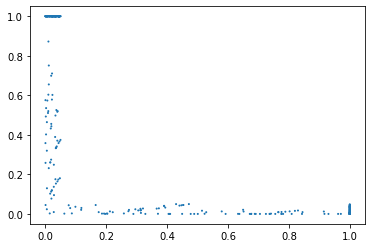

In [19]:
import matplotlib.pyplot as plt
alpha_sub = (sub_all['fibroblast_step1_C0|p_value'] < 0.05) + (sub_all['fibroblast_step2_C2|p_value'] < 0.05)
plt.scatter(sub_all['fibroblast_step1_C0|p_value'],sub_all['fibroblast_step2_C2|p_value'], s = 1, alpha = alpha_sub)

In [22]:
sub_all = []
for i,j in zip(result_all, sig_gene_names):
    sub_df = i.reset_index().set_index(['pathway','external_id','source'])[['overlap','p_value','overlap_n']]
    sub_df.columns = [f'{j}overlap',f'{j}p_value',f'{j}overlap_n']
    sub_all += [sub_df]
sub_all = pd.concat(sub_all, axis=1)

sub_all.to_csv('250527_functional_enrichment_snRNAseq_myofiber_subtypes_by_pval_fc0.csv')
sub_all

,,,myofiber_C0|overlap,myofiber_C0|p_value,myofiber_C0|overlap_n,myofiber_C1|overlap,myofiber_C1|p_value,myofiber_C1|overlap_n,myofiber_C2|overlap,myofiber_C2|p_value,myofiber_C2|overlap_n,myofiber_C3|overlap,myofiber_C3|p_value,myofiber_C3|overlap_n,myofiber_C4|overlap,myofiber_C4|p_value,myofiber_C4|overlap_n
pathway,external_id,source,,,,,,,,,,,,,,,
EPO signaling,None,INOH,"10000, 1452, 1956, 2932, 3716, 5563, 5583, 559...",0.000001,18.0,"3717, 4233, 5567, 5576, 5588, 6416, 673",0.260214,7.0,"1024, 2475, 53632, 657",0.229379,4.0,,1.000000,0.0,"1021, 1432, 5291, 5581, 659, 90",0.071468,6.0
VEGF,None,INOH,"10000, 1452, 1956, 2932, 3716, 5563, 5583, 559...",0.000001,18.0,"3717, 4233, 5567, 5576, 5588, 6416, 673",0.268775,7.0,"1024, 2475, 53632, 657",0.235012,4.0,,1.000000,0.0,"1021, 1432, 3708, 5291, 5336, 5581, 659, 90",0.009378,8.0
Insulin resistance - Homo sapiens (human),path:hsa04931,KEGG,"10000, 2932, 2997, 4790, 5465, 5507, 5563, 559...",0.000003,13.0,"10891, 5588, 5728, 948",0.353032,4.0,"10724, 133522, 22877, 2308, 2475, 53632, 5506,...",0.000088,8.0,5500,0.829816,1.0,"5291, 5581",0.504692,2.0
IL-7 signaling,None,INOH,"10000, 1452, 1956, 2932, 3716, 5563, 5583, 559...",0.000004,17.0,"3717, 4233, 5567, 5576, 5588, 6416, 673",0.255963,7.0,"1024, 2475, 53632, 657",0.226576,4.0,,1.000000,0.0,"1021, 1432, 5291, 5581, 659, 90",0.070026,6.0
Rab regulation of trafficking,R-HSA-9007101,Reactome,"10000, 10133, 10890, 163486, 22930, 23637, 577...",0.000007,13.0,"10260, 57589",0.837077,2.0,"160518, 9135",0.452613,2.0,7531,0.850823,1.0,,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beta-oxidation of pristanoyl-CoA,R-HSA-389887,Reactome,,1.000000,0.0,,1.000000,0.0,,1.000000,0.0,,1.000000,0.0,,1.000000,0.0
folate polyglutamylation,PWY-2161,HumanCyc,,1.000000,0.0,,1.000000,0.0,,1.000000,0.0,,1.000000,0.0,,1.000000,0.0
apoptotic signaling in response to dna damage,chemicalpathway,BioCarta,,1.000000,0.0,,1.000000,0.0,596,0.169261,1.0,,1.000000,0.0,,1.000000,0.0


In [85]:
# save result
result_df.to_csv('test3.csv')

array([[-0.6716565 ,  1.83889098, -1.74041707, -0.07577137],
       [-0.10984157,  0.10924874,  1.50815369, -1.61440112],
       [ 0.15812296, -0.34157288,  1.28812716, -0.5074347 ],
       ...,
       [ 0.26893121,  0.50041025,  0.11111083,  0.64534894],
       [-1.57201742,  0.43545166, -0.6179223 , -1.00192138],
       [ 0.34122143,  0.86602609, -0.36639745,  2.89253289]])

In [52]:
Enrichment_df = pd.read_excel('250108_fc_depend_functional_enrichment (version 1).xlsx', sheet_name='Sheet3',header = [0,1,2], index_col = 0)
Enrichment_df = Enrichment_df[[Enrichment_df.columns[i] for i in [16,18,20,22,24,26]]]
Enrichment_df.iloc[:10]

pathway,C1,C2,C3,C4,C5,C6
,Filtered,Filtered,Filtered,Filtered,Filtered,Filtered
,p_value,p_value,p_value,p_value,p_value,p_value
Calcium signaling pathway - Homo sapiens (human),3.684678e-09,0.995657,0.278384,0.013284,0.153129,0.752733
Glycolysis / Gluconeogenesis - Homo sapiens (human),3.690092e-06,0.928380,0.316795,0.894409,1.000000,1.000000
HIF-1 signaling pathway - Homo sapiens (human),5.415284e-06,0.242917,0.103241,0.700985,1.000000,0.102135
Citrate cycle (TCA cycle) - Homo sapiens (human),2.032920e-04,0.107082,0.593135,0.634042,1.000000,1.000000
AMPK signaling pathway - Homo sapiens (human),1.736697e-03,0.315827,0.474182,0.203611,1.000000,0.310344
Pyruvate metabolism - Homo sapiens (human),1.094443e-02,0.270637,0.755801,0.793176,1.000000,1.000000
Parkinson disease - Homo sapiens (human),2.248693e-04,0.000095,0.453794,0.966233,0.020738,1.000000
Amyotrophic lateral sclerosis - Homo sapiens (human),7.604920e-02,0.000002,0.189228,0.993527,0.205560,0.140328


In [9]:
# Enrichment_df = pd.read_excel('250210_fc_depend_functional_enrichment.xlsx', sheet_name='Sheet2',header = [0,1], index_col = 0)
# Enrichment_df = Enrichment_df[[Enrichment_df.columns[i] for i in [j for j in range(28,39)]]]
# Enrichment_df.iloc[:10]

pathway                                                        p_value  \
                                                                    C0   
FoxO signaling pathway - Homo sapiens (human)      0.00177247382288214   
Striated Muscle Contraction                               4.664204e-07   
Muscle contraction                                        6.189004e-07   
Cardiac muscle contraction - Homo sapiens (human)         5.415010e-04   
Calcium signaling pathway - Homo sapiens (human)          9.292071e-04   
MAPK signaling pathway - Homo sapiens (human)             1.663402e-02   
Axon guidance - Homo sapiens (human)                      1.000000e+00   
Focal adhesion - Homo sapiens (human)                     3.137674e-01   
ECM-receptor interaction - Homo sapiens (human)           1.000000e+00   
Cell adhesion molecules - Homo sapiens (human)            1.000000e+00   
Neutrophil extracellular trap formation - Homo ...        1.000000e+00   

pathway                                                           \
                                                              C1   
FoxO signaling pathway - Homo sapiens (human)                  1   
Striated Muscle Contraction                         3.583112e-11   
Muscle contraction                                  3.058165e-11   
Cardiac muscle contraction - Homo sapiens (human)   1.925913e-10   
Calcium signaling pathway - Homo sapiens (human)    7.677665e-04   
MAPK signaling pathway - Homo sapiens (human)       5.962531e-01   
Axon guidance - Homo sapiens (human)                4.282686e-01   
Focal adhesion - Homo sapiens (human)               1.247979e-01   
ECM-receptor interaction - Homo sapiens (human)     2.361436e-01   
Cell adhesion molecules - Homo sapiens (human)      1.000000e+00   
Neutrophil extracellular trap formation - Homo ...  1.000000e+00   

pathway                                                               \
                                                                  C2   
FoxO signaling pathway - Homo sapiens (human)      0.382714335380909   
Striated Muscle Contraction                             1.000000e+00   
Muscle contraction                                      2.574817e-01   
Cardiac muscle contraction - Homo sapiens (human)       5.879053e-01   
Calcium signaling pathway - Homo sapiens (human)        3.499894e-02   
MAPK signaling pathway - Homo sapiens (human)           7.778660e-02   
Axon guidance - Homo sapiens (human)                    5.181134e-04   
Focal adhesion - Homo sapiens (human)                   2.624134e-11   
ECM-receptor interaction - Homo sapiens (human)         0.000000e+00   
Cell adhesion molecules - Homo sapiens (human)          7.860286e-04   
Neutrophil extracellular trap formation - Homo ...      8.568074e-01   

pathway                                                                \
                                                                   C3   
FoxO signaling pathway - Homo sapiens (human)      0.0864577142283028   
Striated Muscle Contraction                              1.000000e+00   
Muscle contraction                                       1.000000e+00   
Cardiac muscle contraction - Homo sapiens (human)        1.000000e+00   
Calcium signaling pathway - Homo sapiens (human)         1.224793e-02   
MAPK signaling pathway - Homo sapiens (human)            2.981683e-02   
Axon guidance - Homo sapiens (human)                     5.717698e-02   
Focal adhesion - Homo sapiens (human)                    4.409604e-06   
ECM-receptor interaction - Homo sapiens (human)          5.280827e-03   
Cell adhesion molecules - Homo sapiens (human)           2.869683e-07   
Neutrophil extracellular trap formation - Homo ...       4.476009e-01   

pathway                                                                 \
                                                          C4        C5   
FoxO signaling pathway - Homo sapiens (human)              1         1   
Striated Muscle Contraction                

In [13]:
# Enrichment_df[Enrichment_df<0.0001] = 0.0001
# Enrichment_df[Enrichment_df>0.05] = np.nan
# Enrichment_df = np.log10(Enrichment_df)*(-1)
# Enrichment_df = Enrichment_df.iloc[:30]
# # Enrichment_df.columns = [['D1','D2','D3','D4','N1','N2']]
# Enrichment_df.columns = [[
#     "Myofiber (Type 2)",
#     "Myofiber (Type 1)",
#     "Fibroblasts",
#     "Endothelial cells",
#     "Satellite cells",
#     "Immune cells (Granulocytes)",
#     "Myofiber (Type 1&2A)",
#     "Smooth muscle cells",
#     "Adipocytes",
#     "Immune cells (Lymphocytes)",
#     "Unknown"
# ]]

ValueError: Length mismatch: Expected axis has 6 elements, new values have 11 elements

In [53]:
Enrichment_df[Enrichment_df<0.0001] = 0.0001
Enrichment_df[Enrichment_df>0.05] = np.nan
Enrichment_df = np.log10(Enrichment_df)*(-1)
Enrichment_df.columns = [['D1','D2','D3','D4','N1','N2']]
# Enrichment_df.columns = [[
#     "Myofiber (Type 2)",
#     "Myofiber (Type 1)",
#     "Fibroblasts",
#     "Endothelial cells",
#     "Satellite cells",
#     "Immune cells (Granulocytes)",
#     "Myofiber (Type 1&2A)",
#     "Smooth muscle cells",
#     "Adipocytes",
#     "Immune cells (Lymphocytes)",
#     "Unknown"
# ]]

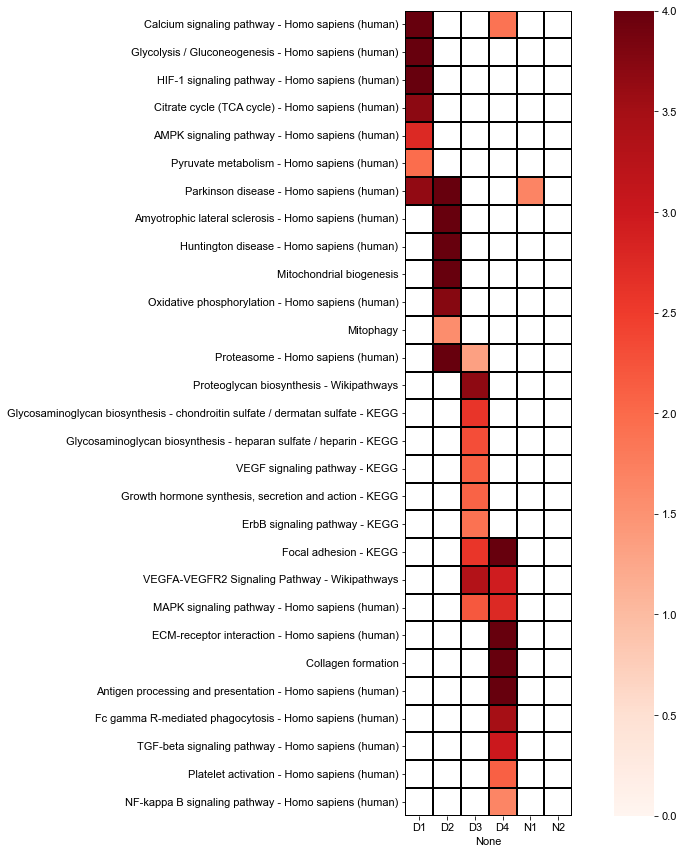

In [54]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.style']  = 'normal'
mpl.rcParams['font.serif']  = 'svg' 
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Enrichment_df,
                 linewidth=0.1, linecolor="black", cmap="Reds", vmin=0, vmax=4, square=True,
                 xticklabels=True, yticklabels=True)
# ax = sns.heatmap(B[[f'{i}.1' for i in np.sort(B['A_cluster'].dropna().unique())]],
#                  linewidth=0.1, linecolor="black", cmap="Reds_r", vmin=0, vmax=1e-2, square=True,
#                  xticklabels=True, yticklabels=True)

#fig.savefig("Figure/CPDB_heatmap.svg")
fig.tight_layout()
# plt.savefig('up_pathway.eps', format='eps')

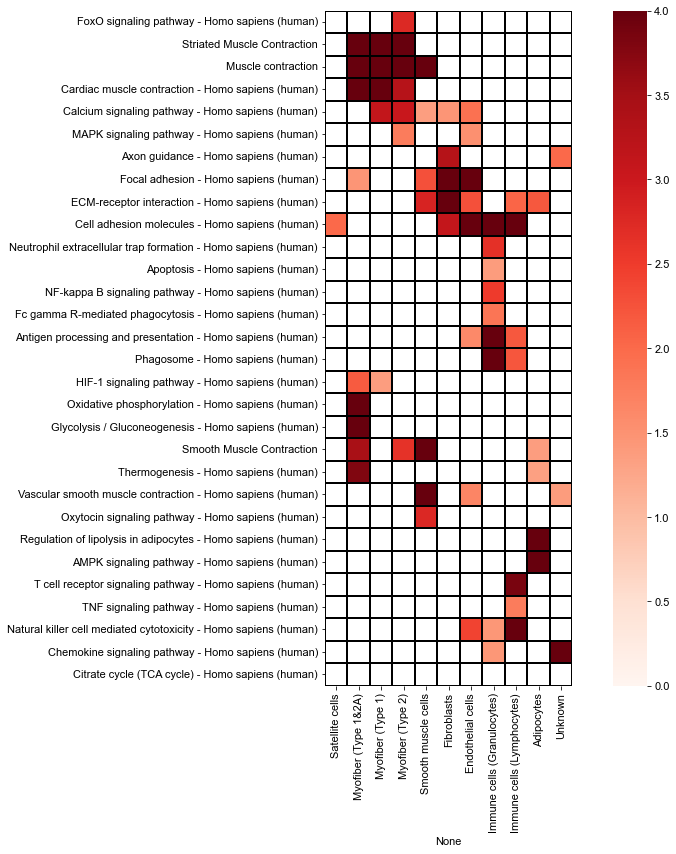

: 

In [40]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.style']  = 'normal'
mpl.rcParams['font.serif']  = 'svg' 
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Enrichment_df[[Enrichment_df.columns[i] for i in [4,6,1,0,7,2,3,5,9,8,10]]],
                 linewidth=0.1, linecolor="black", cmap="Reds", vmin=0, vmax=4, square=True,
                 xticklabels=True, yticklabels=True)
# ax = sns.heatmap(B[[f'{i}.1' for i in np.sort(B['A_cluster'].dropna().unique())]],
#                  linewidth=0.1, linecolor="black", cmap="Reds_r", vmin=0, vmax=1e-2, square=True,
#                  xticklabels=True, yticklabels=True)

#fig.savefig("Figure/CPDB_heatmap.svg")
fig.tight_layout()
# plt.savefig('up_pathway.eps', format='eps')